In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
PATH = "/Users/haydenjohnson00/Downloads/School/Drivers/chromedriver-mac-arm64/chromedriver"
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [2]:
def lovely_soup(u):
    page = requests.get(u)
    return(BeautifulSoup(page.content, 'html.parser'))

# NCAA DI Championships 500 Free 22-23

In [3]:
dI23Splits = pd.read_excel('NCAA D1 Swim Championship 22-23.xlsx')
url = "https://www.swimcloud.com/results/236950/event/3/1/#round-PRE"
def extract_swimmer_info(url):
    import time
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(PATH, options=options)
    driver.get(url)  # Use the URL of the page

    time.sleep(3)

    # Get the HTML content of the page
    page_html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(page_html, 'html.parser')

    # Find the third Preliminaries table by its title
    preliminaries_tables = soup.find_all('table', class_='c-table-clean table table-hover')
    preliminaries_table = None

    for table in preliminaries_tables:
        caption = table.find('caption', class_='c-table-clean__caption')
        if caption and caption.text.strip() == 'Preliminaries':
            preliminaries_table = table
            break

    # Extract swimmer information from the table
    swimmer_data = []
    if preliminaries_table:
        rows = preliminaries_table.find_all('tr')
        for row in rows:
            # Extract all text within the row
            row_text = [col.text.strip() for col in row.find_all('td')]
            swimmer_data.append(row_text)

    # Convert the extracted data into a DataFrame with column titles
    df = pd.DataFrame(swimmer_data, columns=['Place', 'Name', 'School', 'Time', 'Blank', 'Points', 'Improvement', 'Best'])
    df = df.iloc[:, 1:]
    df = df.drop(0)
    df = df.drop(df.index[-1])
    df = df.drop('Points', axis=1)
    df = df.drop('Blank', axis=1)
    df = df.reset_index(drop=True)

    return df

    driver.quit()

dI23Times = extract_swimmer_info(url)
dI23 = pd.concat([dI23Times, dI23Splits], axis=1)
dI23.columns = dI23.columns.astype(str)
#dI23 = pd.read_csv('dI23.csv')
#dI23.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/3275073314.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# CSCAA 500 Free 22-23

In [4]:
cscaa23Splits = pd.read_excel('CSCAA 22-23.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/236952/event/5/1/"
def extract_swimmer_info_cscaa(url):
    import time
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(PATH, options=options)
    driver.get(url)  # Use the URL of the page

    time.sleep(3)

    # Get the HTML content of the page
    page_html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(page_html, 'html.parser')

    # Find the third Preliminaries table by its title
    preliminaries_tables = soup.find_all('table', class_='c-table-clean table table-hover')
    preliminaries_table = None

    for table in preliminaries_tables:
        caption = table.find('caption', class_='c-table-clean__caption')
        if caption and caption.text.strip() == 'Preliminaries':
            preliminaries_table = table
            break

    # Extract swimmer information from the table
    swimmer_data = []
    if preliminaries_table:
        rows = preliminaries_table.find_all('tr')
        for row in rows:
            # Extract all text within the row
            row_text = [col.text.strip() for col in row.find_all('td')]
            swimmer_data.append(row_text)

    # Convert the extracted data into a DataFrame with column titles
    df = pd.DataFrame(swimmer_data, columns=['Place', 'Name', 'School', 'Time', 'Cut Type', 'Points', 'Improvement', 'Best'])
    df = df.iloc[:, 1:]
    df = df.drop(0)
    df = df.drop('Cut Type', axis=1)
    df = df.drop('Points', axis=1)
    df = df.reset_index(drop=True)

    return df

    driver.quit()

cscaa23Times = extract_swimmer_info_cscaa(url)
cscaa23 = pd.concat([cscaa23Times, cscaa23Splits], axis=1)
value_to_drop = 'Nicholas Santorelli'
cscaa23 = cscaa23[cscaa23['Name'] != value_to_drop]
cscaa23 = cscaa23.reset_index(drop=True)
cscaa23['Name'] = 'CSCAA23'
cscaa23.rename(columns={'Name': 'Meet'}, inplace=True)
cscaa23.columns = cscaa23.columns.astype(str)
#cscaa23 = pd.read_csv('cscaa23.csv')
#dI23.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/538226239.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DII 22-23

In [5]:
dII23Splits = pd.read_excel('NCAA DII 22-23.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/194786/event/22/1/"
def extract_swimmer_info_include_last(url):
    import time
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(PATH, options=options)
    driver.get(url)  # Use the URL of the page

    time.sleep(3)

    # Get the HTML content of the page
    page_html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(page_html, 'html.parser')

    # Find the third Preliminaries table by its title
    preliminaries_tables = soup.find_all('table', class_='c-table-clean table table-hover')
    preliminaries_table = None

    for table in preliminaries_tables:
        caption = table.find('caption', class_='c-table-clean__caption')
        if caption and caption.text.strip() == 'Preliminaries':
            preliminaries_table = table
            break

    # Extract swimmer information from the table 
    swimmer_data = []
    if preliminaries_table:
        rows = preliminaries_table.find_all('tr')
        for row in rows:
            # Extract all text within the row
            row_text = [col.text.strip() for col in row.find_all('td')]
            swimmer_data.append(row_text)

    # Convert the extracted data into a DataFrame with column titles
    df = pd.DataFrame(swimmer_data, columns=['Place', 'Name', 'School', 'Time', 'Points', 'Improvement', 'Best'])
    df = df.iloc[:, 1:]
    df = df.drop(0)
    df = df.drop('Points', axis=1)
    df = df.reset_index(drop=True)

    return df

    driver.quit()

dII23Times = extract_swimmer_info_include_last(url)
dII23 = pd.concat([dII23Times, dII23Splits], axis=1)
dII23.columns = dII23.columns.astype(str)
columns_to_convert = ['50', '100', '150', '200', '250', '300', '350', '400', '450', '500']
dII23[columns_to_convert] = dII23[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dII23 = pd.read_csv('dII23.csv')
#dII23.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1376296749.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DIII 22-23

In [6]:
dIII23Splits = pd.read_excel('NCAA DIII 22-23.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/194787/event/2/1/"
def extract_swimmer_info_less(url):
    import time
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(PATH, options=options)
    driver.get(url)  # Use the URL of the page

    time.sleep(3)

    # Get the HTML content of the page
    page_html = driver.page_source

    # Parse the HTML using BeautifulSoup
    soup = BeautifulSoup(page_html, 'html.parser')

    # Find the third Preliminaries table by its title
    preliminaries_tables = soup.find_all('table', class_='c-table-clean table table-hover')
    preliminaries_table = None

    for table in preliminaries_tables:
        caption = table.find('caption', class_='c-table-clean__caption')
        if caption and caption.text.strip() == 'Preliminaries':
            preliminaries_table = table
            break

    # Extract swimmer information from the table
    swimmer_data = []
    if preliminaries_table:
        rows = preliminaries_table.find_all('tr')
        for row in rows:
            # Extract all text within the row
            row_text = [col.text.strip() for col in row.find_all('td')]
            swimmer_data.append(row_text)

    # Convert the extracted data into a DataFrame with column titles
    df = pd.DataFrame(swimmer_data, columns=['Place', 'Name', 'School', 'Time', 'Points', 'Improvement', 'Best'])
    df = df.iloc[:, 1:]
    df = df.drop(0)
    df = df.drop(df.index[-1])
    df = df.drop('Points', axis=1)
    df = df.reset_index(drop=True)

    return df

    driver.quit()

dIII23Times = extract_swimmer_info_less(url)
dIII23 = pd.concat([dIII23Times, dIII23Splits], axis=1)
dIII23.columns = dIII23.columns.astype(str)
dIII23[columns_to_convert] = dIII23[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dIII23 = pd.read_csv('dIII23.csv')
#dIII23.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


In [7]:
dIII23.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
0,Pat Pema,Emory,4:21.68,+0.4%,PB,23.45,25.86,26.36,26.46,26.69,26.61,26.44,26.46,26.55,26.80
1,Kellen Roddy,Johns Hopkins,4:23.18,+1.3%,PB,24.23,26.30,26.39,26.41,26.75,26.69,26.64,26.71,26.91,26.15
2,Mason Kelber,Washington (Mo),4:24.16,+0.2%,PB,23.80,25.99,26.45,26.78,27.06,27.07,27.00,26.82,26.62,26.57
3,Justin Finkel,Connecticut College,4:24.49,+0.5%,PB,24.31,26.53,27.11,27.06,27.42,26.77,26.68,26.75,26.55,25.31
4,Bryan Fitzgerald,Kenyon,4:26.23,-0.1%,,24.02,26.57,26.88,26.82,27.01,26.91,26.87,27.01,27.14,27.00


# NCAA DI 21-22

In [8]:
dI22Splits = pd.read_excel('NCAA DI 21-22.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/194776/event/3/1/#round-PRE"
dI22Times = extract_swimmer_info_less(url)
dI22 = pd.concat([dI22Times, dI22Splits], axis=1)
dI22.columns = dI22.columns.astype(str)
dI22[columns_to_convert] = dI22[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dI22 = pd.read_csv('dI22.csv')
#dI22.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DII 21-22

In [9]:
dII22Splits = pd.read_excel('NCAA DII 21-22.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/194773/event/22/1/#round-PRE"
dII22Times = extract_swimmer_info_less(url)
dII22 = pd.concat([dII22Times, dII22Splits], axis=1)
dII22.columns = dII22.columns.astype(str)
dII22[columns_to_convert] = dII22[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dII22 = pd.read_csv('dII22.csv')
#dII22.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DIII 21-22

In [10]:
dIII22Splits = pd.read_excel('NCAA DIII 21-22.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/194775/event/1/1/#round-PRE"
dIII22Times = extract_swimmer_info_less(url)
dIII22 = pd.concat([dIII22Times, dIII22Splits], axis=1)
dIII22.columns = dIII22.columns.astype(str)
dIII22[columns_to_convert] = dIII22[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dIII22 = pd.read_csv('dIII22.csv')
#dIII22.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DI 18-19

In [11]:
dI19Splits = pd.read_excel('NCAA DI 18-19.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/118612/event/3/1/"
dI19Times = extract_swimmer_info_less(url)
dI19Times = dI19Times.drop(dI19Times.index[-1])
dI19 = pd.concat([dI19Times, dI19Splits], axis=1)
dI19.columns = dI19.columns.astype(str)
dI19[columns_to_convert] = dI19[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dI19 = pd.read_csv('dI19.csv')
#dI19.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DII 18-19

In [12]:
dII19Splits = pd.read_excel('NCAA DII 18-19.xlsx', dtype = str)
url = "https://swimcloud.com/results/118614/event/22/1/"
dII19Times = extract_swimmer_info_less(url)
dII19 = pd.concat([dII19Times, dII19Splits], axis=1)
dII19.columns = dII19.columns.astype(str)
dII19[columns_to_convert] = dII19[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dII19 = pd.read_csv('dII19.csv')
#dII19.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# NCAA DIII 18-19

In [13]:
dIII19Splits = pd.read_excel('NCAA DIII 18-19.xlsx', dtype = str)
url = "https://www.swimcloud.com/results/118615/event/2/1/"
dIII19Times = extract_swimmer_info_less(url)
dIII19 = pd.concat([dIII19Times, dIII19Splits], axis=1)
dIII19 = dIII19.drop(dIII19.index[-1])
dIII19 = dIII19.reset_index(drop=True)
dIII19.columns = dIII19.columns.astype(str)
dIII19[columns_to_convert] = dIII19[columns_to_convert].apply(pd.to_numeric, errors='coerce')
#dIII19 = pd.read_csv('dIII19.csv')
#dIII19.head()

/var/folders/p_/qcpt_8pd5hlbv9w9cb71by8r0000gn/T/ipykernel_28496/1986586003.py:7: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH, options=options)


# Summary Statistics

**DI 22-23**

In [14]:
dI23.describe()

,50,100,150,200,250,300,350,400,450,500
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,23.333478,25.304565,25.667391,25.860000,25.953696,25.992826,26.051739,26.110435,26.137391,25.546304
std,0.462569,0.483440,0.445443,0.434741,0.417774,0.458237,0.473968,0.520090,0.571472,0.595525
min,22.500000,24.550000,24.860000,25.210000,25.260000,24.980000,25.210000,24.960000,24.780000,24.380000
25%,23.060000,24.912500,25.337500,25.502500,25.670000,25.695000,25.690000,25.722500,25.772500,25.110000
50%,23.310000,25.195000,25.570000,25.790000,25.875000,25.935000,25.920000,26.110000,26.110000,25.540000
75%,23.567500,25.572500,25.887500,26.135000,26.217500,26.382500,26.475000,26.455000,26.495000,25.835000
max,24.370000,26.310000,26.930000,27.040000,27.180000,26.850000,27.030000,27.390000,27.380000,26.940000


**DII 22-23**

In [15]:
dII23.describe()

,50,100,150,200,250,300,350,400,450,500
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,24.302286,26.565429,27.070571,27.332000,27.409143,27.405714,27.496571,27.677143,27.529714,26.752000
std,0.529162,0.465127,0.475802,0.511001,0.518569,0.588959,0.622074,0.762101,0.851426,0.882996
min,23.140000,25.690000,26.190000,26.400000,26.660000,26.360000,26.620000,26.320000,26.000000,25.060000
25%,24.015000,26.300000,26.765000,27.005000,27.045000,26.860000,26.920000,27.080000,26.830000,26.045000
50%,24.340000,26.500000,27.080000,27.170000,27.340000,27.550000,27.550000,27.700000,27.610000,26.670000
75%,24.520000,26.760000,27.315000,27.700000,27.825000,27.805000,27.910000,28.085000,27.990000,27.345000
max,25.730000,28.170000,28.380000,28.350000,28.760000,29.010000,29.260000,30.050000,29.710000,29.250000


**DIII 22-23**

In [16]:
dIII23.describe()

,50,100,150,200,250,300,350,400,450,500
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,24.384474,26.644737,27.086053,27.326842,27.547105,27.574474,27.584474,27.699474,27.588158,27.059737
std,0.463627,0.384544,0.360941,0.394318,0.406241,0.463994,0.570915,0.637876,0.625965,0.808176
min,23.370000,25.860000,26.360000,26.410000,26.690000,26.610000,26.440000,26.410000,26.530000,25.300000
25%,24.072500,26.370000,26.865000,27.075000,27.285000,27.212500,27.202500,27.257500,27.182500,26.525000
50%,24.375000,26.655000,27.105000,27.375000,27.590000,27.600000,27.580000,27.760000,27.550000,27.060000
75%,24.720000,26.897500,27.277500,27.610000,27.860000,27.890000,28.010000,28.075000,27.987500,27.425000
max,25.590000,27.370000,27.920000,28.390000,28.250000,28.490000,28.580000,28.870000,28.950000,28.940000


**DI 21-22**

In [17]:
dI22.describe()

,50,100,150,200,250,300,350,400,450,500
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,23.306875,25.343958,25.675833,25.896250,26.010625,26.002500,26.021042,26.080625,26.019583,25.406250
std,0.449194,0.361755,0.320749,0.324959,0.369666,0.389744,0.538087,0.591379,0.669846,0.691291
min,22.180000,24.710000,24.930000,25.290000,25.240000,25.120000,24.420000,24.470000,24.630000,24.220000
25%,23.092500,25.077500,25.440000,25.677500,25.785000,25.717500,25.647500,25.660000,25.590000,24.940000
50%,23.320000,25.320000,25.650000,25.830000,25.970000,26.070000,26.115000,26.070000,25.980000,25.380000
75%,23.642500,25.575000,25.840000,26.142500,26.252500,26.290000,26.392500,26.612500,26.515000,25.690000
max,24.210000,26.080000,26.420000,26.580000,26.810000,26.980000,27.080000,27.050000,27.540000,27.100000


**DII 21-22**

In [18]:
dII22.describe()

,50,100,150,200,250,300,350,400,450,500
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,24.232286,26.461714,26.918286,27.180571,27.258000,27.385429,27.504571,27.702000,27.709714,26.898000
std,0.448764,0.405408,0.441858,0.538593,0.519914,0.568001,0.676976,0.691995,0.729418,1.000711
min,23.340000,25.790000,25.990000,26.110000,26.290000,26.510000,26.790000,26.860000,26.470000,24.770000
25%,23.950000,26.165000,26.610000,26.795000,26.880000,26.950000,27.010000,27.235000,27.225000,26.175000
50%,24.220000,26.390000,26.840000,27.150000,27.180000,27.210000,27.340000,27.600000,27.570000,26.790000
75%,24.435000,26.750000,27.300000,27.420000,27.540000,27.705000,27.730000,28.075000,27.985000,27.550000
max,25.190000,27.530000,27.930000,28.960000,28.820000,28.970000,29.610000,29.630000,29.320000,29.010000


**DIII 21-22**

In [19]:
dIII22.describe()

,50,100,150,200,250,300,350,400,450,500
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,24.185128,26.429487,26.973590,27.350513,27.538462,27.645897,27.780000,27.890513,27.795641,27.167179
std,0.445231,0.364735,0.410061,0.390054,0.421092,0.398581,0.459141,0.539517,0.579241,0.691425
min,23.230000,25.640000,25.780000,26.160000,26.490000,26.920000,26.860000,26.910000,26.560000,25.980000
25%,23.950000,26.220000,26.795000,27.130000,27.330000,27.315000,27.505000,27.525000,27.360000,26.735000
50%,24.250000,26.480000,27.000000,27.380000,27.610000,27.710000,27.690000,27.830000,27.750000,27.030000
75%,24.370000,26.665000,27.265000,27.555000,27.775000,27.915000,28.085000,28.225000,28.125000,27.590000
max,25.220000,27.100000,27.840000,28.250000,28.440000,28.430000,29.000000,29.370000,29.380000,28.560000


**DI 18-19**

In [20]:
dI19.describe()

,50,100,150,200,250,300,350,400,450,500
count,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,23.472609,25.463478,25.776957,25.92587,25.985870,26.028913,26.043913,26.092174,26.021087,25.477609
std,0.386801,0.371790,0.380945,0.36489,0.345309,0.351942,0.377392,0.445949,0.619886,0.686392
min,22.710000,24.460000,25.000000,25.32000,25.330000,25.380000,25.160000,25.110000,24.440000,24.280000
25%,23.170000,25.310000,25.462500,25.66250,25.742500,25.810000,25.832500,25.845000,25.627500,25.030000
50%,23.470000,25.420000,25.745000,25.92500,25.950000,25.990000,26.060000,26.060000,26.025000,25.360000
75%,23.755000,25.607500,25.995000,26.08500,26.202500,26.275000,26.265000,26.327500,26.410000,25.845000
max,24.180000,26.330000,26.650000,26.94000,27.010000,27.110000,27.370000,27.660000,27.990000,27.410000


**DII 18-19**

In [21]:
dII19.describe()

,50,100,150,200,250,300,350,400,450,500
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,24.360857,26.550886,26.995714,27.298571,27.380286,27.539714,27.643714,27.734000,27.692571,26.798000
std,0.470546,0.403506,0.358003,0.335788,0.335546,0.476010,0.702287,0.848789,0.930924,1.038199
min,23.370000,25.560000,26.210000,26.680000,26.790000,26.630000,26.540000,26.560000,26.340000,25.370000
25%,23.960000,26.400000,26.720000,27.130000,27.105000,27.215000,27.180000,27.130000,26.960000,26.020000
50%,24.410000,26.570000,27.040000,27.280000,27.380000,27.440000,27.460000,27.630000,27.540000,26.760000
75%,24.660000,26.785000,27.250000,27.510000,27.640000,27.860000,28.145000,28.090000,28.270000,27.170000
max,25.220000,27.290000,27.850000,27.960000,28.180000,28.750000,29.360000,30.510000,30.040000,29.570000


**DIII 18-19**

In [22]:
dIII19.describe()

,50,100,150,200,250,300,350,400,450,500
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,24.497812,26.779375,27.298125,27.482188,27.647187,27.652188,27.715625,27.890938,27.817813,27.077500
std,0.395081,0.401970,0.399536,0.408228,0.426752,0.499101,0.581400,0.671682,0.790552,0.867741
min,23.460000,26.090000,26.580000,26.650000,26.960000,26.820000,26.720000,26.910000,26.220000,25.570000
25%,24.275000,26.482500,27.012500,27.212500,27.317500,27.285000,27.235000,27.347500,27.182500,26.505000
50%,24.420000,26.715000,27.330000,27.465000,27.700000,27.540000,27.600000,27.885000,27.820000,27.060000
75%,24.742500,27.142500,27.612500,27.760000,27.920000,27.952500,28.135000,28.410000,28.405000,27.587500
max,25.460000,27.510000,28.190000,28.320000,28.630000,28.830000,29.150000,29.690000,29.710000,29.530000


# Box Plots

In [23]:
def plot_box_plots(dataframe, name):
    markers = ['50', '100', '150', '200', '250', '300', '350', '400', '450', '500']

    # Calculate the number of rows needed for the given number of markers
    num_rows = math.ceil(len(markers) / 2)

    # Create subplots for the box plots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

    # Loop through markers and create box plots
    for i, marker in enumerate(markers):
        row, col = divmod(i, 2)
        ax = axes[row, col]
        ax.boxplot(dataframe[marker], vert=False)
        ax.set_title(f'{marker}m Split')
        ax.set_yticklabels([])

    # Set the title for the entire set of box plots
    fig.suptitle(f'Box Plots for {name}', fontsize=14)

    plt.tight_layout()
    plt.show()

**DI 22-23**

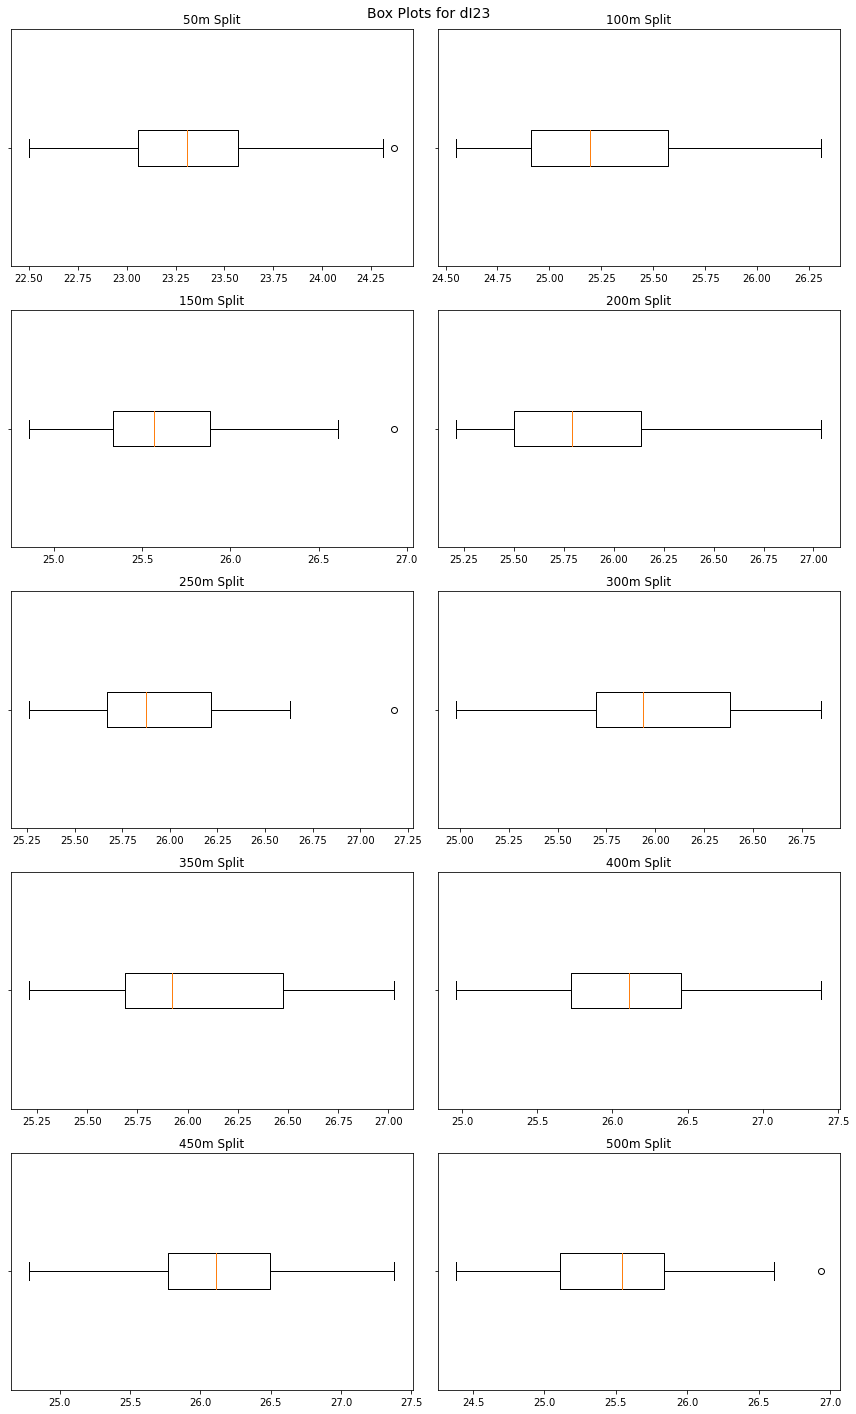

In [24]:
plot_box_plots(dI23, 'dI23')

**DII 22-23**

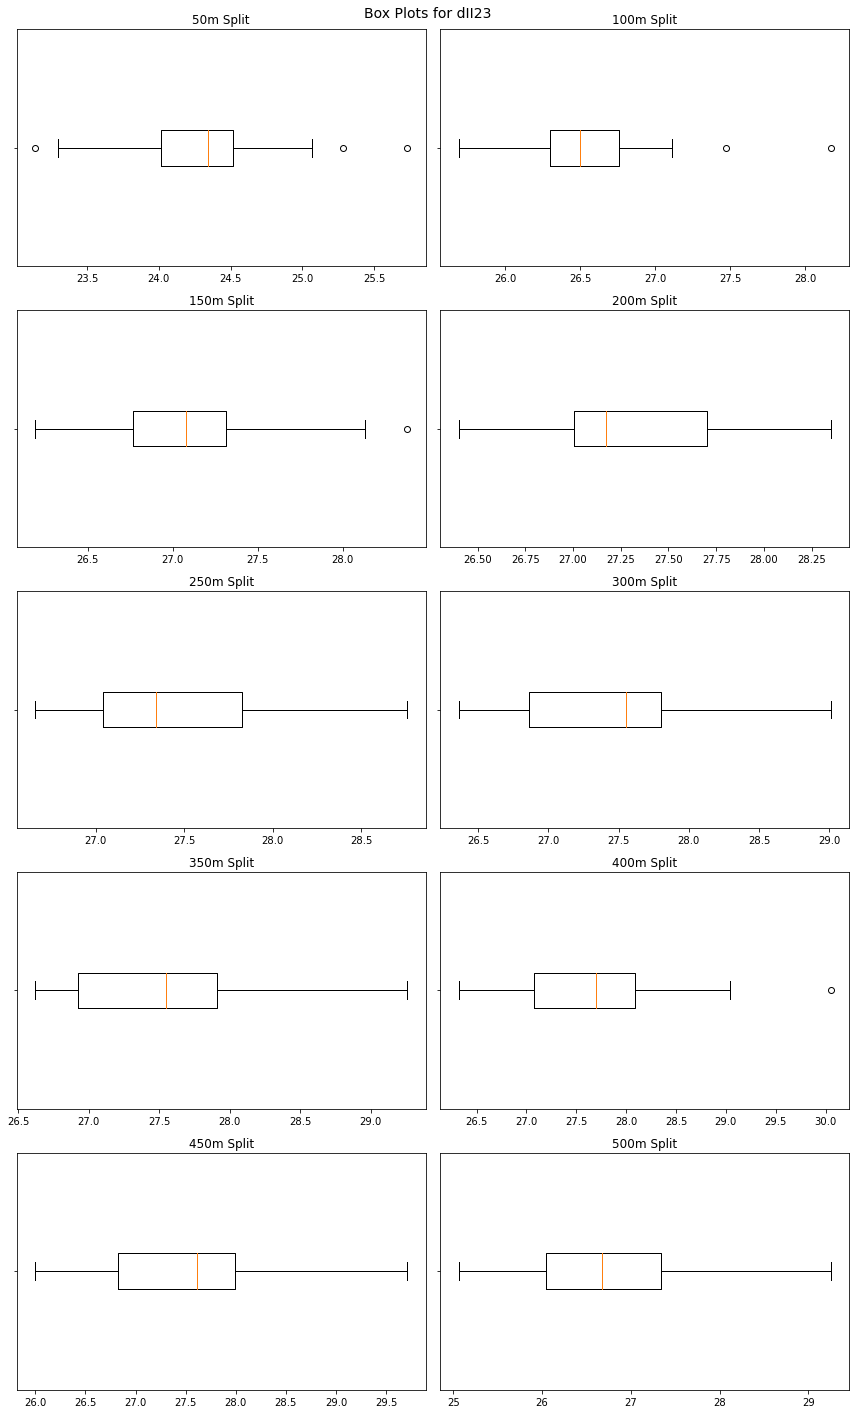

In [25]:
plot_box_plots(dII23, 'dII23')

**DIII 22-23**

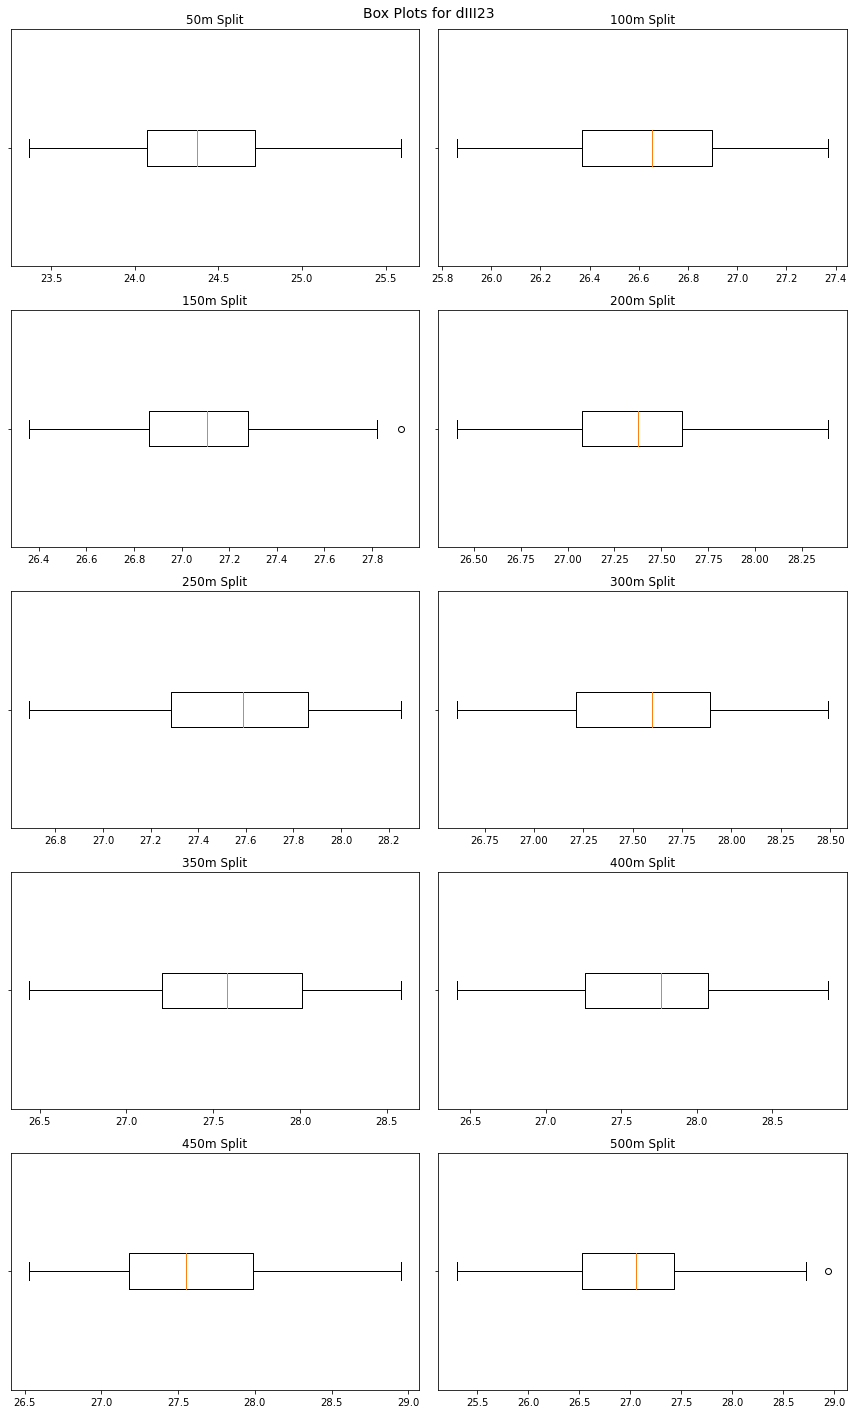

In [26]:
plot_box_plots(dIII23, 'dIII23')

**DI 21-22**

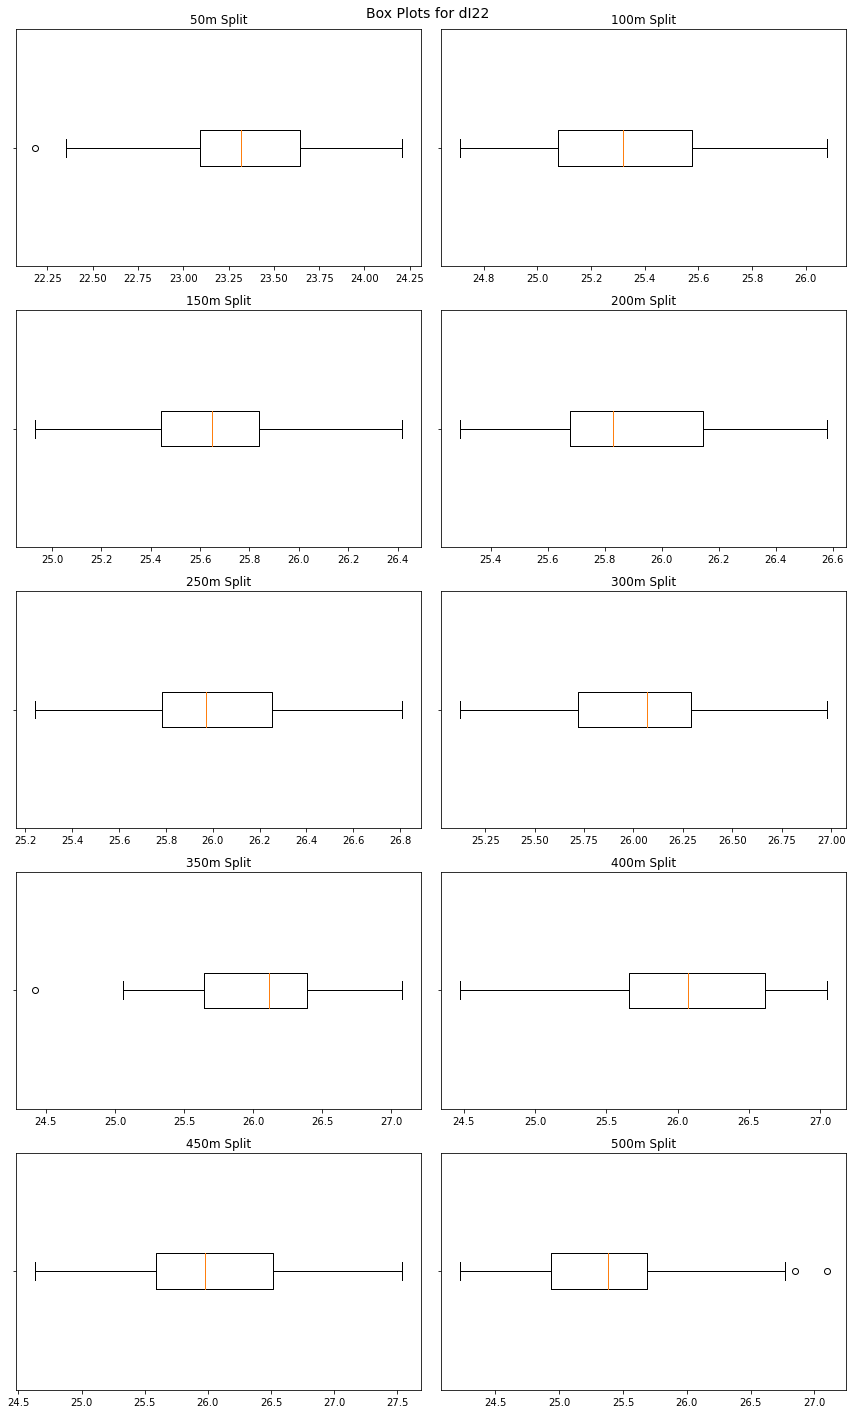

In [27]:
plot_box_plots(dI22, 'dI22')

**DII 21-22**

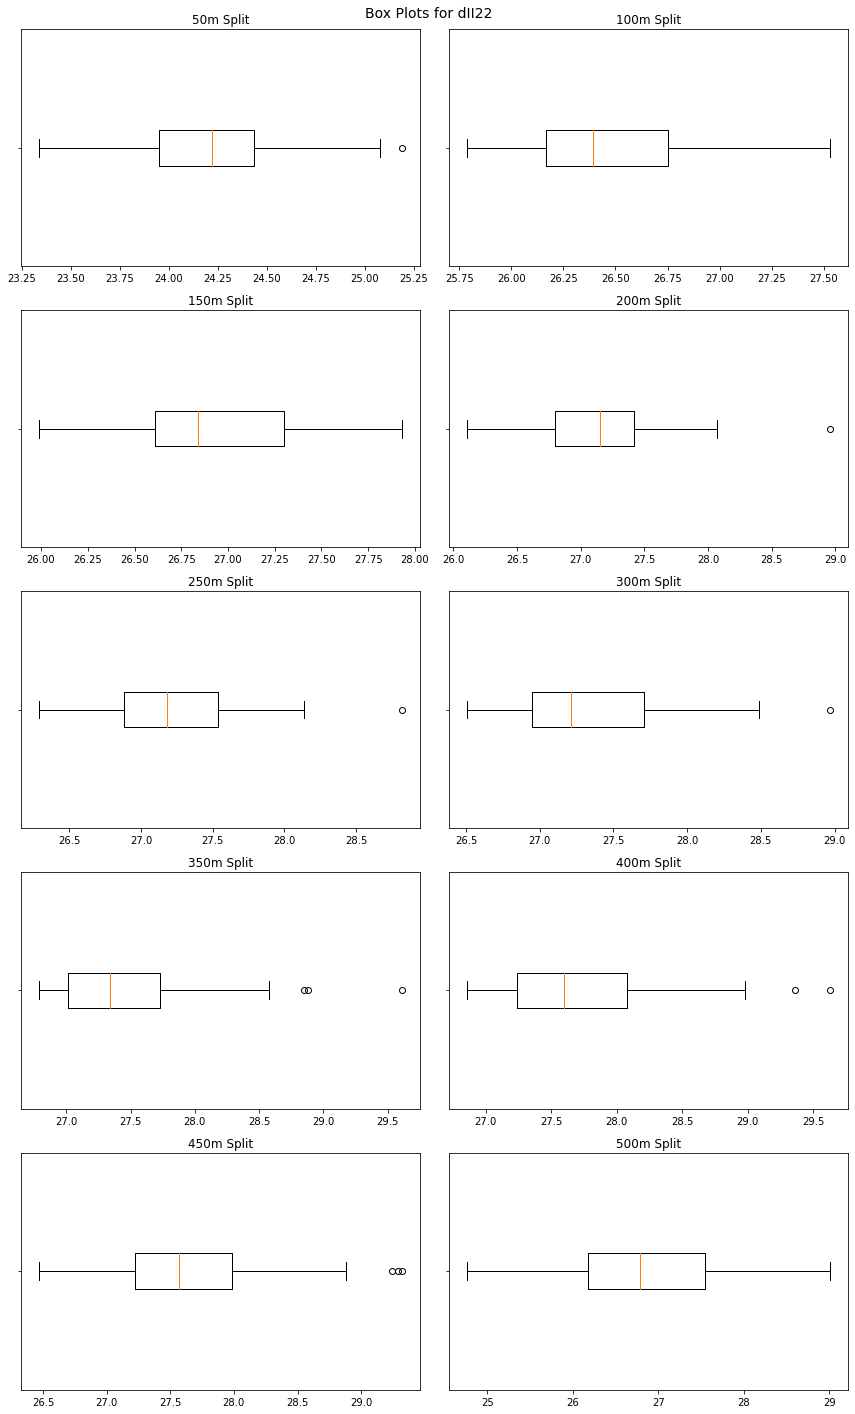

In [28]:
plot_box_plots(dII22, 'dII22')

**DIII 21-22**

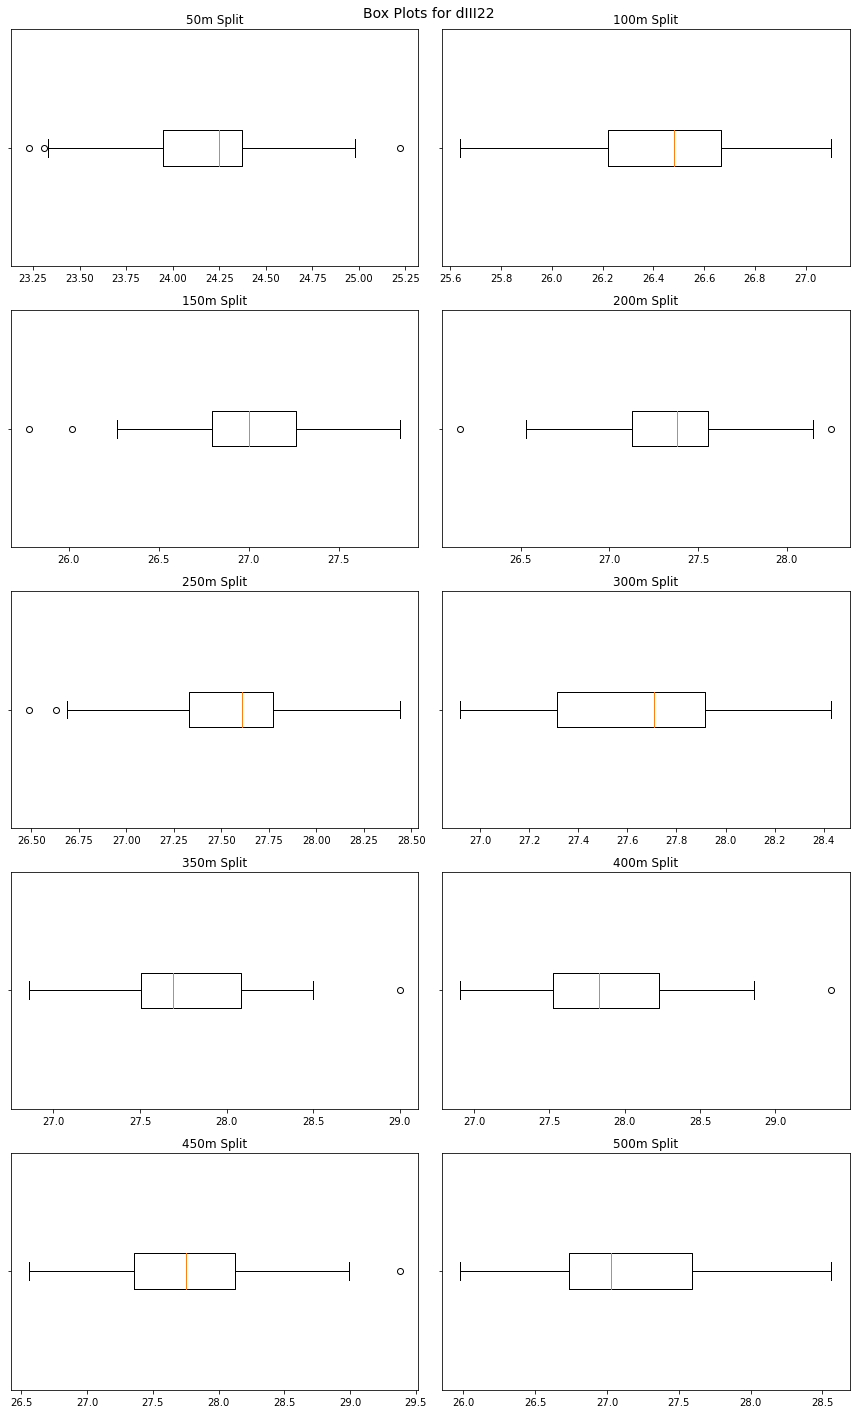

In [29]:
plot_box_plots(dIII22, 'dIII22')

**DI 18-19**

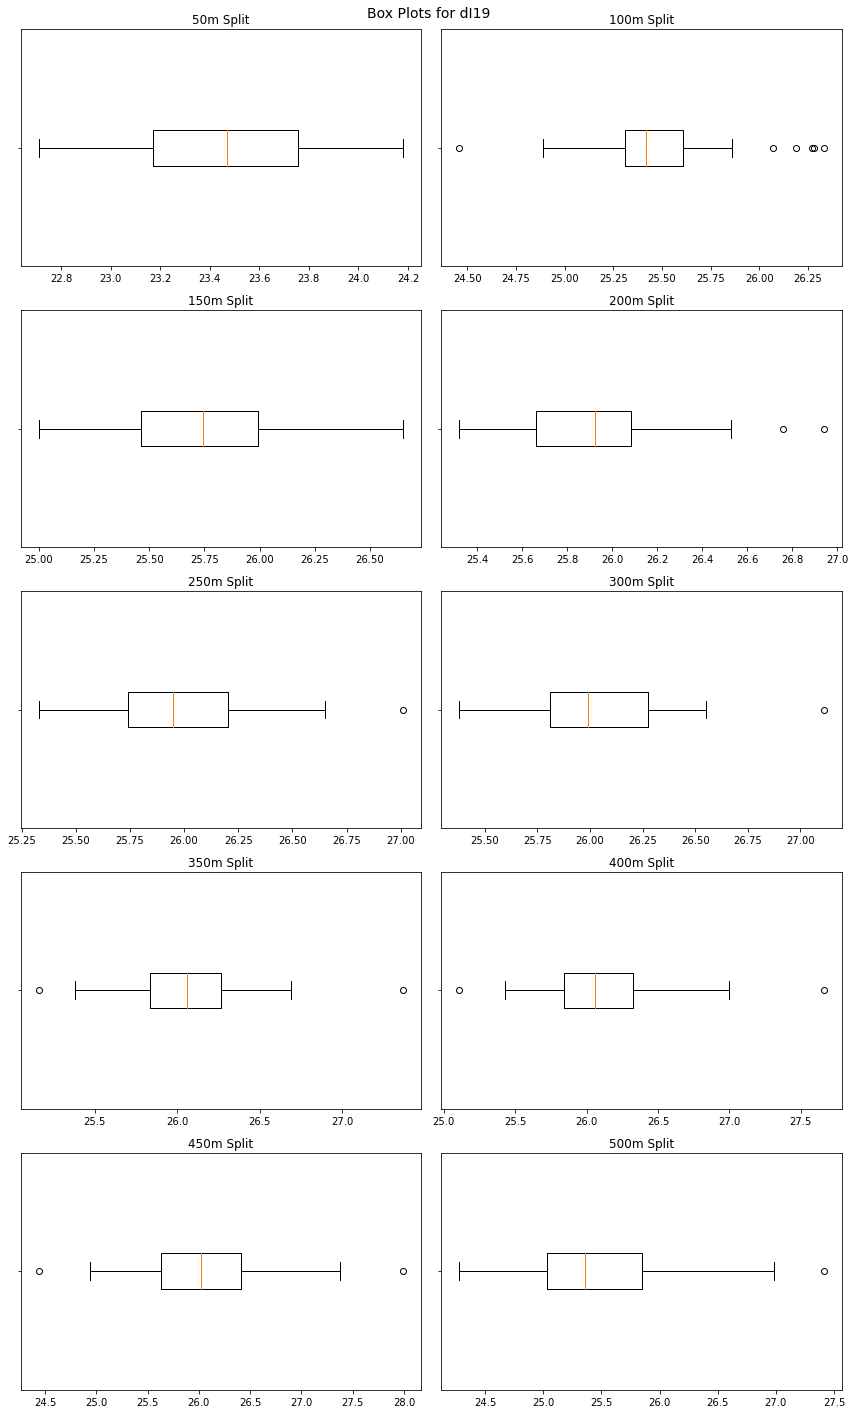

In [30]:
plot_box_plots(dI19, 'dI19')

**DII 18-19**

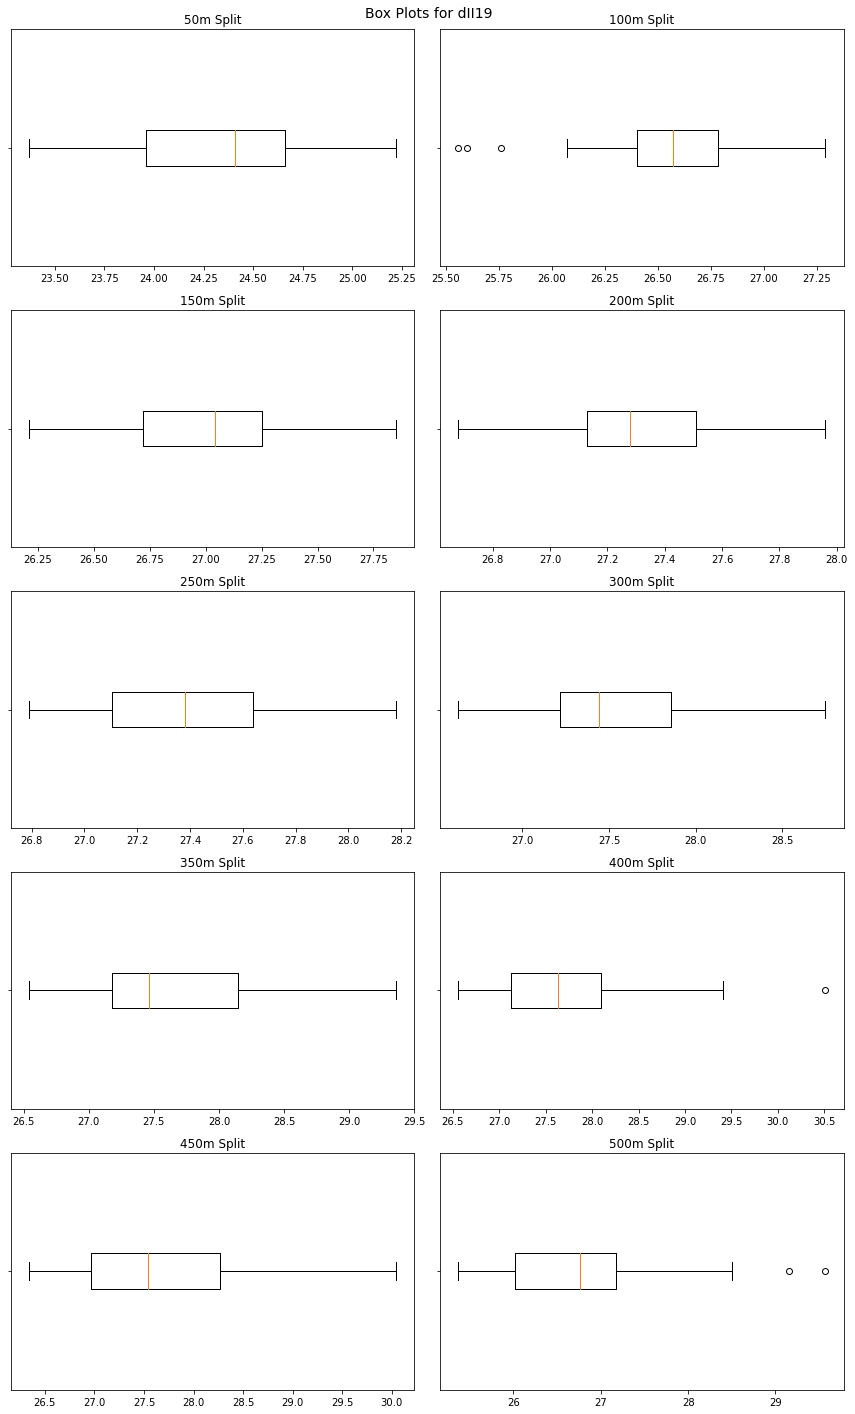

In [31]:
plot_box_plots(dII19, 'dII19')

**DIII 18-19**

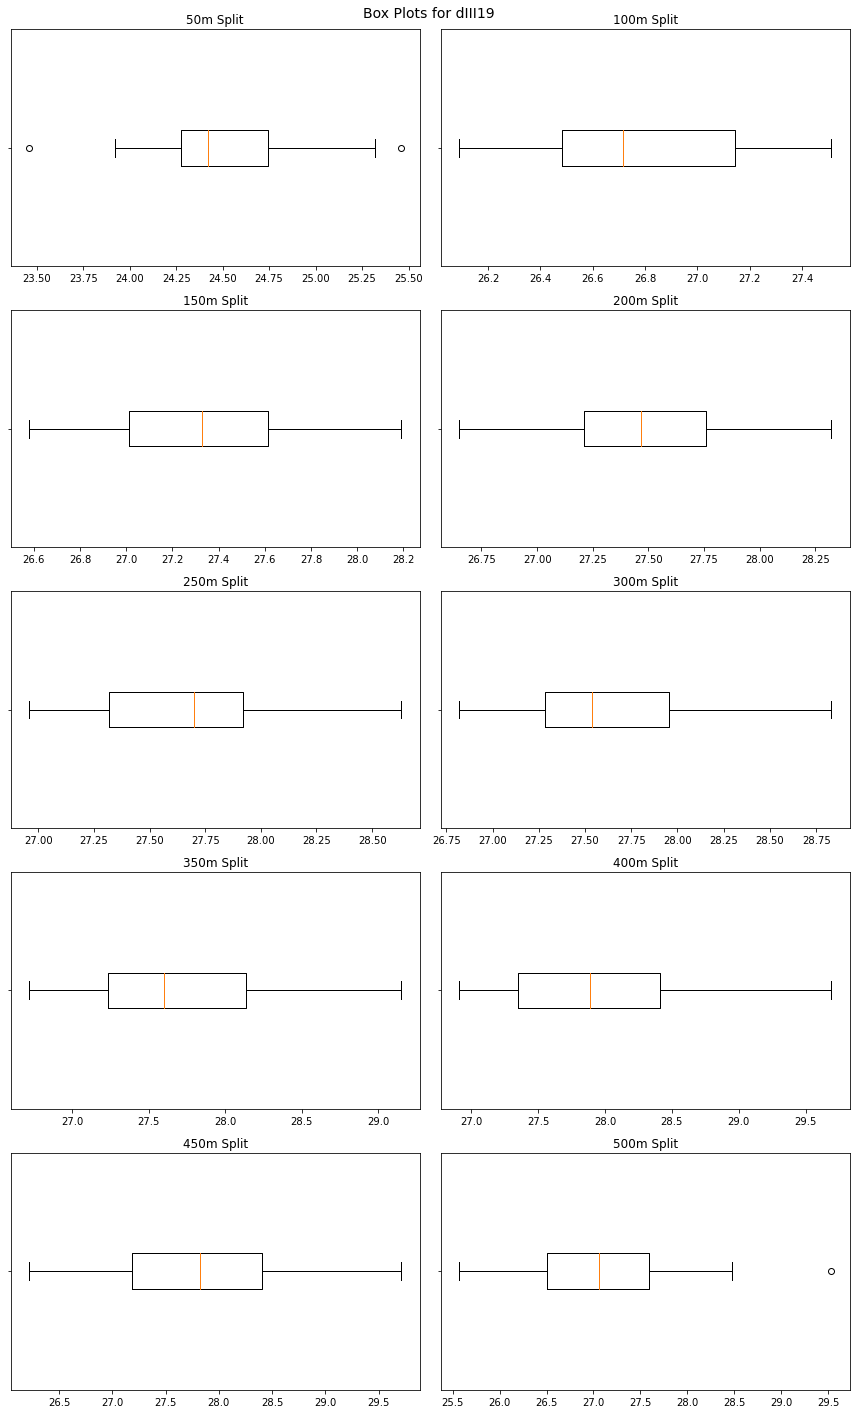

In [32]:
plot_box_plots(dIII19, 'dIII19')

# Violin Plots

In [33]:
def plot_violin_plots(dataframe, name):
    markers = ['50', '100', '150', '200', '250', '300', '350', '400', '450', '500']

    # Calculate the number of rows needed for the given number of markers
    num_rows = math.ceil(len(markers) / 2)

    # Create subplots for the violin plots
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

    # Loop through markers and create violin plots
    for i, marker in enumerate(markers):
        row, col = divmod(i, 2)
        ax = axes[row, col]
        sns.violinplot(x=dataframe[marker], ax=ax)
        ax.set_title(f'{marker}m Split')
        ax.set_xlabel("Time (seconds)")
        ax.set_ylabel(None)

    # Set the title for the entire set of violin plots
    fig.suptitle(f'Violin Plots for {name}', fontsize=14)

    plt.tight_layout()
    plt.show()

**DI 22-23**

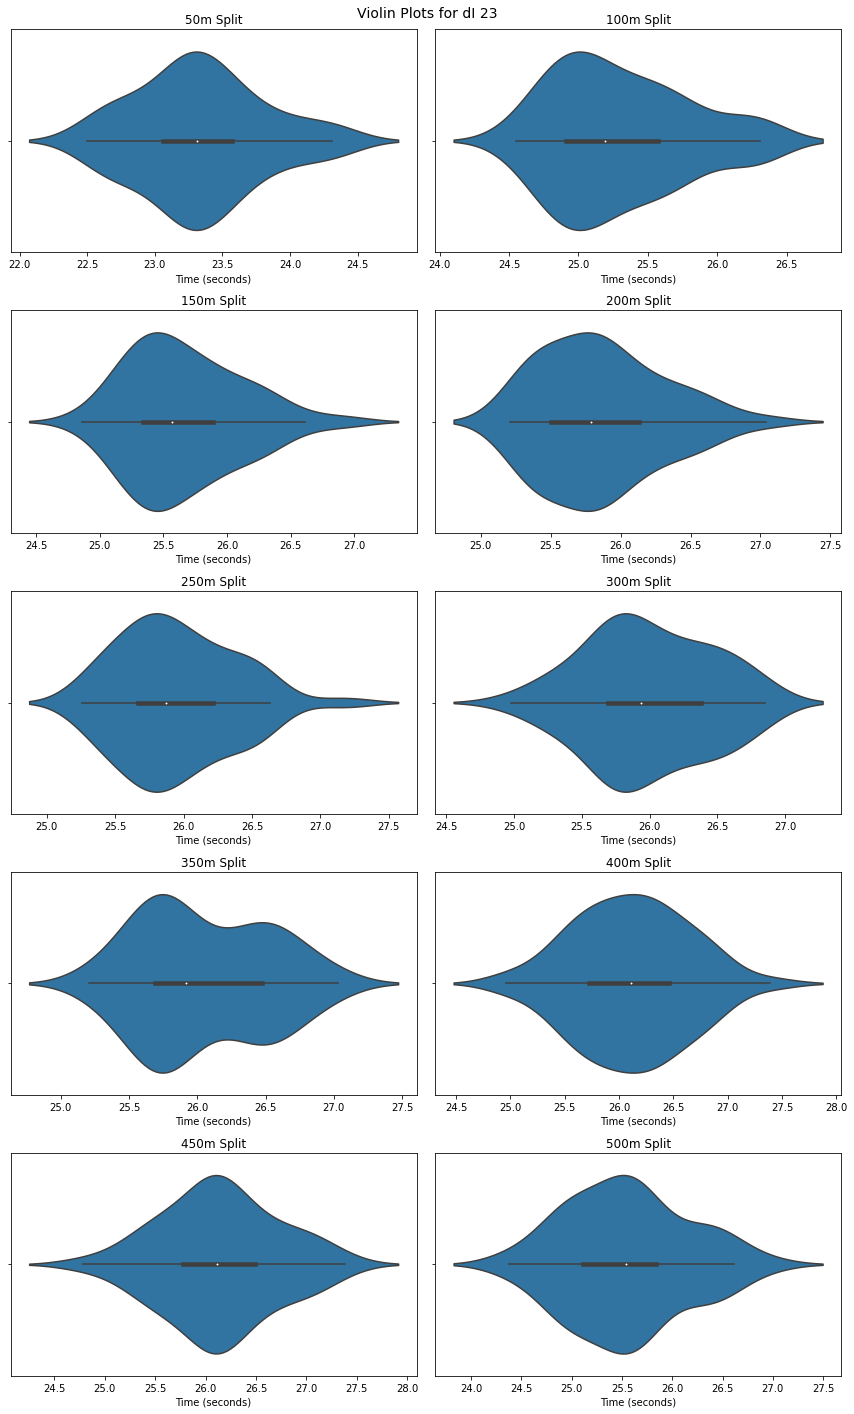

In [34]:
plot_violin_plots(dI23, 'dI 23')

**DII 22-23**

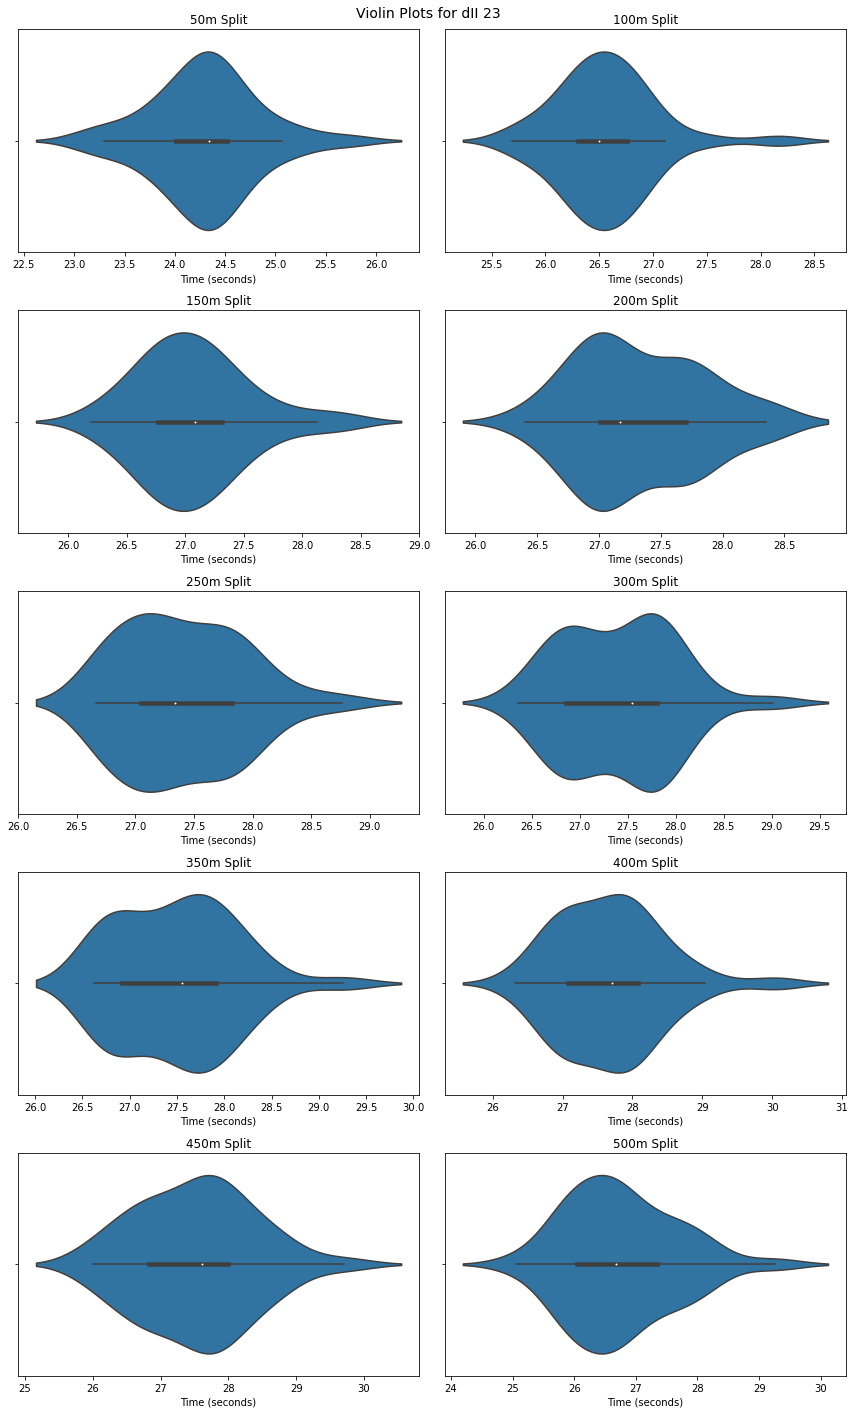

In [35]:
plot_violin_plots(dII23, 'dII 23')

**DIII 22-23**

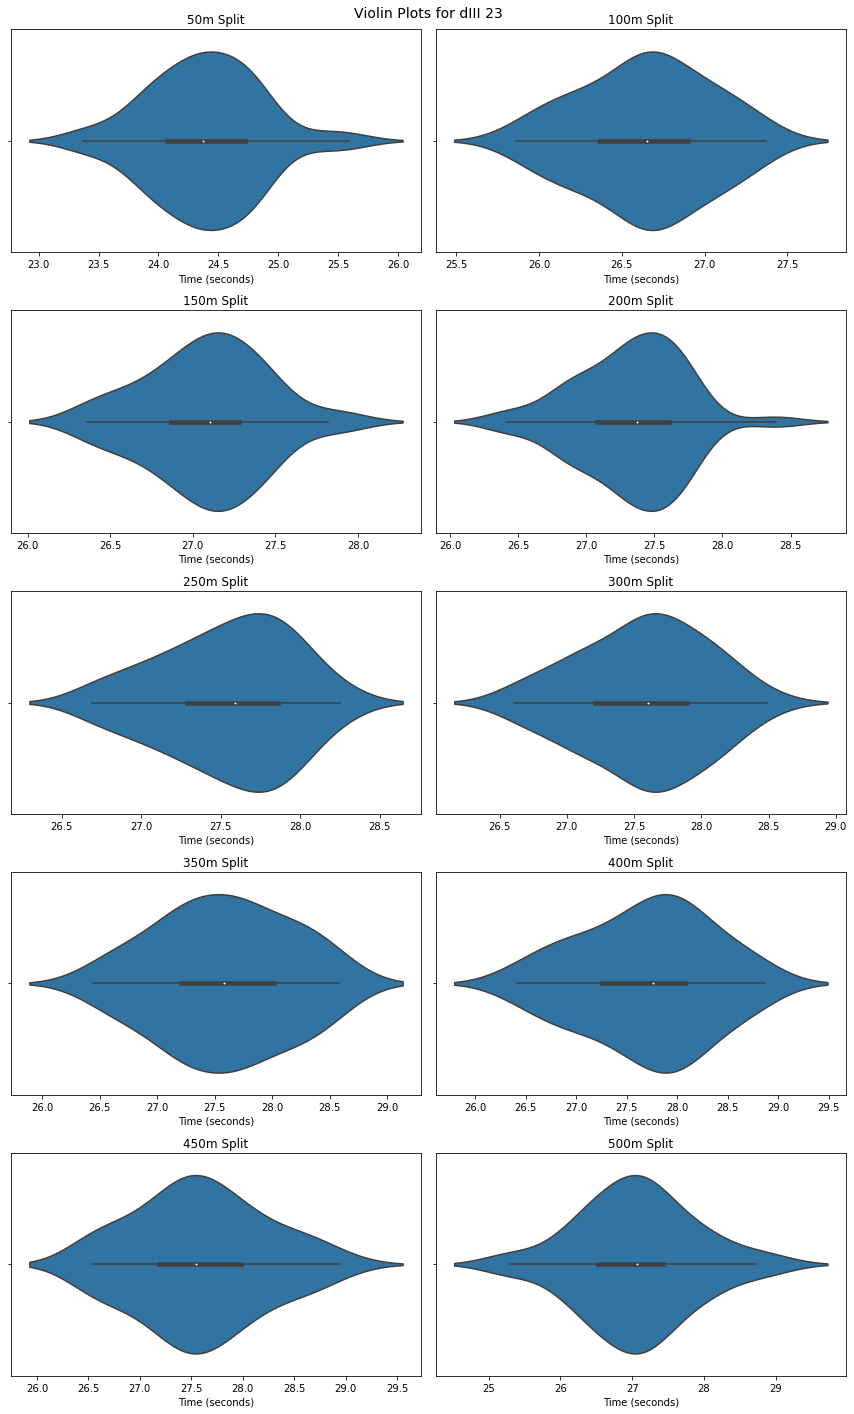

In [36]:
plot_violin_plots(dIII23, 'dIII 23')

**DI 21-22**

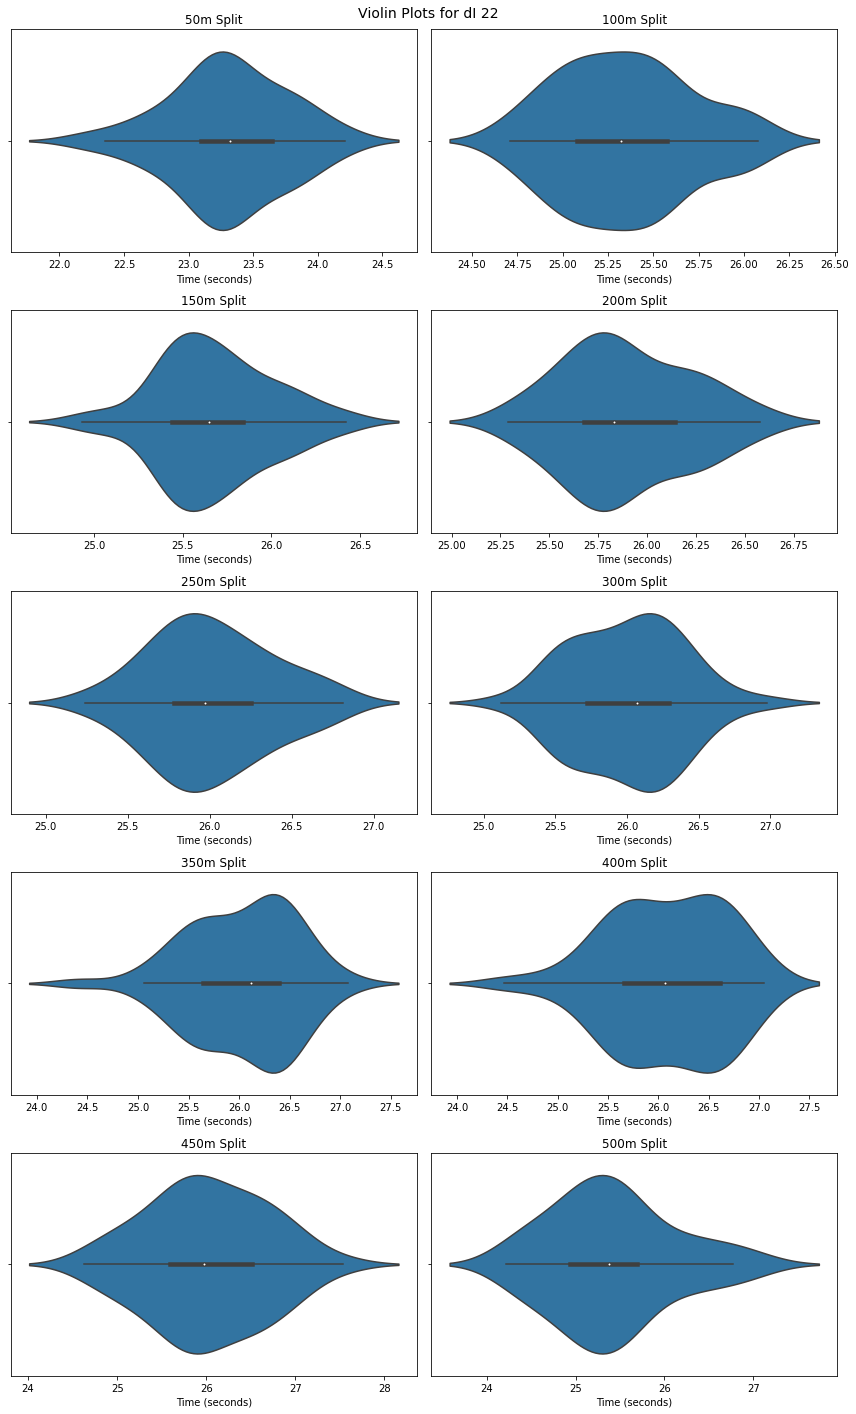

In [37]:
plot_violin_plots(dI22, 'dI 22')

**DII 21-22**

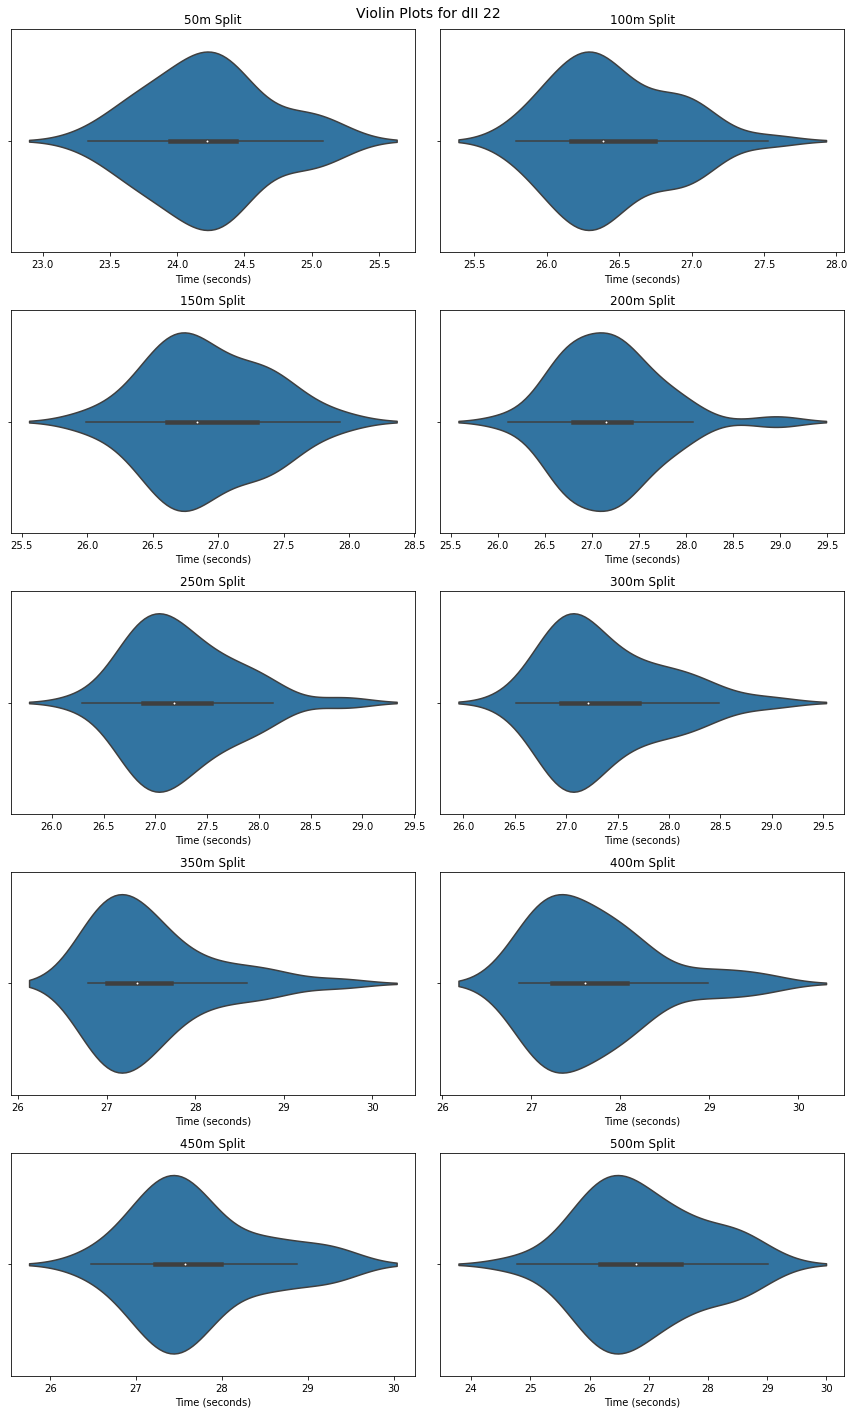

In [38]:
plot_violin_plots(dII22, 'dII 22')

**DIII 21-22**

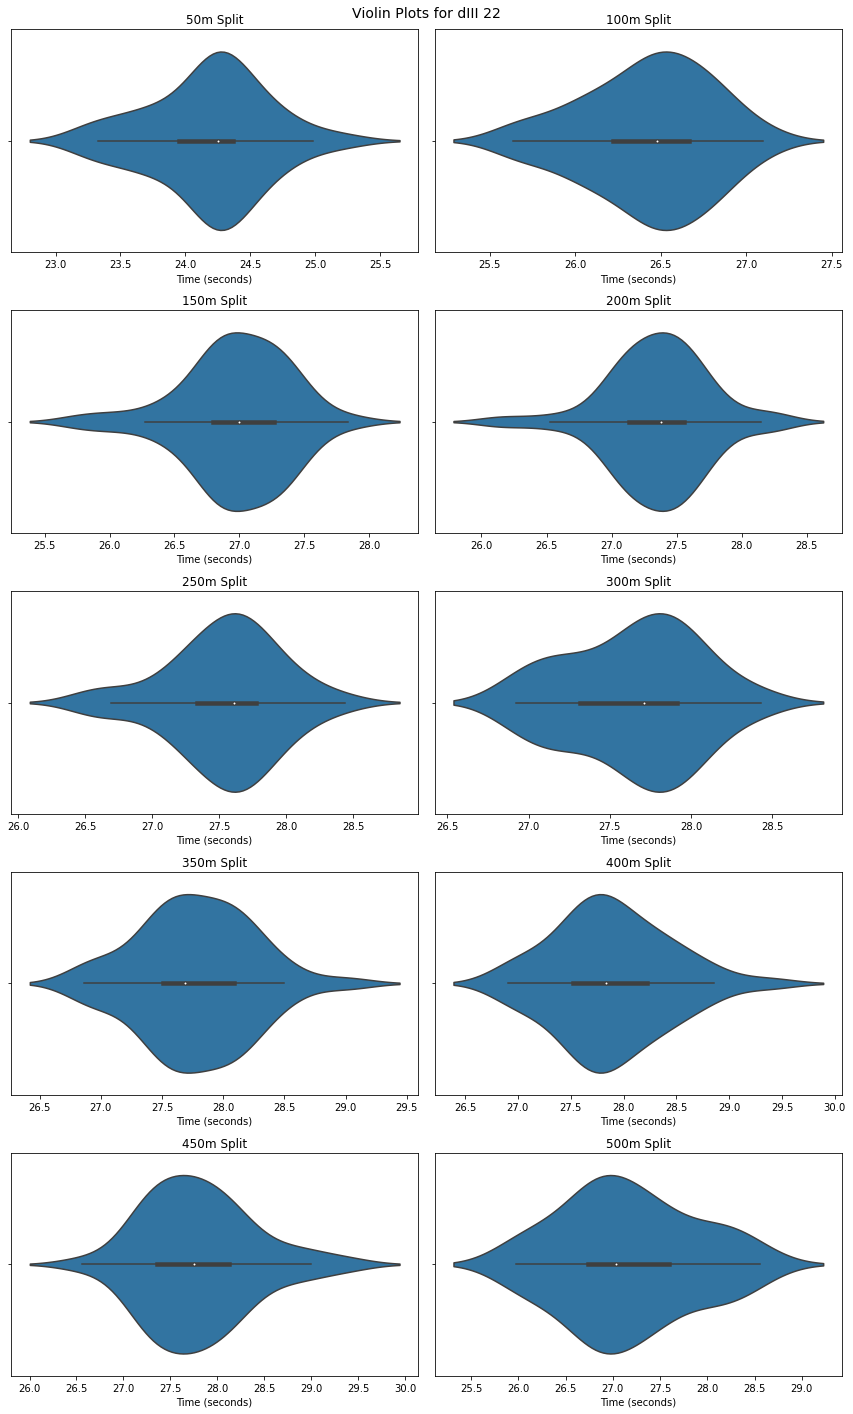

In [39]:
plot_violin_plots(dIII22, 'dIII 22')

**DI 18-19**

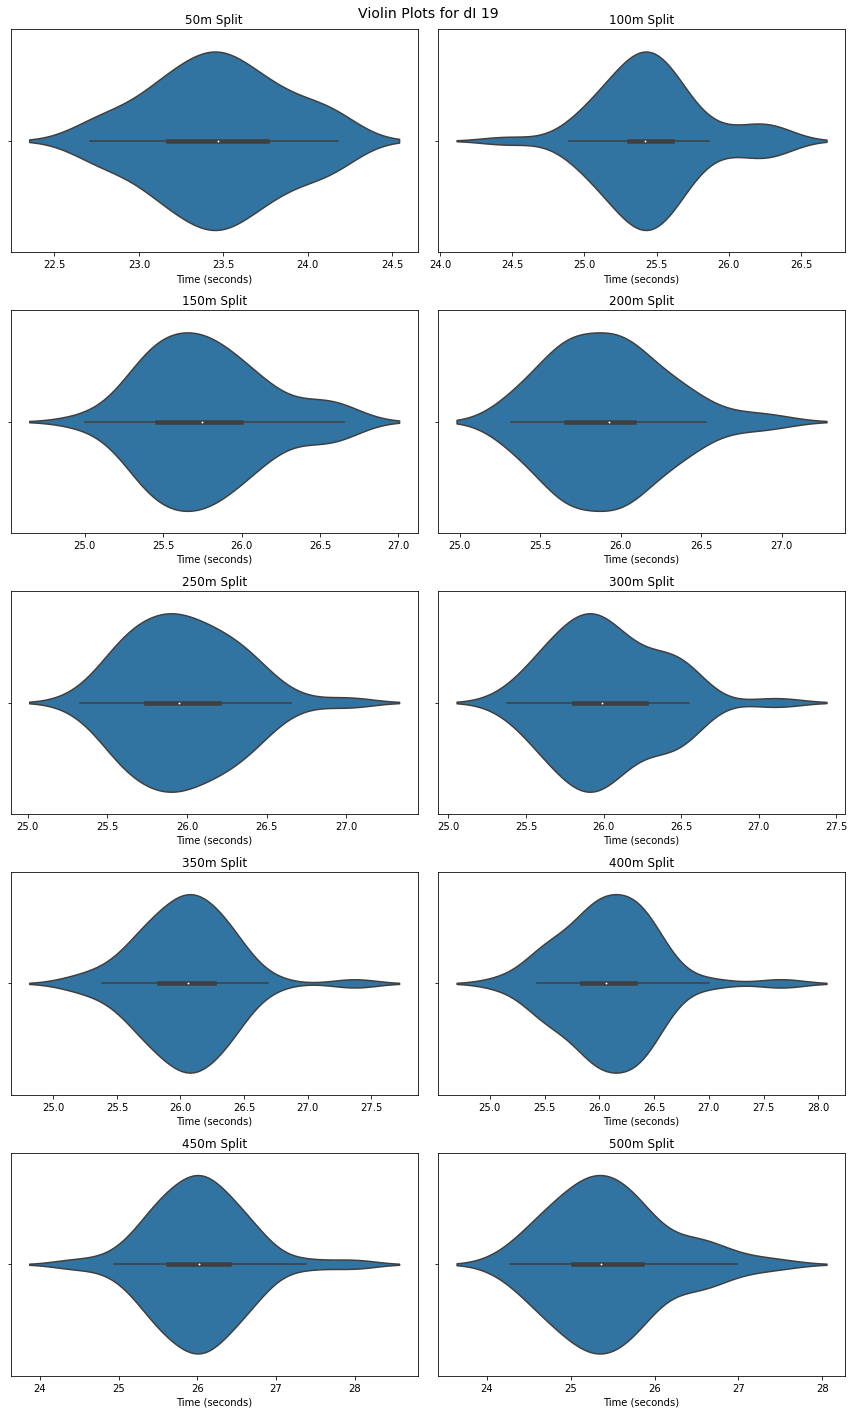

In [40]:
plot_violin_plots(dI19, 'dI 19')

**DII 18-19**

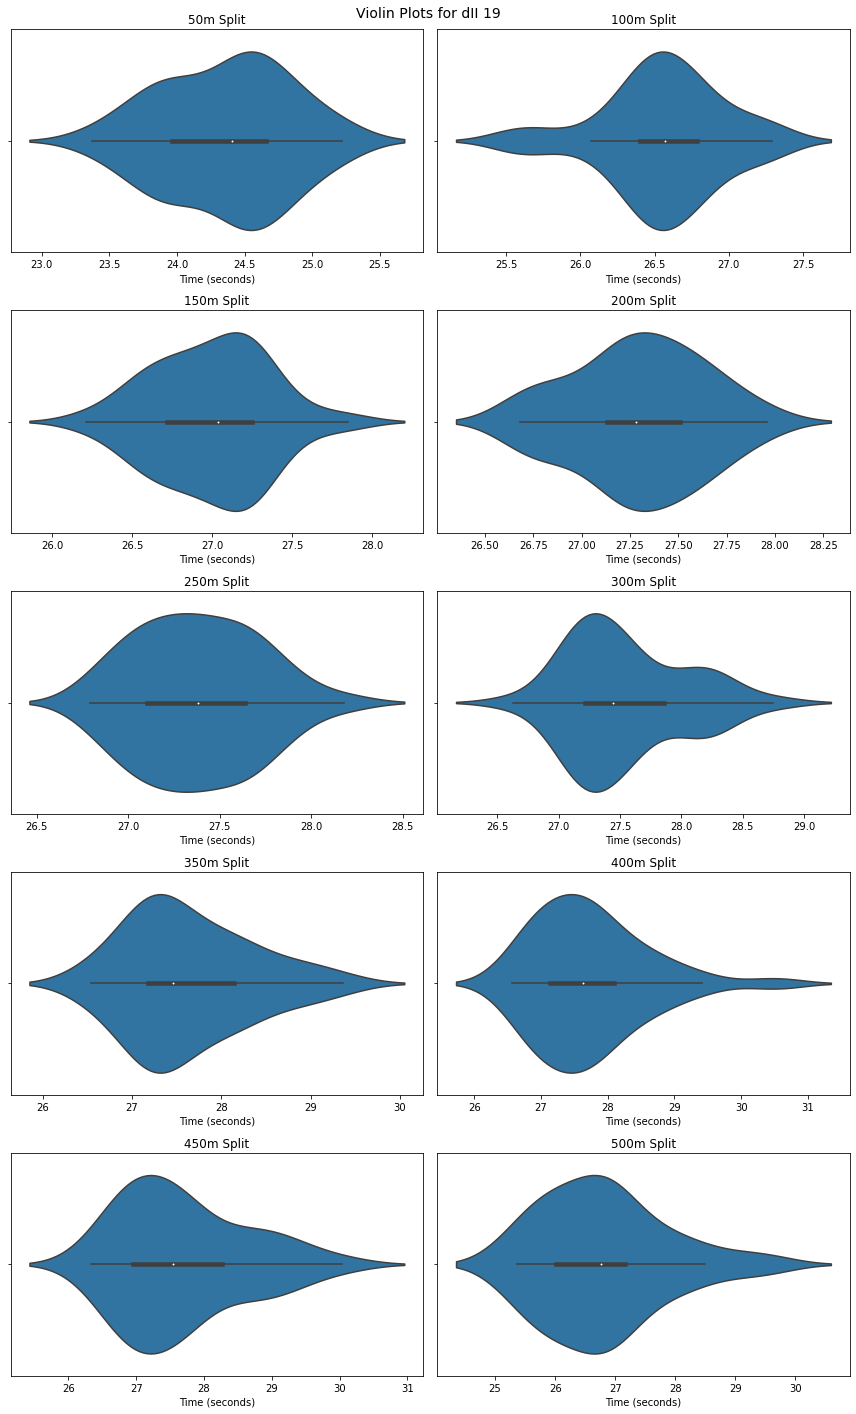

In [41]:
plot_violin_plots(dII19, 'dII 19')

**DIII 18-19**

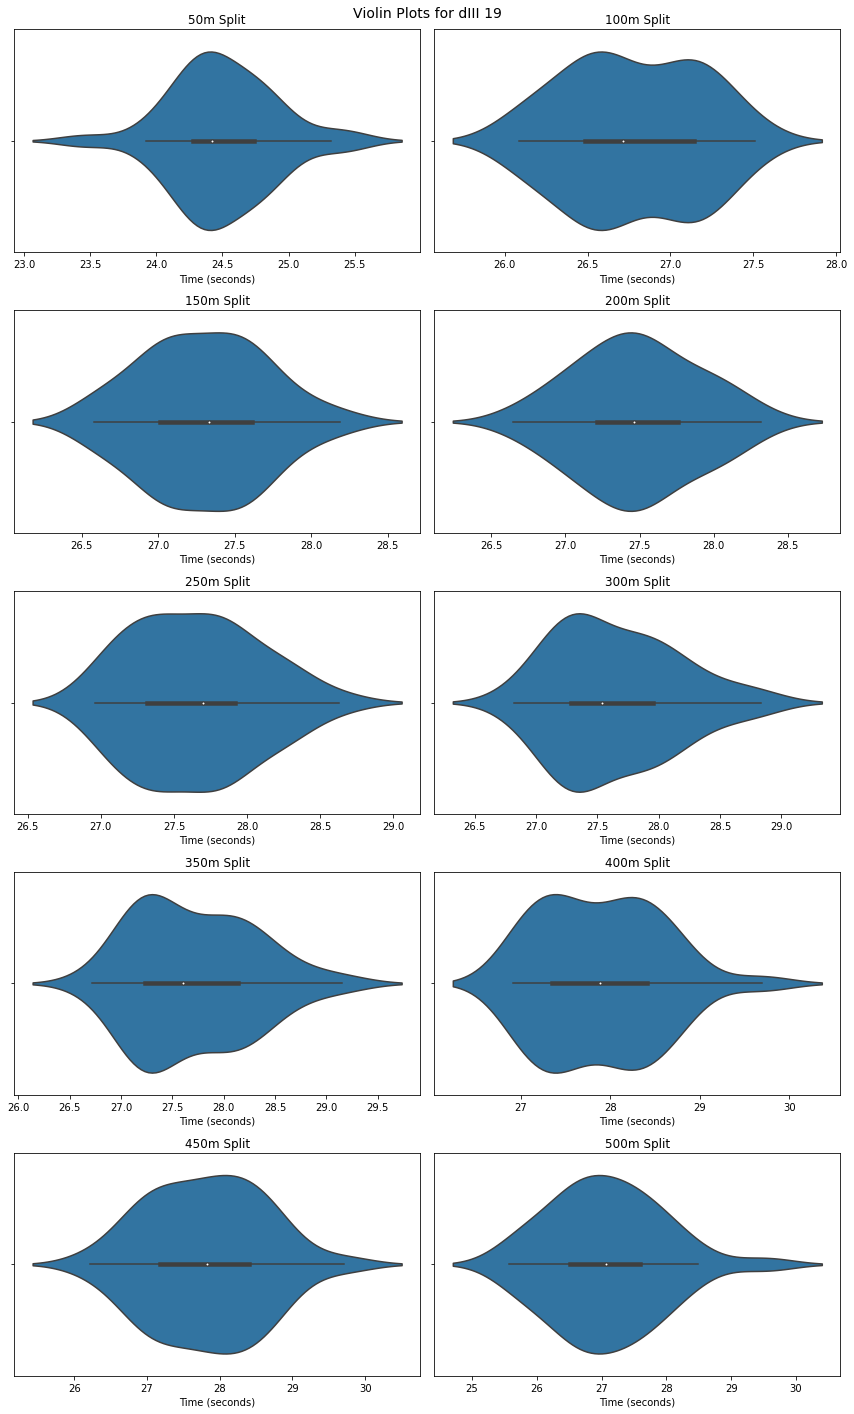

In [42]:
plot_violin_plots(dIII19, 'dIII 19')

# Difference the Splits

In [43]:
def diffSplits(df):
    # Calculate the differences between consecutive split times and store them in a new DataFrame
    differencesDf = pd.DataFrame()

    # Define the splits of interest
    splits = ["50", "100", "150", "200", "250", "300", "350", "400", "450", "500"]

    # Calculate differences for each split interval and add them to the differences_df DataFrame
    for i in range(1, len(splits)):
        split_name = f'{splits[i]}'
        differencesDf[split_name] = df[splits[i]] - df[splits[i-1]]

    # Display the resulting DataFrame
    return differencesDf

**DI 22-23**

In [44]:
dI23Diff = diffSplits(dI23)
dI23Diff.describe()

,100,150,200,250,300,350,400,450,500
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1.971087,0.362826,0.192609,0.093696,0.039130,0.058913,0.058696,0.026957,-0.591087
std,0.261238,0.205563,0.204433,0.125934,0.235427,0.207881,0.258746,0.271881,0.394367
min,1.450000,-0.070000,-0.330000,-0.120000,-0.770000,-0.530000,-0.420000,-0.810000,-1.380000
25%,1.802500,0.230000,0.092500,-0.020000,-0.067500,-0.057500,-0.125000,-0.175000,-0.770000
50%,1.950000,0.370000,0.160000,0.100000,0.090000,0.075000,0.030000,0.045000,-0.560000
75%,2.107500,0.470000,0.360000,0.167500,0.167500,0.160000,0.232500,0.187500,-0.377500
max,2.660000,0.820000,0.580000,0.410000,0.520000,0.550000,0.910000,0.660000,0.260000


**DII 22-23**

In [45]:
dII23Diff = diffSplits(dII23)
dII23Diff.describe()

,100,150,200,250,300,350,400,450,500
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2.263143,0.505143,0.261429,0.077143,-0.003429,0.090857,0.180571,-0.147429,-0.777714
std,0.376046,0.235139,0.211662,0.220528,0.311778,0.271795,0.258627,0.359758,0.485060
min,1.470000,0.160000,-0.300000,-0.310000,-0.870000,-0.880000,-0.380000,-1.100000,-2.260000
25%,2.030000,0.315000,0.130000,-0.055000,-0.080000,-0.040000,0.010000,-0.330000,-0.950000
50%,2.220000,0.500000,0.280000,0.090000,0.010000,0.080000,0.150000,-0.130000,-0.770000
75%,2.440000,0.635000,0.405000,0.210000,0.180000,0.230000,0.340000,0.070000,-0.465000
max,3.330000,1.270000,0.710000,0.610000,0.610000,0.590000,0.790000,0.590000,0.290000


**DIII 22-23**

In [46]:
dIII23Diff = diffSplits(dIII23)
dIII23Diff.describe()

,100,150,200,250,300,350,400,450,500
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,2.260263,0.441316,0.240789,0.220263,0.027368,0.010000,0.115000,-0.111316,-0.528421
std,0.325348,0.253069,0.229127,0.260452,0.214510,0.289277,0.269231,0.319130,0.562425
min,1.620000,-0.260000,-0.250000,-0.140000,-0.650000,-0.830000,-0.500000,-0.890000,-2.130000
25%,2.072500,0.302500,0.085000,0.005000,-0.077500,-0.137500,0.002500,-0.277500,-0.892500
50%,2.200000,0.445000,0.240000,0.185000,0.000000,0.010000,0.135000,-0.155000,-0.445000
75%,2.455000,0.617500,0.392500,0.435000,0.180000,0.150000,0.207500,0.115000,-0.152500
max,3.180000,0.910000,0.670000,1.000000,0.350000,0.680000,0.880000,0.730000,0.520000


**DI 21-22**

In [47]:
dI22Diff = diffSplits(dI22)
dI22Diff.describe()

,100,150,200,250,300,350,400,450,500
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.037083,0.331875,0.220417,0.114375,-0.008125,0.018542,0.059583,-0.061042,-0.613333
std,0.343145,0.173777,0.137963,0.189612,0.221395,0.280880,0.221311,0.426401,0.437061
min,1.470000,0.040000,-0.080000,-0.210000,-0.580000,-1.210000,-0.360000,-1.900000,-1.660000
25%,1.795000,0.207500,0.137500,-0.022500,-0.115000,-0.060000,-0.057500,-0.230000,-0.822500
50%,2.030000,0.320000,0.235000,0.090000,-0.005000,0.075000,0.050000,0.005000,-0.590000
75%,2.210000,0.437500,0.302500,0.232500,0.132500,0.177500,0.180000,0.175000,-0.410000
max,2.930000,0.730000,0.490000,0.730000,0.420000,0.420000,0.820000,0.680000,0.830000


**DII 21-22**

In [48]:
dII22Diff = diffSplits(dII22)
dII22Diff.describe()

,100,150,200,250,300,350,400,450,500
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2.229429,0.456571,0.262286,0.077429,0.127429,0.119143,0.197429,0.007714,-0.811714
std,0.323909,0.236667,0.260080,0.238147,0.272314,0.288203,0.234575,0.368942,0.586417
min,1.680000,-0.180000,-0.160000,-0.580000,-0.790000,-0.450000,-0.430000,-0.850000,-2.340000
25%,2.000000,0.375000,0.085000,-0.045000,0.010000,-0.095000,0.035000,-0.255000,-1.045000
50%,2.160000,0.440000,0.280000,0.090000,0.150000,0.130000,0.170000,0.010000,-0.880000
75%,2.535000,0.485000,0.420000,0.195000,0.260000,0.290000,0.330000,0.225000,-0.440000
max,2.910000,1.260000,1.030000,0.620000,0.790000,0.860000,0.680000,0.910000,0.390000


**DIII 21-22**

In [49]:
dIII22Diff = diffSplits(dIII22)
dIII22Diff.describe()

,100,150,200,250,300,350,400,450,500
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,2.244359,0.544103,0.376923,0.187949,0.107436,0.134103,0.110513,-0.094872,-0.628462
std,0.381250,0.265049,0.279315,0.178711,0.203815,0.215195,0.302036,0.339053,0.396136
min,1.380000,-0.320000,-0.140000,-0.110000,-0.340000,-0.290000,-0.750000,-1.150000,-1.460000
25%,2.005000,0.375000,0.200000,0.075000,-0.010000,-0.010000,-0.035000,-0.205000,-0.930000
50%,2.280000,0.540000,0.380000,0.210000,0.110000,0.100000,0.100000,-0.060000,-0.570000
75%,2.470000,0.670000,0.510000,0.315000,0.230000,0.255000,0.275000,0.070000,-0.360000
max,3.000000,1.040000,1.080000,0.530000,0.440000,0.650000,0.800000,0.430000,0.230000


**DI 18-19**

In [50]:
dI19Diff = diffSplits(dI19)
dI19Diff.describe()

,100,150,200,250,300,350,400,450,500
count,46.00000,46.000000,46.000000,46.000000,46.000000,4.600000e+01,46.000000,46.000000,46.000000
mean,1.99087,0.313478,0.148913,0.060000,0.043043,1.500000e-02,0.048261,-0.071087,-0.543478
std,0.26568,0.224640,0.213148,0.220414,0.224726,2.069004e-01,0.258743,0.309761,0.422354
min,1.22000,-0.310000,-0.340000,-0.520000,-0.610000,-4.900000e-01,-0.760000,-1.180000,-1.760000
25%,1.86250,0.150000,-0.007500,-0.045000,-0.082500,-1.250000e-01,-0.087500,-0.227500,-0.775000
50%,2.01000,0.300000,0.130000,0.050000,0.100000,-1.776357e-15,0.130000,-0.070000,-0.545000
75%,2.16250,0.482500,0.300000,0.205000,0.187500,1.950000e-01,0.242500,0.137500,-0.320000
max,2.56000,0.840000,0.630000,0.550000,0.430000,3.400000e-01,0.410000,0.560000,0.620000


**DII 18-19**

In [51]:
dII19Diff = diffSplits(dII19)
dII19Diff.describe()

,100,150,200,250,300,350,400,450,500
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2.190029,0.444829,0.302857,0.081714,0.159429,0.104000,0.090286,-0.041429,-0.894571
std,0.409782,0.281428,0.277611,0.269994,0.269443,0.351419,0.290552,0.330188,0.458568
min,1.520000,-0.160000,-0.250000,-0.790000,-0.570000,-1.020000,-0.500000,-0.770000,-1.820000
25%,1.880000,0.259500,0.175000,-0.070000,0.035000,-0.060000,-0.045000,-0.225000,-1.110000
50%,2.150000,0.490000,0.310000,0.090000,0.110000,0.150000,0.040000,0.010000,-0.870000
75%,2.470000,0.655000,0.440000,0.235000,0.230000,0.285000,0.205000,0.115000,-0.570000
max,3.320000,0.920000,0.890000,0.740000,1.110000,0.800000,1.150000,0.690000,0.100000


**DIII 18-19**

In [52]:
dIII19Diff = diffSplits(dIII19)
dIII19Diff.describe()

,100,150,200,250,300,350,400,450,500
count,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.281562,0.51875,0.184063,0.165000,0.005000,0.063437,0.175313,-0.073125,-0.740313
std,0.352741,0.31836,0.244222,0.228685,0.309943,0.341841,0.294432,0.488093,0.458451
min,1.610000,-0.44000,-0.270000,-0.430000,-0.610000,-0.880000,-0.370000,-1.320000,-1.590000
25%,1.995000,0.30750,0.025000,0.057500,-0.177500,-0.132500,-0.040000,-0.265000,-1.040000
50%,2.225000,0.55000,0.160000,0.140000,0.000000,0.060000,0.165000,0.000000,-0.760000
75%,2.542500,0.68750,0.362500,0.310000,0.200000,0.260000,0.342500,0.170000,-0.482500
max,3.150000,1.20000,0.650000,0.640000,0.730000,0.700000,0.950000,0.980000,0.530000


18-19 the 150 split is always slower looking at 25 percentile. Consistently, for all divisions. 300 unward 25% descend. 

# Combine Diff

**DI**

In [53]:
dI_diff = pd.concat([dI23Diff, dI22Diff, dI19Diff], axis=0)
dI_diff.reset_index(drop=True, inplace=True)
dI_diff.describe()

,100,150,200,250,300,350,400,450,500
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2.000214,0.336000,0.187786,0.089714,0.024214,0.030643,0.055571,-0.035429,-0.583071
std,0.292470,0.201594,0.188546,0.183103,0.226757,0.234353,0.244818,0.344104,0.416589
min,1.220000,-0.310000,-0.340000,-0.520000,-0.770000,-1.210000,-0.760000,-1.900000,-1.760000
25%,1.807500,0.200000,0.047500,-0.030000,-0.092500,-0.080000,-0.100000,-0.212500,-0.795000
50%,1.990000,0.330000,0.175000,0.080000,0.080000,0.060000,0.055000,-0.010000,-0.560000
75%,2.170000,0.470000,0.310000,0.210000,0.162500,0.180000,0.220000,0.170000,-0.360000
max,2.930000,0.840000,0.630000,0.730000,0.520000,0.550000,0.910000,0.680000,0.830000


**DII**

In [54]:
dII_diff = pd.concat([dII23Diff, dII22Diff, dII19Diff], axis=0)
dII_diff.reset_index(drop=True, inplace=True)
dII_diff.describe()

,100,150,200,250,300,350,400,450,500
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,2.227533,0.468848,0.275524,0.078762,0.094476,0.104667,0.156095,-0.060381,-0.828000
std,0.369227,0.250935,0.249665,0.241405,0.291148,0.303008,0.263988,0.355930,0.510413
min,1.470000,-0.180000,-0.300000,-0.790000,-0.870000,-1.020000,-0.500000,-1.100000,-2.340000
25%,1.980000,0.300000,0.100000,-0.060000,-0.020000,-0.060000,0.000000,-0.260000,-1.060000
50%,2.170000,0.460000,0.290000,0.090000,0.100000,0.120000,0.130000,-0.050000,-0.820000
75%,2.500000,0.620000,0.430000,0.210000,0.240000,0.270000,0.290000,0.130000,-0.470000
max,3.330000,1.270000,1.030000,0.740000,1.110000,0.860000,1.150000,0.910000,0.390000


**DIII**

In [55]:
dIII_diff = pd.concat([dIII23Diff, dIII22Diff, dIII19Diff], axis=0)
dIII_diff.reset_index(drop=True, inplace=True)
dIII_diff.describe()

,100,150,200,250,300,350,400,450,500
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000
mean,2.260826,0.500826,0.272844,0.192477,0.049450,0.070092,0.131101,-0.094220,-0.626422
std,0.351207,0.278871,0.262992,0.223587,0.244797,0.285075,0.287468,0.379415,0.480766
min,1.380000,-0.440000,-0.270000,-0.430000,-0.650000,-0.880000,-0.750000,-1.320000,-2.130000
25%,2.010000,0.330000,0.070000,0.030000,-0.080000,-0.070000,-0.030000,-0.260000,-0.960000
50%,2.230000,0.520000,0.280000,0.180000,0.090000,0.060000,0.140000,-0.060000,-0.570000
75%,2.480000,0.660000,0.460000,0.340000,0.200000,0.240000,0.280000,0.120000,-0.340000
max,3.180000,1.200000,1.080000,1.000000,0.730000,0.700000,0.950000,0.980000,0.530000


# Percentiles with Row in Tact

In [56]:
def percentiles(dataframe):
    total_rows = len(dataframe)
    specific_rows = [
        dataframe.iloc[0],  # 0th index, min
        dataframe.iloc[total_rows // 4],  # 1/4 index, 25%
        dataframe.iloc[total_rows // 2],  # 1/2 index, 50%
        dataframe.iloc[3 * (total_rows // 4)],  # 3/4 index, 75%
        dataframe.iloc[-1],  # Last index, max
    ]
    specific_rows_df = pd.DataFrame(specific_rows)
    specific_rows_df.index = ['min', '25%', '50%', '75%', 'max']
    return specific_rows_df

**DI 22-23**

In [57]:
percdI23 = percentiles(dI23)
percdI23

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,David Johnston,Texas,4:10.02,+0.4%,PB,22.95,24.90,25.11,25.27,25.26,25.28,25.30,25.39,25.56,25.00
25%,Michael Bonson,Auburn,4:12.50,+0.2%,PB,23.42,25.50,25.43,25.37,25.56,25.66,25.68,25.44,25.48,24.96
50%,Bar Soloveychik,Minnesota,4:15.87,-0.6%,,23.50,25.25,25.41,25.80,26.12,26.25,26.36,26.29,26.11,24.78
75%,Mason Edmund,Ohio State,4:18.49,+0.1%,PB,23.88,25.74,25.83,26.19,26.34,26.51,26.62,26.52,26.10,24.76
max,Levi Sandidge,Kentucky,4:24.68,-1.7%,,24.12,26.22,26.93,27.04,27.18,26.43,26.93,26.94,27.07,25.82


**DII 22-23**

In [58]:
percdII23 = percentiles(dII23)
percdII23

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Victor Rosado,Oklahoma Christian,4:21.80,-0.7%,,24.27,26.71,26.87,26.57,26.68,26.62,26.70,26.32,26.00,25.06
25%,Santi Corredor Zabala,Tampa,4:24.39,-1.7%,,23.98,26.20,26.76,27.23,26.92,26.71,26.66,26.82,26.79,26.32
50%,Tomasz Jackowski,Wayne State,4:30.09,-1.1%,,24.11,26.16,26.47,26.83,27.14,27.31,27.75,28.11,28.20,28.01
75%,Stanislaw Chalat,Indianapolis,4:32.65,-0.1%,,24.72,26.62,27.17,27.64,27.61,27.55,27.73,28.08,28.06,27.47
max,Ronan Lauinger,Colorado Mines,4:44.41,-4.8%,,25.07,27.11,27.84,28.35,28.76,29.01,29.26,30.05,29.71,29.25


**DIII 22-23**

In [59]:
percdIII23 = percentiles(dIII23)
percdIII23

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Pat Pema,Emory,4:21.68,+0.4%,PB,23.45,25.86,26.36,26.46,26.69,26.61,26.44,26.46,26.55,26.80
25%,Marcell Milo-Sidlo,Chicago,4:27.25,+0.2%,PB,24.36,26.56,26.62,26.85,26.79,26.97,27.09,27.06,27.79,27.16
50%,Daniel Byrnes,Johns Hopkins,4:31.67,-0.1%,,24.31,27.14,27.48,27.69,27.62,27.57,27.57,27.53,27.74,27.02
75%,Riley Griffis,Middlebury,4:32.79,-1.6%,,24.26,26.27,27.18,27.36,27.44,27.62,27.73,28.01,28.20,28.72
max,Brian Bull,TCNJ,4:39.50,-3.0%,,25.36,27.29,27.92,28.39,28.25,28.49,28.58,28.71,28.66,27.85


**DI 21-22**

In [60]:
percdI22 = percentiles(dI22)
percdI22

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Matt Sates,Georgia,4:08.73,+0.1%,PB,22.35,25.28,25.49,25.82,25.89,25.63,24.42,24.47,24.86,24.52
25%,Trey Freeman,Florida,4:12.80,+0.2%,SB,22.80,24.80,25.44,25.73,25.90,26.15,26.07,25.97,25.69,24.25
50%,Andrew Gray,Arizona State,4:16.27,-0.7%,,23.37,25.52,25.70,25.79,26.05,26.14,26.17,26.24,26.12,25.17
75%,Connor LaMastra,Northwestern,4:19.49,-0.4%,,23.69,25.97,26.08,26.34,26.52,26.13,26.36,26.37,26.51,25.52
max,Chris Nagy,Minnesota,4:21.64,+0.6%,PB,24.18,25.87,26.17,26.58,26.81,26.70,26.69,26.64,26.57,25.43


**DII 21-22**

In [61]:
percdII22 = percentiles(dII22)
percdII22

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Luca Alessandrini,Nova Southeastern,4:23.81,-1.3%,,24.04,26.03,26.49,26.58,26.83,26.95,26.85,26.89,27.14,26.01
25%,Cedric BUESSING,Indianapolis,4:25.27,–,,23.76,26.34,26.62,26.92,27.05,27.28,27.19,27.32,27.24,25.55
50%,Momo MASMOUDI,Lynn,4:28.98,-1.0%,,24.37,26.44,26.92,27.35,26.99,27.37,27.79,28.27,27.91,25.57
75%,Matheus Laperreire,Colorado Mesa,4:30.86,+0.5%,SB,24.09,26.78,27.40,27.81,27.74,26.95,27.44,27.25,27.79,27.61
max,Josh Fountain,Lynn,4:43.99,-6.1%,,24.88,27.53,27.93,28.96,28.82,28.97,29.61,29.63,29.24,28.42


**DIII 21-22**

In [62]:
percdIII22 = percentiles(dIII22)
percdIII22

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Mason Kelber,Washington (Mo),4:24.31,+0.3%,PB,23.74,25.69,26.02,26.53,26.49,26.92,26.96,27.51,27.51,26.94
25%,Adam Copses,Emory,4:29.14,+0.2%,PB,24.25,26.25,26.78,27.05,27.28,27.36,27.80,27.68,27.66,27.03
50%,Pace Edwards,Washington (Mo),4:31.03,-0.5%,,24.25,26.85,27.22,27.26,27.38,27.55,27.68,27.83,27.77,27.24
75%,Nathaniel Yeoh,NYU,4:32.57,+0.6%,PB,23.74,26.20,26.86,27.70,27.61,27.94,28.50,28.25,28.17,27.60
max,NaN,NaN,NaN,NaN,NaN,23.53,26.53,27.46,28.15,28.44,28.35,29.00,29.37,29.38,28.56


**DI 18-19**

In [63]:
percdI19 = percentiles(dI19)
percdI19

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Townley Haas,Texas,4:11.01,+0.9%,SB,22.90,24.98,25.24,25.38,25.59,25.81,25.64,25.49,25.33,24.65
25%,Brendan Casey,Virginia,4:14.23,-0.6%,,23.38,25.20,25.47,25.64,25.65,25.84,26.14,26.01,25.61,25.29
50%,Austin Katz,Texas,4:16.06,+1.6%,PB,23.08,25.08,25.36,25.84,26.21,26.53,26.22,26.24,25.93,25.57
75%,Mikey Calvillo,Indiana,4:18.18,-0.4%,,23.87,26.07,26.17,26.21,26.26,26.23,26.08,25.99,25.92,25.38
max,Samuel Rice,Tennessee,4:27.74,-2.5%,,23.81,25.86,26.58,26.94,27.01,27.11,27.37,27.66,27.99,27.41


**DII 18-19**

In [64]:
percdII19 = percentiles(dII19)
percdII19

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Adrian VanderHelm,Simon Fraser,4:24.51,-0.8%,,23.75,26.71,27.20,27.78,26.99,27.08,26.57,26.56,26.50,25.37
25%,Matthew George,Carson-Newman,4:26.26,+0.1%,PB,24.39,26.83,26.85,27.50,27.35,27.33,27.05,26.92,26.34,25.70
50%,Ahmed Ahmed,Wayne State,4:29.10,-0.6%,,24.73,26.58,26.64,26.97,27.28,27.41,27.68,27.90,27.24,26.67
75%,Alex Norcini,Rollins,4:32.45,+0.8%,SB,24.54,26.52,27.22,27.96,27.91,28.25,28.23,28.03,27.78,26.01
max,Matija Luka Rafaj,Saint Leo,4:38.48,-5.6%,,23.73,25.60,26.42,27.28,27.64,28.75,29.36,30.51,30.04,29.15


**DIII 18-19**

In [65]:
percdIII19 = percentiles(dIII19)
percdIII19

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500
min,Bryan Fitzgerald,Kenyon,4:26.22,+1.0%,PB,23.46,26.16,27.36,27.35,27.41,27.27,27.25,27.13,26.93,25.90
25%,James Baker,Denison,4:27.68,-0.1%,,24.75,26.58,27.13,27.55,27.12,27.10,27.07,26.91,26.98,26.49
50%,Richie Dauksher,Carnegie Mellon,4:31.38,-0.3%,,24.37,26.78,27.68,27.69,27.85,27.29,27.36,27.60,27.76,27.00
75%,Rick Reinhard,Washington (Mo),4:35.23,-1.7%,,24.59,27.14,27.40,28.05,27.92,27.84,28.02,28.15,28.54,27.58
max,Eric Wong,Amherst,4:39.68,-2.3%,,24.39,27.10,27.71,28.15,28.23,28.45,29.15,29.69,28.60,28.21


# Which Third Is the Fastest

In [66]:
def thirds(dataframe):
    # Add columns for the sum of splits
    dataframe['First Third'] = dataframe['100'] + dataframe['150'] + dataframe['200']
    dataframe['Second Third'] = dataframe['250'] + dataframe['300'] + dataframe['350']
    dataframe['Last Third'] = dataframe['400'] + dataframe['450'] + dataframe['500']
    
    #Add First Half, Second Half or Last Third
    dataframe['Fastest'] = dataframe[['First Third', 'Second Third', 'Last Third']].idxmin(axis=1)
    
    return dataframe

**DI 22-23**

In [67]:
thirdI23 = thirds(dI23)
thirdI23.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,David Johnston,Texas,4:10.02,+0.4%,PB,22.95,24.90,25.11,25.27,25.26,25.28,25.30,25.39,25.56,25.00,75.28,75.84,75.95,First Third
1,Luke Hobson,Texas,4:10.51,+1.3%,SB,22.58,24.88,25.23,25.40,25.48,25.66,25.71,25.43,25.76,24.38,75.51,76.85,75.57,First Third
2,Gabriel Jett,California,4:10.62,-0.4%,,22.68,24.86,25.33,25.49,25.75,24.98,25.53,25.93,25.12,24.95,75.68,76.26,76.00,First Third
3,Alfonso Mestre,Florida,4:10.78,-0.3%,,22.78,24.89,25.28,25.64,25.58,25.34,25.62,25.65,25.46,25.54,75.81,76.54,76.65,First Third
4,Jake Newmark,Wisconsin,4:10.80,+0.9%,PB,23.12,24.83,25.47,25.41,25.34,25.24,25.47,25.55,25.29,25.08,75.71,76.05,75.92,First Third


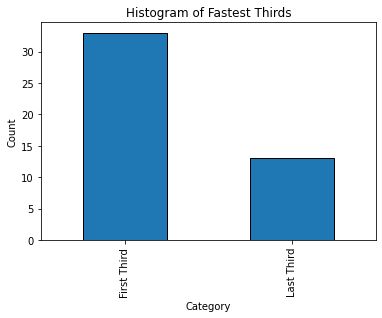

In [68]:
thirdI23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 22-23**

In [69]:
thirdII23 = thirds(dII23)
thirdII23.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Victor Rosado,Oklahoma Christian,4:21.80,-0.7%,,24.27,26.71,26.87,26.57,26.68,26.62,26.70,26.32,26.00,25.06,80.15,80.00,77.38,Last Third
1,Eric Hieber,Grand Valley,4:22.75,+0.3%,PB,23.41,26.19,26.78,27.00,26.84,26.87,26.83,26.96,26.26,25.61,79.97,80.54,78.83,Last Third
2,Cedric BUESSING,Indianapolis,4:22.78,-0.8%,,23.14,25.69,26.38,26.78,26.72,26.82,26.99,26.94,27.04,26.28,78.85,80.53,80.26,First Third
3,Luca Alessandrini,Nova Southeastern,4:23.21,+1.0%,SB,24.05,26.03,26.19,26.40,26.66,26.85,27.07,27.22,26.79,25.95,78.62,80.58,79.96,First Third
4,Joao Nogueira,Drury,4:23.72,-0.4%,,23.78,25.89,26.43,27.01,26.74,26.80,27.39,27.28,26.67,25.73,79.33,80.93,79.68,First Third


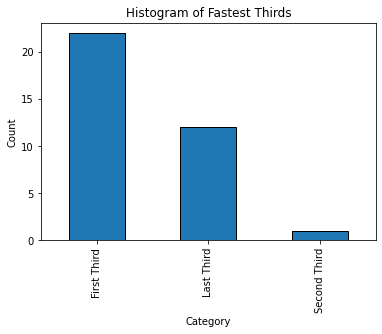

In [70]:
thirdII23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 22-23**

In [71]:
thirdIII23 = thirds(dIII23)
thirdIII23.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Pat Pema,Emory,4:21.68,+0.4%,PB,23.45,25.86,26.36,26.46,26.69,26.61,26.44,26.46,26.55,26.80,78.68,79.74,79.81,First Third
1,Kellen Roddy,Johns Hopkins,4:23.18,+1.3%,PB,24.23,26.30,26.39,26.41,26.75,26.69,26.64,26.71,26.91,26.15,79.10,80.08,79.77,First Third
2,Mason Kelber,Washington (Mo),4:24.16,+0.2%,PB,23.80,25.99,26.45,26.78,27.06,27.07,27.00,26.82,26.62,26.57,79.22,81.13,80.01,First Third
3,Justin Finkel,Connecticut College,4:24.49,+0.5%,PB,24.31,26.53,27.11,27.06,27.42,26.77,26.68,26.75,26.55,25.31,80.70,80.87,78.61,Last Third
4,Bryan Fitzgerald,Kenyon,4:26.23,-0.1%,,24.02,26.57,26.88,26.82,27.01,26.91,26.87,27.01,27.14,27.00,80.27,80.79,81.15,First Third


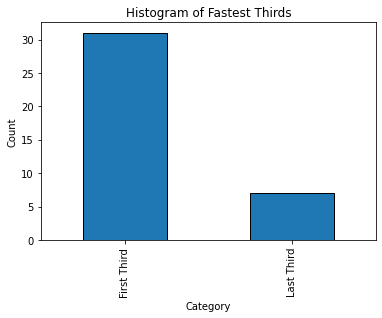

In [72]:
thirdIII23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 21-22**

In [73]:
thirdI22 = thirds(dI22)
thirdI22.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Matt Sates,Georgia,4:08.73,+0.1%,PB,22.35,25.28,25.49,25.82,25.89,25.63,24.42,24.47,24.86,24.52,76.59,75.94,73.85,Last Third
1,Jake Magahey,Georgia,4:09.22,+0.4%,SB,22.95,25.08,25.40,25.68,25.59,25.50,25.06,24.86,24.63,24.47,76.16,76.15,73.96,Last Third
2,Alfonso Mestre,Florida,4:09.74,+0.6%,PB,22.54,24.95,25.33,25.50,25.49,25.12,25.46,25.51,25.30,24.54,75.78,76.07,75.35,Last Third
3,Luke Hobson,Texas,4:10.38,-0.3%,,23.33,24.97,25.43,25.64,25.70,25.45,25.07,25.21,25.05,24.53,76.04,76.22,74.79,Last Third
4,Kieran Smith,Florida,4:10.53,-0.2%,,22.18,24.72,24.93,25.37,25.57,25.52,25.67,25.90,25.97,24.80,75.02,76.76,76.67,First Third


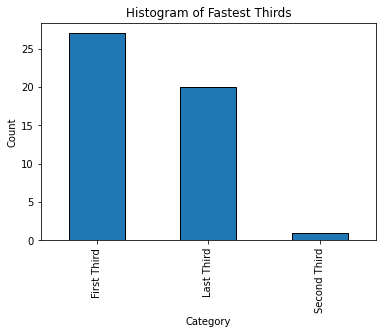

In [74]:
thirdI22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 21-22**

In [75]:
thirdII22 = thirds(dII22)
thirdII22.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Luca Alessandrini,Nova Southeastern,4:23.81,-1.3%,,24.04,26.03,26.49,26.58,26.83,26.95,26.85,26.89,27.14,26.01,79.10,80.63,80.04,First Third
1,Harold Lockhart,Rollins,4:23.84,-1.1%,,23.96,26.24,27.11,26.97,27.03,27.21,26.97,26.98,26.60,24.77,80.32,81.21,78.35,Last Third
2,Elder Oliveira,Florida Southern,4:24.08,-0.1%,,23.62,25.79,26.19,26.62,26.71,26.95,27.04,27.15,27.21,26.80,78.60,80.70,81.16,First Third
3,Miguel Marcos Bargueño,Wingate,4:24.15,+0.7%,PB,24.34,26.42,26.49,26.56,26.70,26.81,26.97,27.00,26.95,25.91,79.47,80.48,79.86,First Third
4,Luke ERWEE,Queens (NC),4:24.50,-0.5%,,23.66,26.17,25.99,26.11,26.29,26.88,27.01,27.69,27.81,26.89,78.27,80.18,82.39,First Third


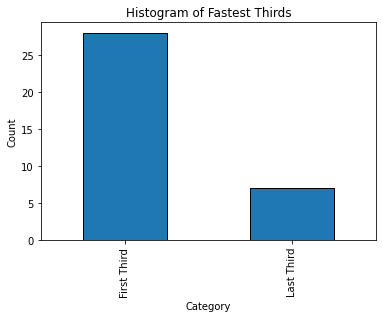

In [76]:
thirdII22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 21-22**

In [77]:
thirdIII22 = thirds(dIII22)
thirdIII22.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Mason Kelber,Washington (Mo),4:24.31,+0.3%,PB,23.74,25.69,26.02,26.53,26.49,26.92,26.96,27.51,27.51,26.94,78.24,80.37,81.96,First Third
1,Graham Chatoor,NYU,4:24.47,+0.1%,SB,24.23,26.01,26.27,26.78,26.69,26.94,26.99,27.08,26.97,26.51,79.06,80.62,80.56,First Third
2,Bryan Fitzgerald,Kenyon,4:24.88,+0.6%,PB,23.53,25.71,26.50,26.97,27.31,27.26,27.34,27.06,27.22,25.98,79.18,81.91,80.26,First Third
3,Kellen Roddy,Johns Hopkins,4:25.29,0.0%,,24.51,25.89,26.93,27.06,27.24,26.92,26.99,26.96,26.56,26.23,79.88,81.15,79.75,Last Third
4,Pat Pema,Emory,4:25.86,-1.0%,,23.23,25.64,25.78,26.16,26.63,27.07,27.42,27.90,27.90,28.13,77.58,81.12,83.93,First Third


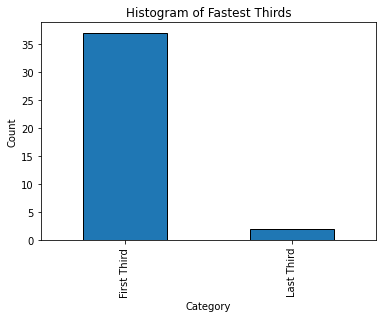

In [78]:
thirdIII22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 18-19**

In [79]:
thirdI19 = thirds(dI19)
thirdI19.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Townley Haas,Texas,4:11.01,+0.9%,SB,22.90,24.98,25.24,25.38,25.59,25.81,25.64,25.49,25.33,24.65,75.60,77.04,75.47,Last Third
1,Sean Grieshop,California,4:11.11,+1.4%,PB,23.17,25.18,25.27,25.38,25.33,25.69,25.39,25.57,25.34,24.79,75.83,76.41,75.70,Last Third
2,Brooks Fail,Arizona,4:11.51,+0.1%,PB,23.49,25.42,25.60,25.65,25.84,25.52,25.38,25.11,24.44,25.06,76.67,76.74,74.61,Last Third
3,Walker Higgins,Georgia,4:12.57,-0.1%,,22.76,24.46,25.00,25.63,26.18,25.91,25.78,25.93,25.62,25.30,75.09,77.87,76.85,First Third
4,Mark Theall,Texas A&M,4:12.70,+1.6%,PB,22.83,25.00,25.46,25.71,25.85,25.95,26.18,26.31,25.13,24.28,76.17,77.98,75.72,Last Third


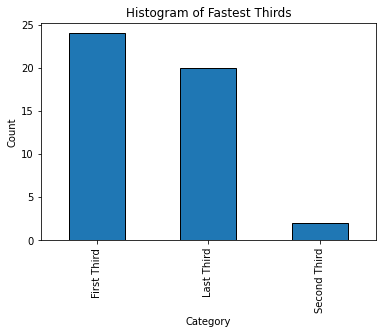

In [80]:
thirdI19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 18-19**

In [81]:
thirdII19 = thirds(dII19)
thirdII19.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Adrian VanderHelm,Simon Fraser,4:24.51,-0.8%,,23.75,26.71,27.20,27.78,26.99,27.08,26.57,26.56,26.50,25.37,81.69,80.64,78.43,Last Third
1,Luke ERWEE,Queens (NC),4:24.65,+0.3%,PB,23.65,26.56,27.35,27.20,27.04,27.06,26.65,26.93,26.84,25.37,81.11,80.75,79.14,Last Third
2,Ivan Kurakin,UC San Diego,4:25.16,+0.7%,SB,23.97,26.15,26.48,26.79,26.92,27.05,27.28,27.35,27.13,26.04,79.42,81.25,80.52,First Third
3,Adam Rosipal,Indianapolis,4:25.26,-1.5%,,24.67,26.45,26.50,26.68,27.14,27.25,27.24,26.86,26.64,25.83,79.63,81.63,79.33,Last Third
4,Alex SOBERS,Emmanuel,4:25.37,-2.3%,,23.37,25.56,26.21,27.10,26.87,27.27,27.47,27.51,27.54,26.47,78.87,81.61,81.52,First Third


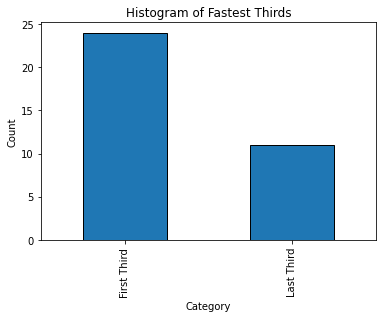

In [82]:
thirdII19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 18-19**

In [83]:
thirdIII19 = thirds(dIII19)
thirdIII19.head()

,Name,School,Time,Improvement,Best,50,100,150,200,250,300,350,400,450,500,First Third,Second Third,Last Third,Fastest
0,Bryan Fitzgerald,Kenyon,4:26.22,+1.0%,PB,23.46,26.16,27.36,27.35,27.41,27.27,27.25,27.13,26.93,25.90,80.87,81.93,79.96,Last Third
1,Tom Gordon,Emory,4:26.26,+0.6%,SB,24.33,26.56,27.09,27.30,27.14,27.34,27.16,26.95,26.61,25.78,80.95,81.64,79.34,Last Third
2,Matt Hedman,Denison,4:26.47,-0.1%,,24.28,26.26,26.67,26.82,26.96,27.17,27.22,27.20,27.42,26.47,79.75,81.35,81.09,First Third
3,Robert Williams,Kenyon,4:26.52,+0.4%,PB,24.02,26.41,26.90,27.42,27.44,27.64,27.51,27.39,26.22,25.57,80.73,82.59,79.18,Last Third
4,Jackson Karofsky,Williams,4:26.52,+0.4%,PB,24.40,26.49,26.97,27.01,27.31,26.82,27.06,27.22,26.84,26.51,80.47,81.19,80.57,First Third


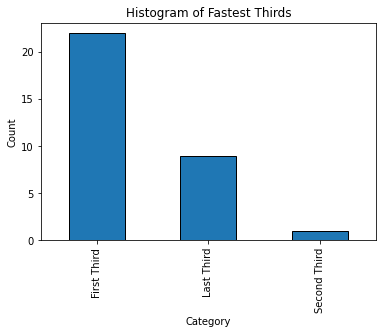

In [84]:
thirdIII19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Combine

**DI**

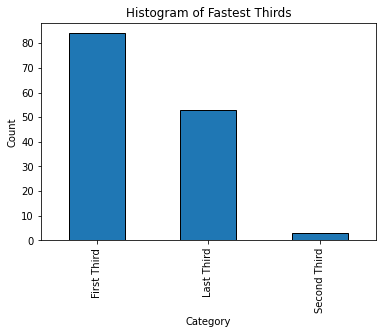

In [85]:
dI = pd.concat([thirdI23, thirdI22, thirdI19], axis=0)
dI.reset_index(drop=True, inplace=True)
dI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII**

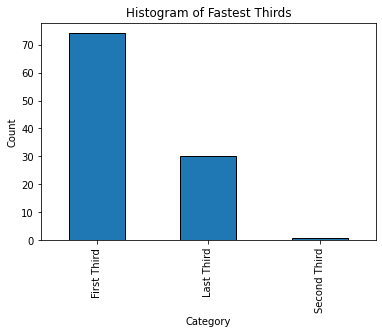

In [86]:
dII = pd.concat([thirdII23, thirdII22, thirdII19], axis=0)
dII.reset_index(drop=True, inplace=True)
dII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII**

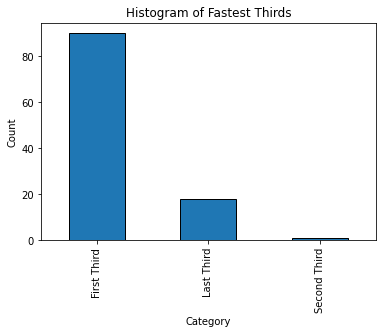

In [87]:
dIII = pd.concat([thirdIII23, thirdIII22, thirdIII19], axis=0)
dIII.reset_index(drop=True, inplace=True)
dIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Percentages

**DI**

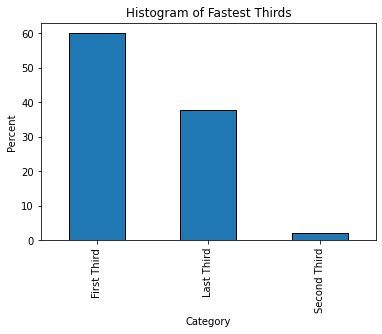

In [88]:
(dI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [89]:
dI_fastest = pd.DataFrame({'Count': dI['Fastest'].value_counts(), 
                           'Percentage': (dI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
dI_fastest

,Count,Percentage,Division
First Third,84,60.000000,DI
Last Third,53,37.857143,DI
Second Third,3,2.142857,DI


**DII**

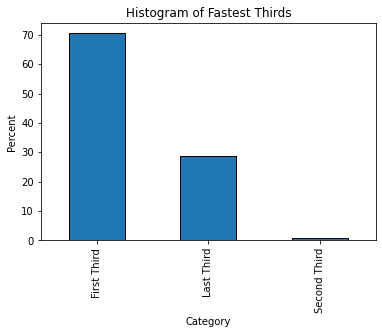

In [90]:
(dII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [91]:
dII_fastest = pd.DataFrame({'Count': dII['Fastest'].value_counts(), 
                           'Percentage': (dII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
dII_fastest

,Count,Percentage,Division
First Third,74,70.476190,DII
Last Third,30,28.571429,DII
Second Third,1,0.952381,DII


**DIII**

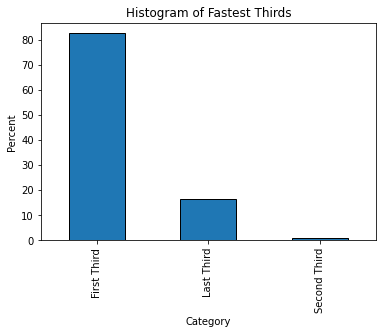

In [92]:
(dIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percent')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [93]:
dIII_fastest = pd.DataFrame({'Count': dIII['Fastest'].value_counts(), 
                           'Percentage': (dIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
dIII_fastest

,Count,Percentage,Division
First Third,90,82.568807,DIII
Last Third,18,16.513761,DIII
Second Third,1,0.917431,DIII


# How do they swim the race based on thirds in order? Counts

In [94]:
def swimming_order(dataframe):
    splits_order = []

    for index, row in dataframe.iterrows():
        if row['Fastest'] == 'First Third':
            if row['Second Third'] < row['Last Third']:
                splits_order.append('fsl')
            else:
                splits_order.append('fls')
        elif row['Fastest'] == 'Second Third':
            if row['First Third'] < row['Last Third']:
                splits_order.append('slf')
            else:
                splits_order.append('slf')
        else:
            if row['First Third'] < row['Second Third']:
                splits_order.append('lsf')
            else:
                splits_order.append('lfs')
    
    dataframe['swimming_order'] = splits_order

    return dataframe

**DI**

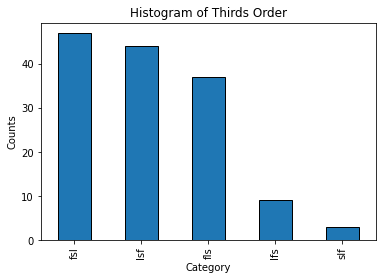

In [95]:
dI = swimming_order(dI)
dI['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Histogram of Thirds Order')
plt.show()

**DII**

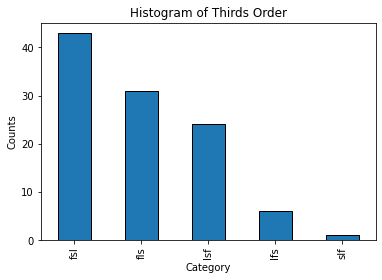

In [96]:
dII = swimming_order(dII)
dII['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Histogram of Thirds Order')
plt.show()

**DIII**

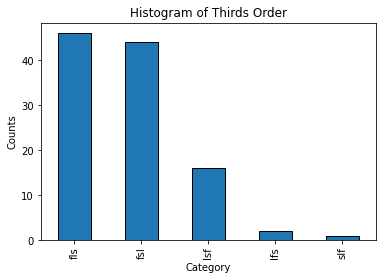

In [97]:
dIII = swimming_order(dIII)
dIII['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Histogram of Thirds Order')
plt.show()

# How do they swim their race based on thirds? Percentages

**DI**

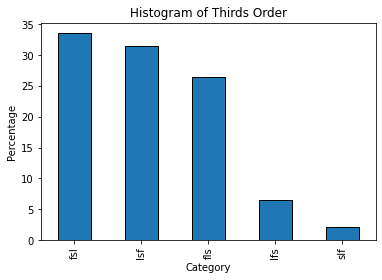

In [98]:
(dI['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [99]:
dI_swimming_order = pd.DataFrame({'Count': dI['swimming_order'].value_counts(), 
                           'Percentage': (dI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
dI_swimming_order

,Count,Percentage,Division
fsl,47,33.571429,DI
lsf,44,31.428571,DI
fls,37,26.428571,DI
lfs,9,6.428571,DI
slf,3,2.142857,DI


**DII**

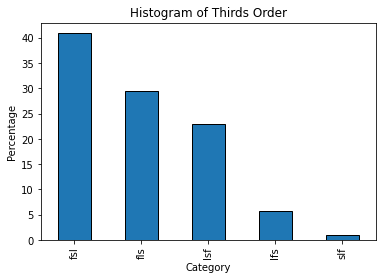

In [100]:
(dII['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [101]:
dII_swimming_order = pd.DataFrame({'Count': dII['swimming_order'].value_counts(), 
                           'Percentage': (dII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
dII_swimming_order

,Count,Percentage,Division
fsl,43,40.952381,DII
fls,31,29.523810,DII
lsf,24,22.857143,DII
lfs,6,5.714286,DII
slf,1,0.952381,DII


**DIII**

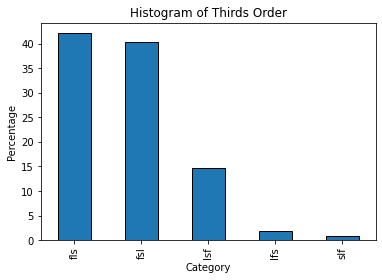

In [102]:
(dIII['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [103]:
dIII_swimming_order = pd.DataFrame({'Count': dIII['swimming_order'].value_counts(), 
                           'Percentage': (dIII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
dIII_swimming_order

,Count,Percentage,Division
fls,46,42.201835,DIII
fsl,44,40.366972,DIII
lsf,16,14.678899,DIII
lfs,2,1.834862,DIII
slf,1,0.917431,DIII


# Top 16 Counts

**DI 22-23**

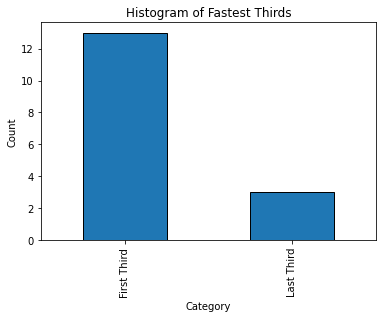

In [104]:
sixteendI23 = thirdI23.iloc[0:16]
sixteendI23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 22-23**

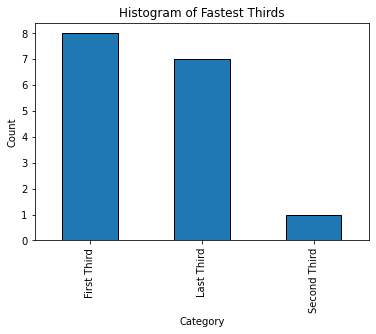

In [105]:
sixteendII23 = thirdII23.iloc[0:16]
sixteendII23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 22-23**

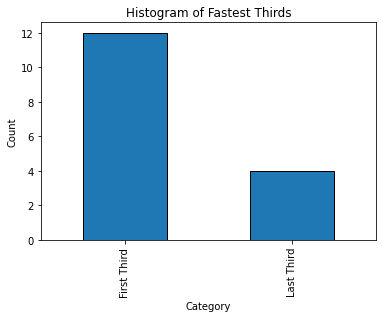

In [106]:
sixteendIII23 = thirdIII23.iloc[0:16]
sixteendIII23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 21-22**

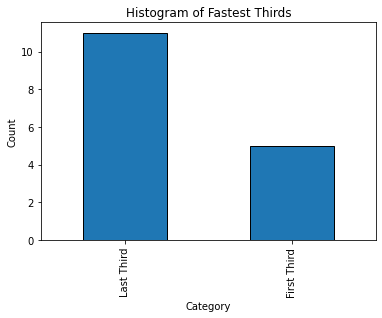

In [107]:
sixteendI22 = thirdI22.iloc[0:16]
sixteendI22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 21-22**

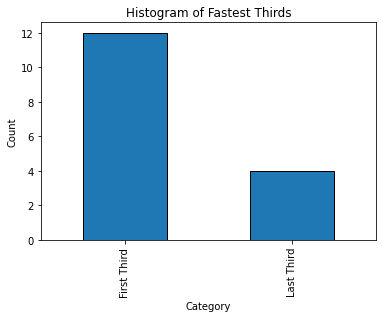

In [108]:
sixteendII22 = thirdII22.iloc[0:16]
sixteendII22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 21-22**

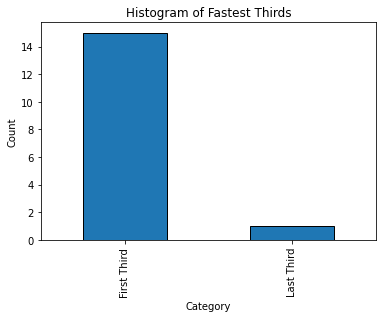

In [109]:
sixteendIII22 = thirdIII22.iloc[0:16]
sixteendIII22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 18-19**

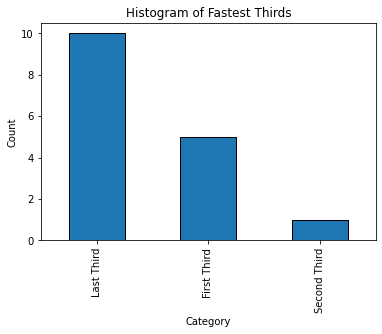

In [110]:
sixteendI19 = thirdI19.iloc[0:16]
sixteendI19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 18-19**

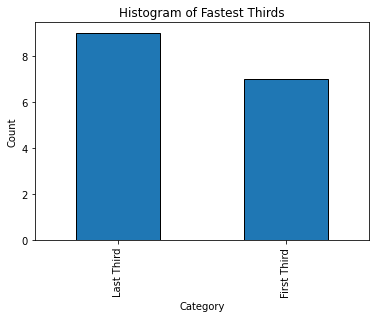

In [111]:
sixteendII19 = thirdII19.iloc[0:16]
sixteendII19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 18-19**

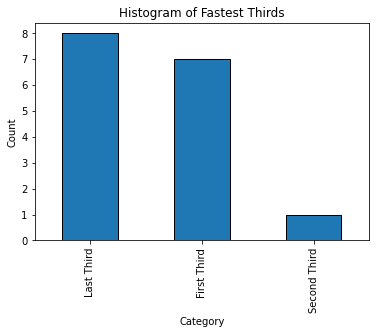

In [112]:
sixteendIII19 = thirdIII19.iloc[0:16]
sixteendIII19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Percentages Top 16

**DI 22-23**

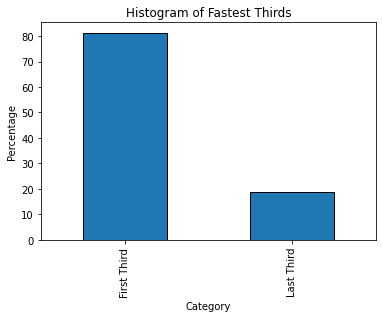

In [113]:
(sixteendI23['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 22-23**

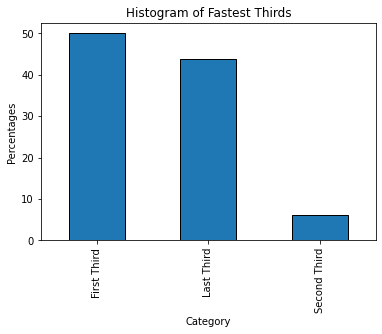

In [114]:
(sixteendII23['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 22-23**

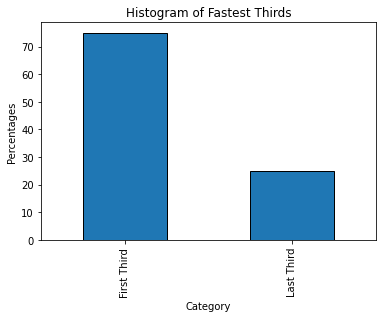

In [115]:
(sixteendIII23['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 21-22**

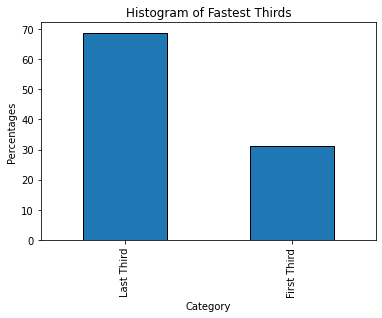

In [116]:
(sixteendI22['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 21-22**

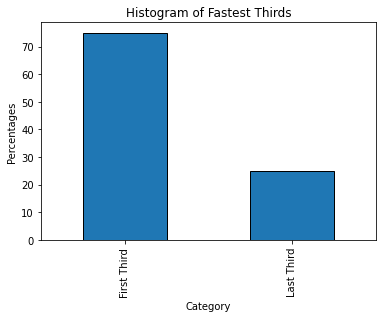

In [117]:
(sixteendII22['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 21-22**

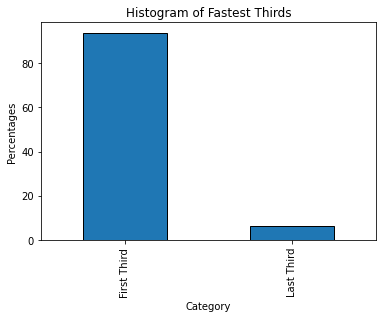

In [118]:
(sixteendIII22['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 18-19**

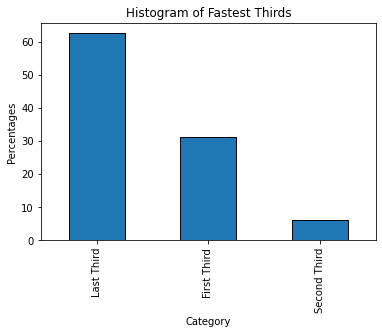

In [119]:
(sixteendI19['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 18-19**

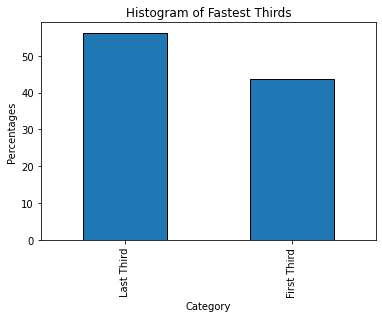

In [120]:
(sixteendII19['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 18-19**

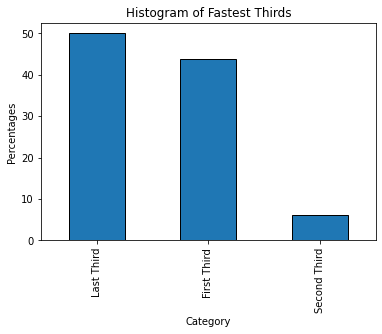

In [121]:
(sixteendIII19['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentages')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Combine Top 16 Percentages

**DI**

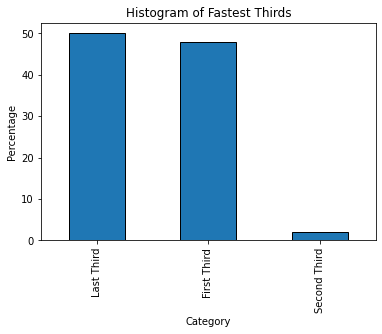

In [122]:
sixteendI = pd.concat([sixteendI23, sixteendI22, sixteendI19], axis=0)
sixteendI.reset_index(drop=True, inplace=True)
(sixteendI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII**

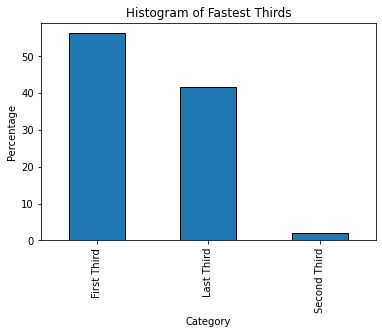

In [123]:
sixteendII = pd.concat([sixteendII23, sixteendII22, sixteendII19], axis=0)
sixteendII.reset_index(drop=True, inplace=True)
(sixteendII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII**

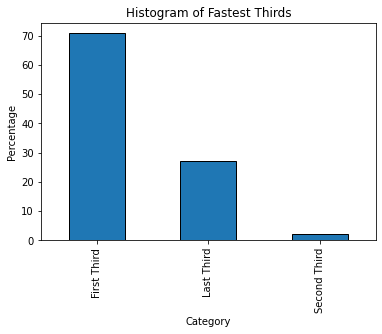

In [124]:
sixteendIII = pd.concat([sixteendIII23, sixteendIII22, sixteendIII19], axis=0)
sixteendIII.reset_index(drop=True, inplace=True)
(sixteendIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Combine Top 16 Counts

**DI**

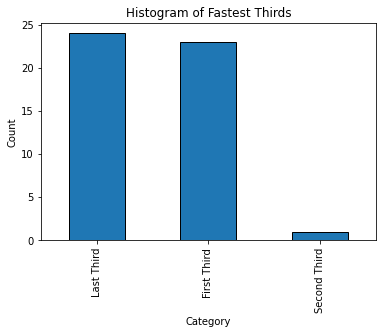

In [125]:
sixteendI = pd.concat([sixteendI23, sixteendI22, sixteendI19], axis=0)
sixteendI.reset_index(drop=True, inplace=True)
sixteendI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [126]:
sixteendI_fastest = pd.DataFrame({'Count': sixteendI['Fastest'].value_counts(), 
                           'Percentage': (sixteendI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
sixteendI_fastest

,Count,Percentage,Division
Last Third,24,50.000000,DI
First Third,23,47.916667,DI
Second Third,1,2.083333,DI


**DII**

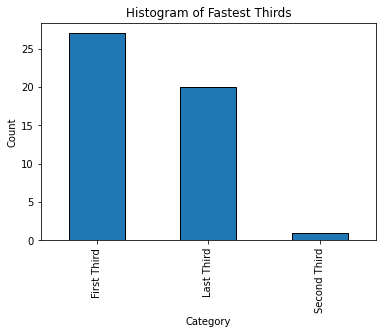

In [127]:
sixteendII = pd.concat([sixteendII23, sixteendII22, sixteendII19], axis=0)
sixteendII.reset_index(drop=True, inplace=True)
sixteendII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [128]:
sixteendII_fastest = pd.DataFrame({'Count': sixteendII['Fastest'].value_counts(), 
                           'Percentage': (sixteendII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
sixteendII_fastest

,Count,Percentage,Division
First Third,27,56.250000,DII
Last Third,20,41.666667,DII
Second Third,1,2.083333,DII


**DIII**

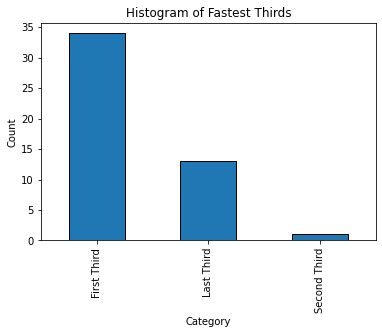

In [129]:
sixteendIII = pd.concat([sixteendIII23, sixteendIII22, sixteendIII19], axis=0)
sixteendIII.reset_index(drop=True, inplace=True)
sixteendIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [130]:
sixteendIII_fastest = pd.DataFrame({'Count': sixteendIII['Fastest'].value_counts(), 
                           'Percentage': (sixteendIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
sixteendIII_fastest

,Count,Percentage,Division
First Third,34,70.833333,DIII
Last Third,13,27.083333,DIII
Second Third,1,2.083333,DIII


# Top 16 Time Differences

**DI**

In [131]:
sixteendI_diff = diffSplits(sixteendI)
sixteendI_diff.describe()

,100,150,200,250,300,350,400,450,500
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.016667,0.327083,0.178125,0.070625,-0.014792,-0.032917,-0.024375,-0.090208,-0.481042
std,0.287419,0.218242,0.182520,0.189191,0.215525,0.296289,0.253754,0.343452,0.443292
min,1.470000,-0.310000,-0.340000,-0.520000,-0.770000,-1.210000,-0.760000,-1.180000,-1.660000
25%,1.817500,0.187500,0.057500,-0.030000,-0.147500,-0.175000,-0.240000,-0.272500,-0.700000
50%,2.010000,0.325000,0.165000,0.070000,-0.020000,0.005000,0.035000,-0.100000,-0.505000
75%,2.132500,0.470000,0.300000,0.182500,0.145000,0.180000,0.152500,0.152500,-0.242500
max,2.930000,0.730000,0.630000,0.550000,0.360000,0.550000,0.450000,0.660000,0.620000


**DII**

In [132]:
sixteendII_diff = diffSplits(sixteendII)
sixteendII_diff.describe()

,100,150,200,250,300,350,400,450,500
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.182729,0.427063,0.198542,0.053958,0.017917,-0.000625,0.091250,-0.062292,-0.819792
std,0.382358,0.251123,0.235562,0.235098,0.227829,0.295047,0.230639,0.303197,0.410715
min,1.470000,-0.180000,-0.300000,-0.790000,-0.870000,-1.020000,-0.500000,-0.810000,-1.830000
25%,1.947500,0.280000,0.040000,-0.060000,-0.045000,-0.102500,-0.012500,-0.235000,-1.062500
50%,2.160000,0.435000,0.200000,0.090000,0.050000,0.005000,0.090000,-0.015000,-0.850000
75%,2.440000,0.525000,0.317500,0.180000,0.122500,0.177500,0.190000,0.102500,-0.570000
max,3.330000,1.270000,0.890000,0.610000,0.590000,0.590000,0.730000,0.580000,0.390000


**DIII**

In [133]:
sixteendIII_diff = diffSplits(sixteendIII)
sixteendIII_diff.describe()

,100,150,200,250,300,350,400,450,500
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,2.253750,0.450000,0.216042,0.164167,0.006042,0.013542,0.065000,-0.092083,-0.639167
std,0.379438,0.297371,0.193245,0.237664,0.262344,0.277454,0.297271,0.303287,0.540862
min,1.380000,-0.440000,-0.230000,-0.430000,-0.650000,-0.880000,-0.750000,-1.170000,-2.130000
25%,1.995000,0.300000,0.067500,0.015000,-0.122500,-0.140000,-0.120000,-0.290000,-1.032500
50%,2.225000,0.485000,0.245000,0.170000,0.085000,0.005000,0.070000,-0.070000,-0.580000
75%,2.427500,0.607500,0.370000,0.272500,0.200000,0.162500,0.210000,0.102500,-0.327500
max,3.180000,1.200000,0.580000,1.000000,0.440000,0.610000,0.880000,0.730000,0.530000


# How do top 16 swim their race based on thirds? Counts

**DI**

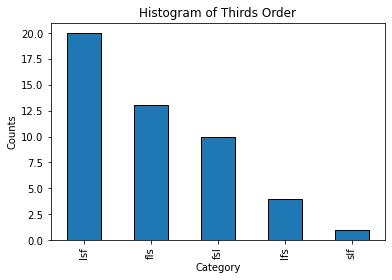

In [134]:
sixteendI = swimming_order(sixteendI)
sixteendI['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Histogram of Thirds Order')
plt.show()

**DII**

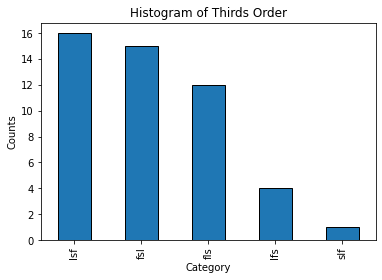

In [135]:
sixteendII = swimming_order(sixteendII)
sixteendII['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Histogram of Thirds Order')
plt.show()

**DIII**

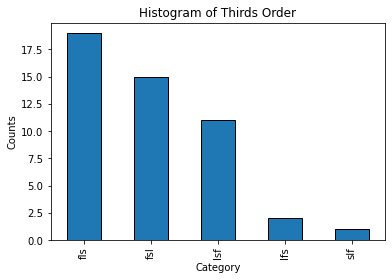

In [136]:
sixteendIII = swimming_order(sixteendIII)
sixteendIII['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Counts')
plt.title('Histogram of Thirds Order')
plt.show()

# How do the top 16 swim their race based on thirds? Percentage

**DI**

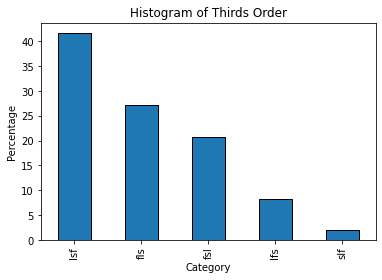

In [137]:
(sixteendI['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [138]:
sixteendI_swimming_order = pd.DataFrame({'Count': sixteendI['swimming_order'].value_counts(), 
                           'Percentage': (sixteendI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
sixteendI_swimming_order

,Count,Percentage,Division
lsf,20,41.666667,DI
fls,13,27.083333,DI
fsl,10,20.833333,DI
lfs,4,8.333333,DI
slf,1,2.083333,DI


**DII**

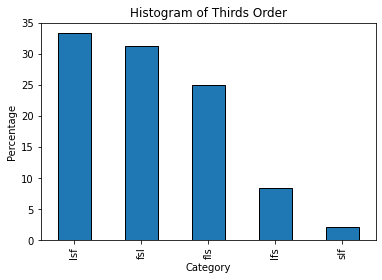

In [139]:
(sixteendII['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [140]:
sixteendII_swimming_order = pd.DataFrame({'Count': sixteendII['swimming_order'].value_counts(), 
                           'Percentage': (sixteendII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
sixteendII_swimming_order

,Count,Percentage,Division
lsf,16,33.333333,DII
fsl,15,31.250000,DII
fls,12,25.000000,DII
lfs,4,8.333333,DII
slf,1,2.083333,DII


**DIII**

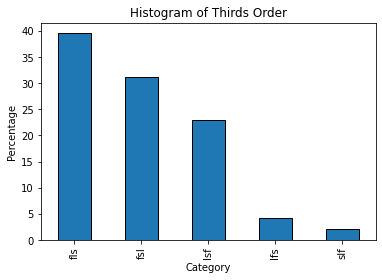

In [141]:
(sixteendIII['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [142]:
sixteendIII_swimming_order = pd.DataFrame({'Count': sixteendIII['swimming_order'].value_counts(), 
                           'Percentage': (sixteendIII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
sixteendIII_swimming_order

,Count,Percentage,Division
fls,19,39.583333,DIII
fsl,15,31.250000,DIII
lsf,11,22.916667,DIII
lfs,2,4.166667,DIII
slf,1,2.083333,DIII


# Non-16 Count

**DI 22-23**

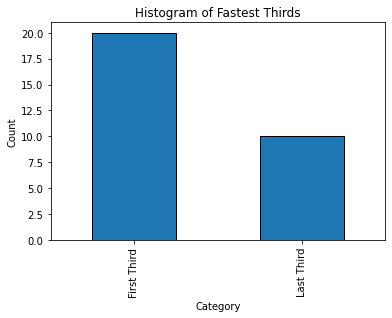

In [143]:
lastdI23 = thirdI23.iloc[16:]
lastdI23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 22-23**

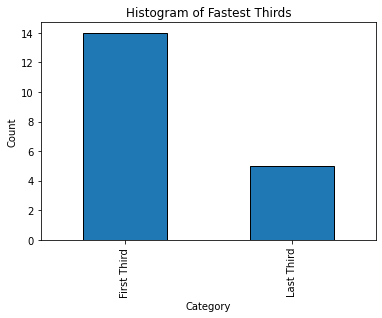

In [144]:
lastdII23 = thirdII23.iloc[16:]
lastdII23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 22-23**

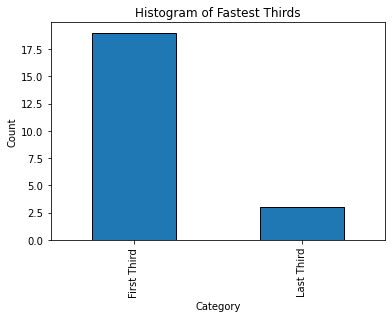

In [145]:
lastdIII23 = thirdIII23.iloc[16:]
lastdIII23['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 21-22**

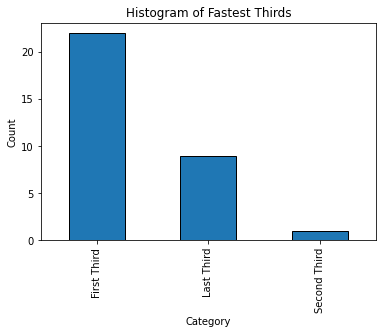

In [146]:
lastdI22 = thirdI22.iloc[16:]
lastdI22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 21-22**

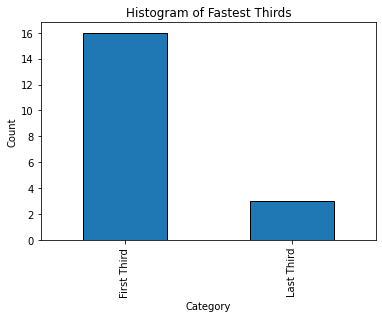

In [147]:
lastdII22 = thirdII22.iloc[16:]
lastdII22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 21-22**

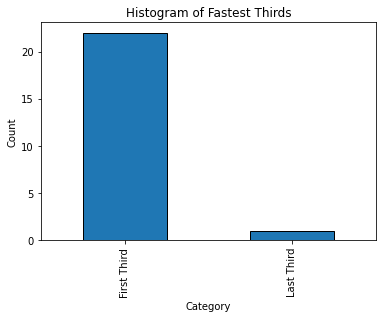

In [148]:
lastdIII22 = thirdIII22.iloc[16:]
lastdIII22['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 18-19**

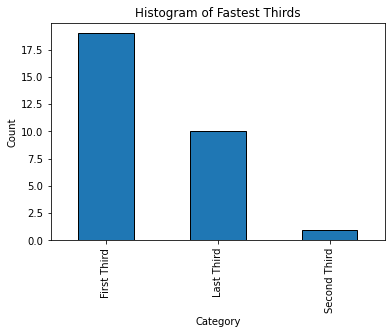

In [149]:
lastdI19 = thirdI19.iloc[16:]
lastdI19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 18-19**

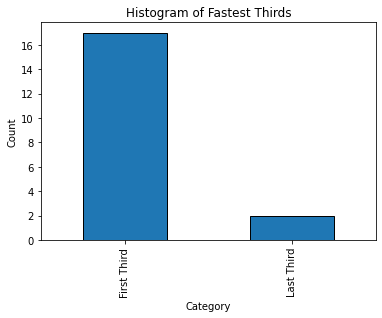

In [150]:
lastdII19 = thirdII19.iloc[16:]
lastdII19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 18-19**

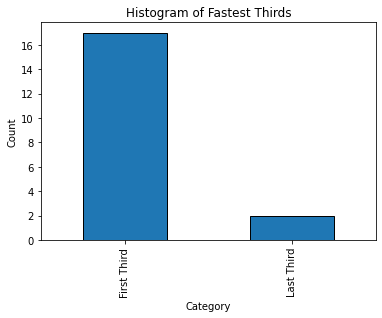

In [151]:
lastdIII19 = thirdII19.iloc[16:]
lastdIII19['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Non-16 Percentages

**DI 22-23**

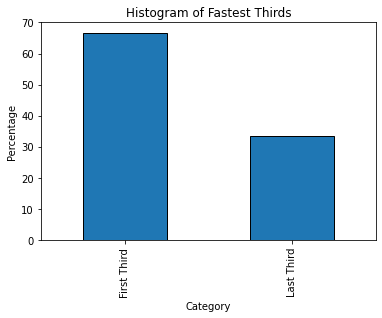

In [152]:
(lastdI23['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 22-23**

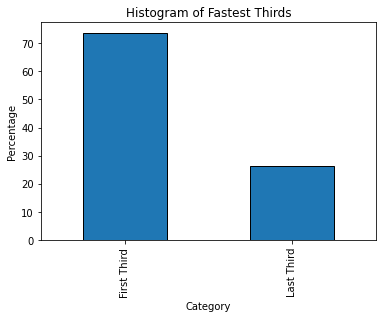

In [153]:
(lastdII23['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 22-23**

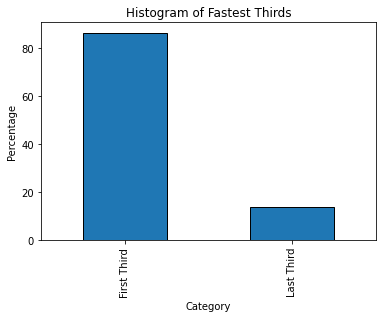

In [154]:
(lastdIII23['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 21-22**

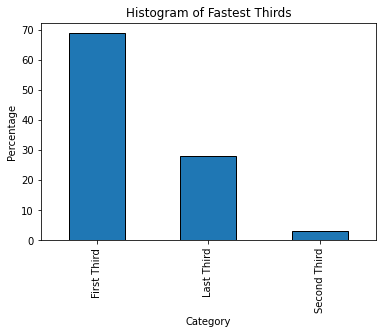

In [155]:
(lastdI22['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 21-22**

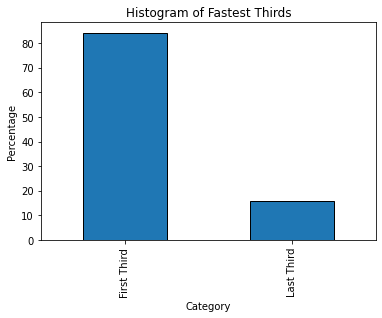

In [156]:
(lastdII22['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 21-22**

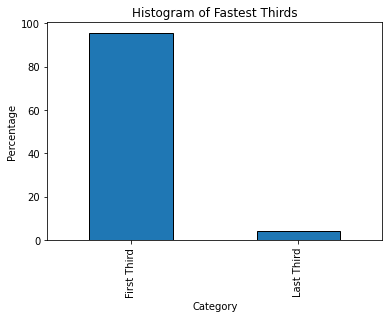

In [157]:
(lastdIII22['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DI 18-19**

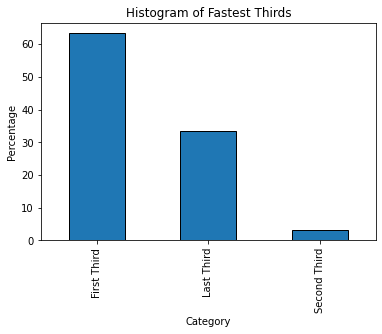

In [158]:
(lastdI19['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII 18-19**

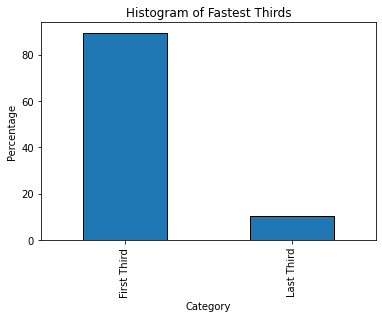

In [159]:
(lastdII19['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII 18-19**

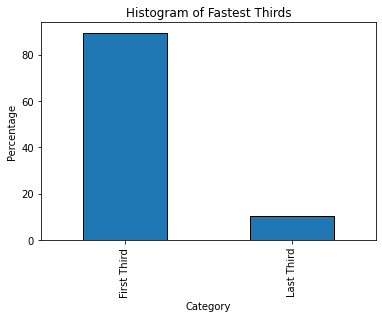

In [160]:
(lastdIII19['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Combine Non-16 Counts

**DI**

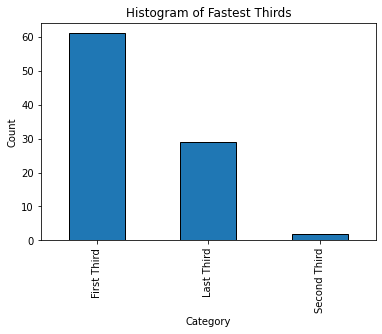

In [161]:
lastdI = pd.concat([lastdI23, lastdI22, lastdI19], axis=0)
lastdI.reset_index(drop=True, inplace=True)
lastdI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DII**

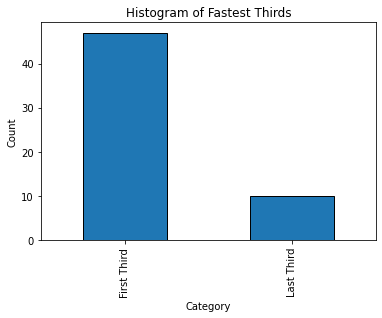

In [162]:
lastdII = pd.concat([lastdII23, lastdII22, lastdII19], axis=0)
lastdII.reset_index(drop=True, inplace=True)
lastdII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

**DIII**

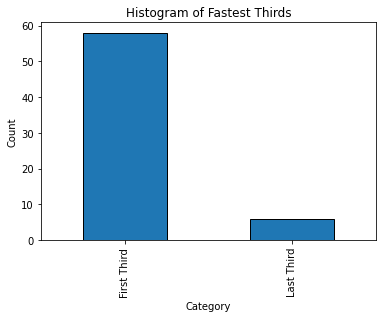

In [163]:
lastdIII = pd.concat([lastdIII23, lastdIII22, lastdIII19], axis=0)
lastdIII.reset_index(drop=True, inplace=True)
lastdIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

# Combine Non-16 Percentage

**DI**

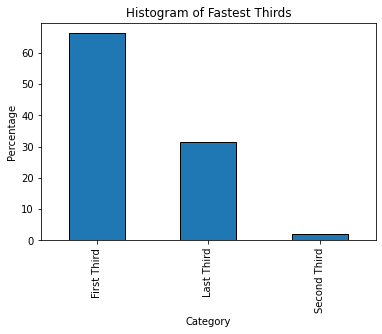

In [164]:
lastdI = pd.concat([lastdI23, lastdI22, lastdI19], axis=0)
lastdI.reset_index(drop=True, inplace=True)
(lastdI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [165]:
lastdI_fastest = pd.DataFrame({'Count': lastdI['Fastest'].value_counts(), 
                           'Percentage': (lastdI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
lastdI_fastest

,Count,Percentage,Division
First Third,61,66.304348,DI
Last Third,29,31.521739,DI
Second Third,2,2.173913,DI


**DII**

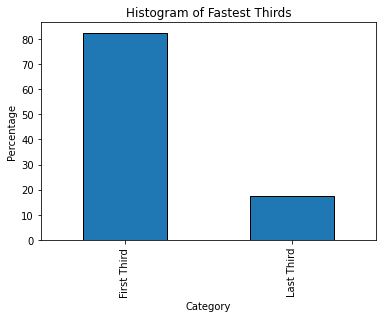

In [166]:
lastdII = pd.concat([lastdII23, lastdII22, lastdII19], axis=0)
lastdII.reset_index(drop=True, inplace=True)
(lastdII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [167]:
lastdII_fastest = pd.DataFrame({'Count': lastdII['Fastest'].value_counts(), 
                           'Percentage': (lastdII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
lastdII_fastest

,Count,Percentage,Division
First Third,47,82.45614,DII
Last Third,10,17.54386,DII


**DIII**

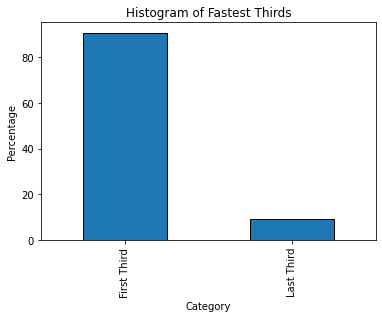

In [168]:
lastdIII = pd.concat([lastdIII23, lastdIII22, lastdIII19], axis=0)
lastdIII.reset_index(drop=True, inplace=True)
(lastdIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [169]:
lastdIII_fastest = pd.DataFrame({'Count': lastdIII['Fastest'].value_counts(), 
                           'Percentage': (lastdIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
lastdIII_fastest

,Count,Percentage,Division
First Third,58,90.625,DIII
Last Third,6,9.375,DIII


# Split Differences Non-16

**DI**

In [170]:
lastdI_diff = diffSplits(lastdI)
lastdI_diff.describe()

,100,150,200,250,300,350,400,450,500
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000
mean,1.991630,0.340652,0.192826,0.099674,0.044565,0.063804,0.097283,-6.847826e-03,-0.636304
std,0.296267,0.193424,0.192407,0.180088,0.230929,0.187902,0.230571,3.428290e-01,0.394004
min,1.220000,-0.070000,-0.330000,-0.470000,-0.750000,-0.490000,-0.450000,-1.900000e+00,-1.760000
25%,1.797500,0.207500,0.040000,-0.030000,-0.072500,-0.062500,-0.070000,-1.825000e-01,-0.900000
50%,1.975000,0.335000,0.210000,0.085000,0.095000,0.080000,0.080000,1.776357e-15,-0.600000
75%,2.180000,0.462500,0.317500,0.222500,0.172500,0.185000,0.232500,1.825000e-01,-0.410000
max,2.900000,0.840000,0.580000,0.730000,0.520000,0.500000,0.910000,6.800000e-01,0.830000


**DII**

In [171]:
lastdII_diff = diffSplits(lastdII)
lastdII_diff.describe()

,100,150,200,250,300,350,400,450,500
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,2.265263,0.504035,0.340351,0.099649,0.158947,0.193333,0.210702,-0.058772,-0.834912
std,0.356807,0.247501,0.244606,0.246714,0.323429,0.282744,0.279533,0.397636,0.584930
min,1.680000,-0.160000,-0.160000,-0.580000,-0.790000,-0.450000,-0.430000,-1.100000,-2.340000
25%,2.000000,0.320000,0.210000,-0.050000,0.020000,-0.020000,0.010000,-0.310000,-1.050000
50%,2.190000,0.490000,0.360000,0.090000,0.150000,0.210000,0.170000,-0.070000,-0.820000
75%,2.500000,0.660000,0.470000,0.280000,0.340000,0.360000,0.360000,0.160000,-0.460000
max,3.320000,1.260000,1.030000,0.740000,1.110000,0.860000,1.150000,0.910000,0.370000


**DIII**

In [172]:
lastdIII_diff = diffSplits(lastdIII)
lastdIII_diff.describe()

,100,150,200,250,300,350,400,450,500
count,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000
mean,2.257812,0.504844,0.347500,0.196875,0.12500,0.165312,0.153281,-0.089688,-0.654844
std,0.338730,0.268417,0.288483,0.231008,0.24389,0.275283,0.269774,0.375385,0.489716
min,1.570000,-0.320000,-0.250000,-0.240000,-0.57000,-0.830000,-0.310000,-1.150000,-1.820000
25%,2.025000,0.332500,0.147500,0.017500,-0.01250,0.007500,-0.002500,-0.222500,-0.915000
50%,2.205000,0.530000,0.340000,0.170000,0.13000,0.160000,0.145000,-0.050000,-0.630000
75%,2.485000,0.660000,0.527500,0.380000,0.22500,0.300000,0.255000,0.137500,-0.382500
max,3.320000,1.000000,1.080000,0.740000,1.11000,0.800000,1.150000,0.690000,0.520000


# How do the non-16 swim their race based on thirds? Counts

**DI**

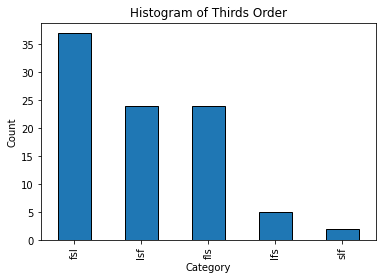

In [173]:
lastdI = swimming_order(lastdI)
lastdI['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Thirds Order')
plt.show()

**DII**

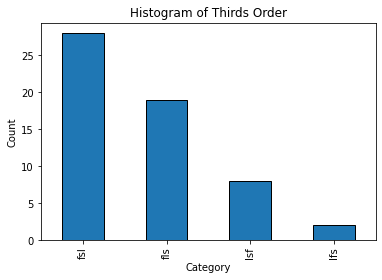

In [174]:
lastdII = swimming_order(lastdII)
lastdII['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Thirds Order')
plt.show()

**DIII**

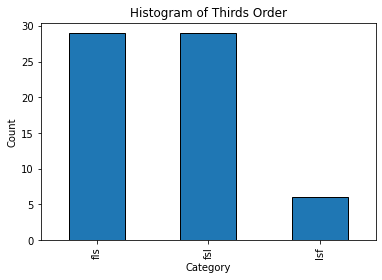

In [175]:
lastdIII = swimming_order(lastdIII)
lastdIII['swimming_order'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Thirds Order')
plt.show()

# How do non-16 swimmers swim their race based on thirds? Percentages

**DI**

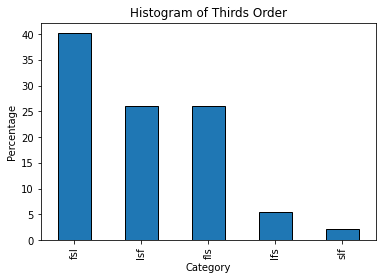

In [176]:
(lastdI['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Thirds Order')
plt.show()

In [177]:
lastdI_swimming_order = pd.DataFrame({'Count': lastdI['swimming_order'].value_counts(), 
                           'Percentage': (lastdI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
lastdI_swimming_order

,Count,Percentage,Division
fsl,37,40.217391,DI
lsf,24,26.086957,DI
fls,24,26.086957,DI
lfs,5,5.434783,DI
slf,2,2.173913,DI


**DII**

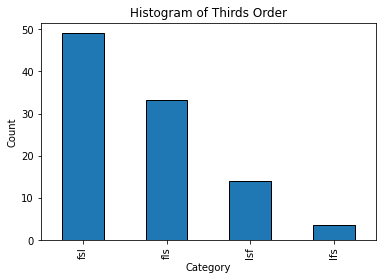

In [178]:
(lastdII['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Thirds Order')
plt.show()

In [179]:
lastdII_swimming_order = pd.DataFrame({'Count': lastdII['swimming_order'].value_counts(), 
                           'Percentage': (lastdII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
lastdII_swimming_order

,Count,Percentage,Division
fsl,28,49.122807,DII
fls,19,33.333333,DII
lsf,8,14.035088,DII
lfs,2,3.508772,DII


**DIII**

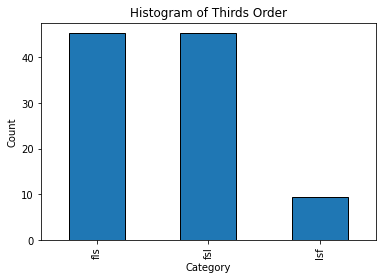

In [180]:
(lastdIII['swimming_order'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Thirds Order')
plt.show()

In [181]:
lastdIII_swimming_order = pd.DataFrame({'Count': lastdIII['swimming_order'].value_counts(), 
                           'Percentage': (lastdIII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
lastdIII_swimming_order

,Count,Percentage,Division
fls,29,45.3125,DIII
fsl,29,45.3125,DIII
lsf,6,9.3750,DIII


# Improvement Whole Division

In [182]:
def improvementFloat(df):
    # Remove rows with an en dash in the 'Improvement' column
    df = df[df['Improvement'] != '–']
    # Remove rows with NaN values in the 'Improvement' column
    df = df.dropna(subset=['Improvement'])
    # Reset the DataFrame index
    df = df.reset_index(drop=True)
    df['Improvement'] = df['Improvement'].str.replace('[+%]', '', regex=True).astype(float)
    return df

**DI**

In [183]:
float_dI = improvementFloat(dI)
improved_dI = float_dI[float_dI['Improvement']>0]
improved_dI = improved_dI.reset_index(drop=True)
improved_dI_fastest = pd.DataFrame({'Count': improved_dI['Fastest'].value_counts(), 
                           'Percentage': (improved_dI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
improved_dI_fastest

,Count,Percentage,Division
Last Third,21,52.5,DI
First Third,18,45.0,DI
Second Third,1,2.5,DI


In [184]:
improved_diff_dI = diffSplits(improved_dI)
improved_diff_dI.describe()

,100,150,200,250,300,350,400,450,500
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.021000,0.318500,0.162750,0.112000,0.007500,-0.024500,-0.030500,-0.077000,-0.663750
std,0.274701,0.195245,0.176896,0.190009,0.203605,0.286553,0.172997,0.308788,0.468356
min,1.430000,-0.070000,-0.160000,-0.470000,-0.610000,-1.210000,-0.360000,-1.180000,-1.760000
25%,1.905000,0.187500,0.030000,-0.027500,-0.082500,-0.117500,-0.157500,-0.262500,-0.805000
50%,2.005000,0.310000,0.150000,0.130000,0.015000,0.020000,-0.010000,-0.045000,-0.645000
75%,2.140000,0.440000,0.282500,0.222500,0.122500,0.147500,0.082500,0.147500,-0.405000
max,2.930000,0.730000,0.580000,0.490000,0.360000,0.420000,0.280000,0.390000,0.620000


**DII**

In [185]:
float_dII = improvementFloat(dII)
improved_dII = float_dII[float_dII['Improvement']>0]
improved_dII = improved_dII.reset_index(drop=True)
improved_dII_fastest = pd.DataFrame({'Count': improved_dII['Fastest'].value_counts(), 
                           'Percentage': (improved_dII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
improved_dII_fastest

,Count,Percentage,Division
First Third,17,56.666667,DII
Last Third,13,43.333333,DII


In [186]:
improved_diff_dII = diffSplits(improved_dII)
improved_diff_dII.describe()

,100,150,200,250,300,350,400,450,500
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.178367,0.504967,0.200667,0.013000,0.014667,-0.017333,0.069667,-0.076000,-0.757000
std,0.379680,0.306102,0.223652,0.209468,0.228484,0.335877,0.170708,0.386484,0.513454
min,1.470000,0.020000,-0.250000,-0.580000,-0.790000,-1.020000,-0.200000,-1.100000,-1.770000
25%,1.980000,0.282500,0.047500,-0.077500,-0.035000,-0.100000,-0.015000,-0.227500,-1.030000
50%,2.115000,0.460000,0.220000,0.005000,0.045000,0.005000,0.060000,0.020000,-0.805000
75%,2.485000,0.685000,0.317500,0.137500,0.145000,0.200000,0.160000,0.182500,-0.415000
max,2.910000,1.270000,0.740000,0.440000,0.480000,0.490000,0.510000,0.540000,0.390000


**DIII**

In [187]:
float_dIII = improvementFloat(dIII)
improved_dIII = float_dIII[float_dIII['Improvement']>0]
improved_dIII = improved_dIII.reset_index(drop=True)
improved_dIII_fastest = pd.DataFrame({'Count': improved_dIII['Fastest'].value_counts(), 
                           'Percentage': (improved_dIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
improved_dIII_fastest

,Count,Percentage,Division
First Third,19,70.370370,DIII
Last Third,7,25.925926,DIII
Second Third,1,3.703704,DIII


In [188]:
improved_diff_dIII = diffSplits(improved_dIII)
improved_diff_dIII.describe()

,100,150,200,250,300,350,400,450,500
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.00000,27.000000,27.000000,27.000000
mean,2.213333,0.423333,0.231852,0.102222,0.023704,0.08963,-0.001481,-0.074074,-0.658519
std,0.257757,0.304454,0.266083,0.190976,0.258771,0.22806,0.227726,0.333516,0.428941
min,1.620000,-0.260000,-0.230000,-0.170000,-0.650000,-0.23000,-0.500000,-1.170000,-1.240000
25%,2.050000,0.205000,0.025000,-0.055000,-0.080000,-0.08000,-0.150000,-0.210000,-1.025000
50%,2.200000,0.460000,0.210000,0.040000,0.010000,0.05000,0.000000,-0.020000,-0.630000
75%,2.375000,0.620000,0.435000,0.255000,0.200000,0.20500,0.115000,0.095000,-0.400000
max,2.790000,1.200000,0.840000,0.500000,0.430000,0.56000,0.550000,0.730000,0.250000


# Unimproved Whole Division

**DI**

In [189]:
unimproved_dI = float_dI[float_dI['Improvement']<0]
unimproved_dI = unimproved_dI.reset_index(drop=True)
unimproved_dI_fastest = pd.DataFrame({'Count': unimproved_dI['Fastest'].value_counts(), 
                           'Percentage': (unimproved_dI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
unimproved_dI_fastest

,Count,Percentage,Division
First Third,65,65.656566,DI
Last Third,32,32.323232,DI
Second Third,2,2.020202,DI


In [190]:
unimproved_diff_dI = diffSplits(unimproved_dI)
unimproved_diff_dI.describe()

,100,150,200,250,300,350,400,450,500
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1.986970,0.346162,0.203232,0.080303,0.028182,0.051414,0.094444,-0.017677,-0.557980
std,0.297645,0.203192,0.186092,0.181319,0.235642,0.208126,0.258596,0.359006,0.387209
min,1.220000,-0.310000,-0.330000,-0.520000,-0.770000,-0.530000,-0.760000,-1.900000,-1.340000
25%,1.795000,0.210000,0.070000,-0.030000,-0.110000,-0.075000,-0.070000,-0.195000,-0.795000
50%,1.990000,0.340000,0.210000,0.070000,0.090000,0.080000,0.130000,0.020000,-0.550000
75%,2.160000,0.480000,0.340000,0.180000,0.165000,0.190000,0.245000,0.175000,-0.345000
max,2.900000,0.840000,0.630000,0.730000,0.520000,0.550000,0.910000,0.680000,0.830000


**DII**

In [191]:
unimproved_dII = float_dII[float_dII['Improvement']<0]
unimproved_dII = unimproved_dII.reset_index(drop=True)
unimproved_dII_fastest = pd.DataFrame({'Count': unimproved_dII['Fastest'].value_counts(), 
                           'Percentage': (unimproved_dII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
unimproved_dII_fastest

,Count,Percentage,Division
First Third,56,75.675676,DII
Last Third,17,22.972973,DII
Second Third,1,1.351351,DII


In [192]:
unimproved_diff_dII = diffSplits(unimproved_dII)
unimproved_diff_dII.describe()

,100,150,200,250,300,350,400,450,500
count,74.000000,74.000000,74.000000,74.00000,74.00000,74.000000,74.000000,74.000000,74.000000
mean,2.242703,0.456757,0.305541,0.10473,0.12500,0.156757,0.191486,-0.053784,-0.845135
std,0.366095,0.226523,0.256334,0.25119,0.31018,0.276768,0.288718,0.347845,0.503860
min,1.640000,-0.180000,-0.300000,-0.79000,-0.87000,-0.510000,-0.500000,-0.850000,-2.340000
25%,1.995000,0.312500,0.112500,-0.04500,0.00000,-0.045000,0.010000,-0.277500,-1.057500
50%,2.185000,0.460000,0.335000,0.11000,0.11000,0.160000,0.165000,-0.055000,-0.820000
75%,2.492500,0.560000,0.467500,0.26000,0.26000,0.307500,0.350000,0.100000,-0.532500
max,3.330000,0.940000,1.030000,0.74000,1.11000,0.860000,1.150000,0.910000,0.370000


**DIII**

In [193]:
unimproved_dIII = float_dIII[float_dIII['Improvement']<0]
unimproved_dIII = unimproved_dIII.reset_index(drop=True)
unimproved_dIII_fastest = pd.DataFrame({'Count': unimproved_dIII['Fastest'].value_counts(), 
                           'Percentage': (unimproved_dIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
unimproved_dIII_fastest

,Count,Percentage,Division
First Third,64,86.486486,DIII
Last Third,10,13.513514,DIII


In [194]:
unimproved_diff_dIII = diffSplits(unimproved_dIII)
unimproved_diff_dIII.describe()

,100,150,200,250,300,350,400,450,500
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,2.294054,0.510000,0.290135,0.221216,0.065676,0.064865,0.181486,-0.103649,-0.607297
std,0.363521,0.265191,0.264313,0.234772,0.246121,0.303163,0.282473,0.403276,0.506693
min,1.570000,-0.440000,-0.270000,-0.430000,-0.610000,-0.880000,-0.370000,-1.320000,-2.130000
25%,2.010000,0.352500,0.125000,0.080000,-0.077500,-0.040000,0.005000,-0.262500,-0.935000
50%,2.275000,0.540000,0.320000,0.195000,0.110000,0.070000,0.160000,-0.060000,-0.560000
75%,2.550000,0.647500,0.455000,0.377500,0.210000,0.247500,0.317500,0.130000,-0.340000
max,3.180000,1.040000,1.080000,1.000000,0.730000,0.700000,0.950000,0.980000,0.530000


# Improvement Top 16 Counts

**DI**

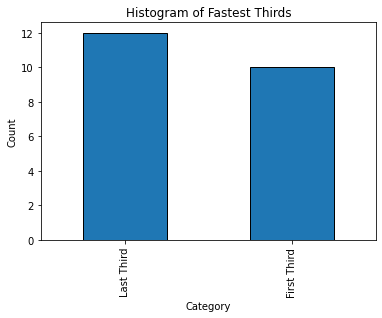

In [195]:
sixteenFloatdI = improvementFloat(sixteendI)
improvedSixteendI = sixteenFloatdI[sixteenFloatdI['Improvement'] > 0]
improvedSixteendI = improvedSixteendI.reset_index(drop=True)
improvedSixteendI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [196]:
improvedSixteendI.shape[0]

22

**DII**

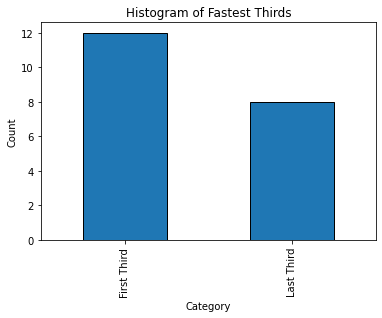

In [197]:
sixteenFloatdII = improvementFloat(sixteendII)
improvedSixteendII = sixteenFloatdII[sixteenFloatdII['Improvement'] > 0]
improvedSixteendII = improvedSixteendII.reset_index(drop=True)
improvedSixteendII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [198]:
improvedSixteendII.shape[0]

20

**DIII**

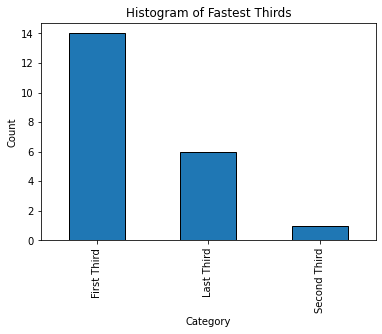

In [199]:
sixteenFloatdIII = improvementFloat(sixteendIII)
improvedSixteendIII = sixteenFloatdIII[sixteenFloatdIII['Improvement'] > 0]
improvedSixteendIII = improvedSixteendIII.reset_index(drop=True)
improvedSixteendIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [200]:
improvedSixteendIII.shape[0]

21

# Improvement Top 16 Percentages

**DI**

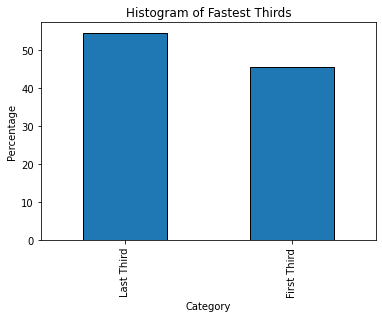

In [201]:
(improvedSixteendI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [202]:
improvedSixteendI_fastest = pd.DataFrame({'Count': improvedSixteendI['Fastest'].value_counts(), 
                           'Percentage': (improvedSixteendI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
improvedSixteendI_fastest

,Count,Percentage,Division
Last Third,12,54.545455,DI
First Third,10,45.454545,DI


**DII**

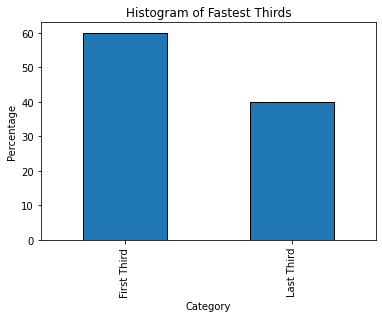

In [203]:
(improvedSixteendII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [204]:
improvedSixteendII_fastest = pd.DataFrame({'Count': improvedSixteendII['Fastest'].value_counts(), 
                           'Percentage': (improvedSixteendII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
improvedSixteendII_fastest

,Count,Percentage,Division
First Third,12,60.0,DII
Last Third,8,40.0,DII


**DIII**

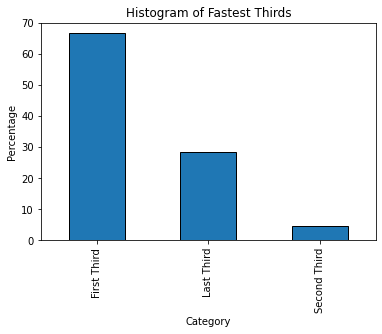

In [205]:
(improvedSixteendIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [206]:
improvedSixteendIII_fastest = pd.DataFrame({'Count': improvedSixteendIII['Fastest'].value_counts(), 
                           'Percentage': (improvedSixteendIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
improvedSixteendIII_fastest

,Count,Percentage,Division
First Third,14,66.666667,DIII
Last Third,6,28.571429,DIII
Second Third,1,4.761905,DIII


# How do the Improved Top 16 swim their race? Counts

**DI**

In [207]:
improvedSixteendI = swimming_order(improvedSixteendI)
improvedSixteendI_swimming_order = pd.DataFrame({'Count': improvedSixteendI['swimming_order'].value_counts(), 
                           'Percentage': (improvedSixteendI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
improvedSixteendI_swimming_order

,Count,Percentage,Division
lsf,10,45.454545,DI
fls,6,27.272727,DI
fsl,4,18.181818,DI
lfs,2,9.090909,DI


**DII**

In [208]:
improvedSixteendII = swimming_order(improvedSixteendII)
improvedSixteendII_swimming_order = pd.DataFrame({'Count': improvedSixteendII['swimming_order'].value_counts(), 
                           'Percentage': (improvedSixteendII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
improvedSixteendII_swimming_order

,Count,Percentage,Division
fsl,8,40.0,DII
lsf,6,30.0,DII
fls,4,20.0,DII
lfs,2,10.0,DII


**DIII**

In [209]:
improvedSixteendIII = swimming_order(improvedSixteendIII)
improvedSixteendIII_swimming_order = pd.DataFrame({'Count': improvedSixteendIII['swimming_order'].value_counts(), 
                           'Percentage': (improvedSixteendIII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
improvedSixteendIII_swimming_order

,Count,Percentage,Division
fls,9,42.857143,DIII
fsl,5,23.809524,DIII
lsf,5,23.809524,DIII
lfs,1,4.761905,DIII
slf,1,4.761905,DIII


# No Improvement Top 16 Counts

**DI**

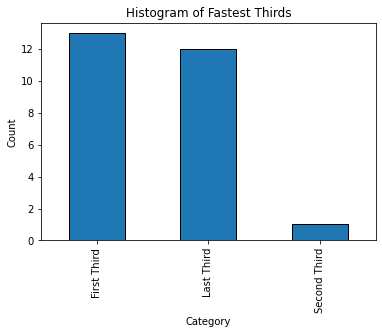

In [210]:
unimprovedSixteendI = sixteenFloatdI[sixteenFloatdI['Improvement'] <= 0]
unimprovedSixteendI = unimprovedSixteendI.reset_index(drop=True)
unimprovedSixteendI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [211]:
unimprovedSixteendI.shape[0]

26

**DII**

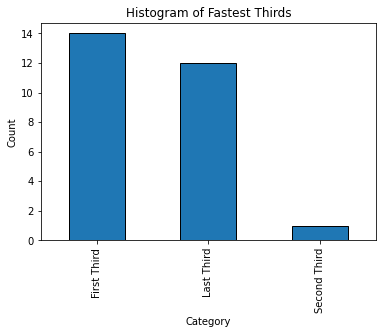

In [212]:
unimprovedSixteendII = sixteenFloatdII[sixteenFloatdII['Improvement'] <= 0]
unimprovedSixteendII = unimprovedSixteendII.reset_index(drop=True)
unimprovedSixteendII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [213]:
unimprovedSixteendII.shape[0]

27

**DIII**

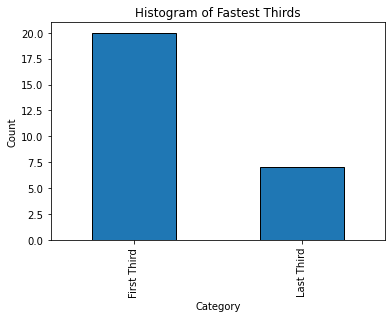

In [214]:
unimprovedSixteendIII = sixteenFloatdIII[sixteenFloatdIII['Improvement'] <= 0]
unimprovedSixteendIII = unimprovedSixteendIII.reset_index(drop=True)
unimprovedSixteendIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [215]:
unimprovedSixteendIII.shape[0]

27

# No Improvement Top 16 Percentages

**DI**

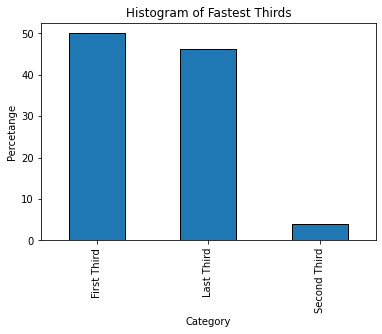

In [216]:
(unimprovedSixteendI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [217]:
unimprovedSixteendI_fastest = pd.DataFrame({'Count': unimprovedSixteendI['Fastest'].value_counts(), 
                           'Percentage': (unimprovedSixteendI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
unimprovedSixteendI_fastest

,Count,Percentage,Division
First Third,13,50.000000,DI
Last Third,12,46.153846,DI
Second Third,1,3.846154,DI


**DII**

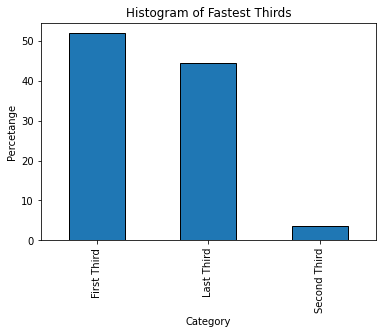

In [218]:
(unimprovedSixteendII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [219]:
unimprovedSixteendII_fastest = pd.DataFrame({'Count': unimprovedSixteendII['Fastest'].value_counts(), 
                           'Percentage': (unimprovedSixteendII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
unimprovedSixteendII_fastest

,Count,Percentage,Division
First Third,14,51.851852,DII
Last Third,12,44.444444,DII
Second Third,1,3.703704,DII


**DIII**

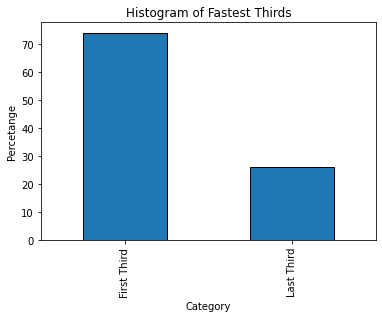

In [220]:
(unimprovedSixteendIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [221]:
unimprovedSixteendIII_fastest = pd.DataFrame({'Count': unimprovedSixteendIII['Fastest'].value_counts(), 
                           'Percentage': (unimprovedSixteendIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
unimprovedSixteendIII_fastest

,Count,Percentage,Division
First Third,20,74.074074,DIII
Last Third,7,25.925926,DIII


# No improvement top 16 how they swim their race based on thirds?

**DI**

In [222]:
unimprovedSixteendI = swimming_order(unimprovedSixteendI)
unimprovedSixteendI_swimming_order = pd.DataFrame({'Count': unimprovedSixteendI['swimming_order'].value_counts(), 
                           'Percentage': (unimprovedSixteendI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
unimprovedSixteendI_swimming_order

,Count,Percentage,Division
lsf,10,38.461538,DI
fls,7,26.923077,DI
fsl,6,23.076923,DI
lfs,2,7.692308,DI
slf,1,3.846154,DI


**DII**

In [223]:
unimprovedSixteendII = swimming_order(unimprovedSixteendII)
unimprovedSixteendII_swimming_order = pd.DataFrame({'Count': unimprovedSixteendII['swimming_order'].value_counts(), 
                           'Percentage': (unimprovedSixteendII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
unimprovedSixteendII_swimming_order

,Count,Percentage,Division
lsf,10,37.037037,DII
fls,7,25.925926,DII
fsl,7,25.925926,DII
lfs,2,7.407407,DII
slf,1,3.703704,DII


**DIII**

In [224]:
unimprovedSixteendIII = swimming_order(unimprovedSixteendIII)
unimprovedSixteendIII_swimming_order = pd.DataFrame({'Count': unimprovedSixteendIII['swimming_order'].value_counts(), 
                           'Percentage': (unimprovedSixteendIII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
unimprovedSixteendIII_swimming_order

,Count,Percentage,Division
fsl,10,37.037037,DIII
fls,10,37.037037,DIII
lsf,6,22.222222,DIII
lfs,1,3.703704,DIII


# Improvement Non-16 Counts

**DI**

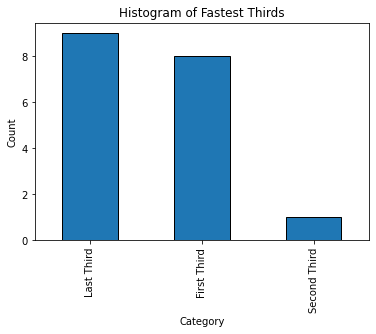

In [225]:
lastFloatdI = improvementFloat(lastdI)
improvedLastdI = lastFloatdI[lastFloatdI['Improvement'] > 0]
improvedLastdI = improvedLastdI.reset_index(drop=True)
improvedLastdI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [226]:
improvedLastdI.shape[0]

18

**DII**

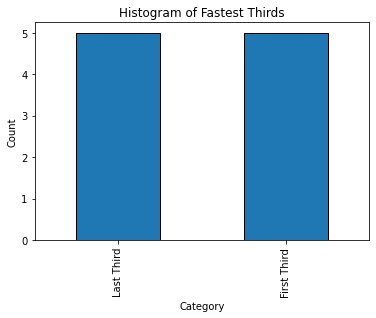

In [227]:
lastFloatdII = improvementFloat(lastdII)
improvedLastdII = lastFloatdII[lastFloatdII['Improvement'] > 0]
improvedLastdII = improvedLastdII.reset_index(drop=True)
improvedLastdII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [228]:
improvedLastdII.shape[0]

10

**DIII**

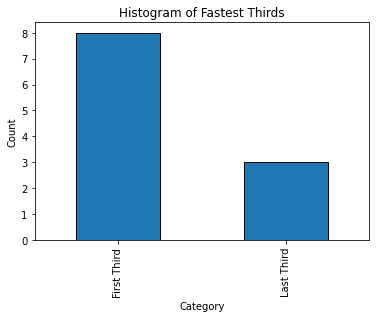

In [229]:
lastFloatdIII = improvementFloat(lastdIII)
improvedLastdIII = lastFloatdIII[lastFloatdIII['Improvement'] > 0]
improvedLastdIII = improvedLastdIII.reset_index(drop=True)
improvedLastdIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [230]:
improvedLastdIII.shape[0]

11

# Improvement Non-16 Percentages

**DI**

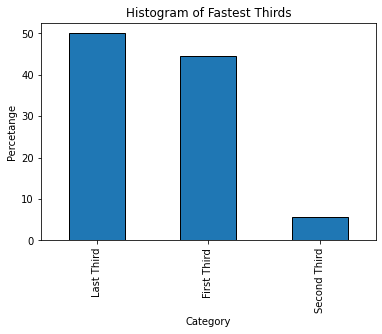

In [231]:
(improvedLastdI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [232]:
improvedLastdI_fastest = pd.DataFrame({'Count': improvedLastdI['Fastest'].value_counts(), 
                           'Percentage': (improvedLastdI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
improvedLastdI_fastest

,Count,Percentage,Division
Last Third,9,50.000000,DI
First Third,8,44.444444,DI
Second Third,1,5.555556,DI


**DII**

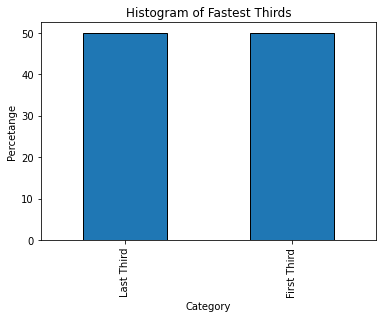

In [233]:
(improvedLastdII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [234]:
improvedLastdII_fastest = pd.DataFrame({'Count': improvedLastdII['Fastest'].value_counts(), 
                           'Percentage': (improvedLastdII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
improvedLastdII_fastest

,Count,Percentage,Division
Last Third,5,50.0,DII
First Third,5,50.0,DII


**DIII**

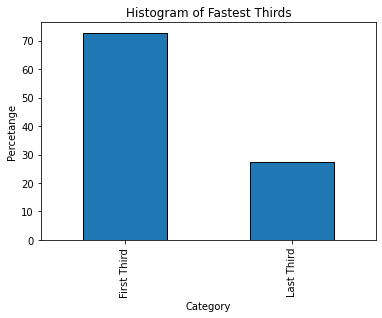

In [235]:
(improvedLastdIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [236]:
improvedLastdIII_fastest = pd.DataFrame({'Count': improvedLastdIII['Fastest'].value_counts(), 
                           'Percentage': (improvedLastdIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
improvedLastdIII_fastest

,Count,Percentage,Division
First Third,8,72.727273,DIII
Last Third,3,27.272727,DIII


# Improvement Non-16 How do they swim their race based on thirds?

**DI**

In [237]:
improvedLastdI = swimming_order(improvedLastdI)
improvedLastdI_swimming_order = pd.DataFrame({'Count': improvedLastdI['swimming_order'].value_counts(), 
                           'Percentage': (improvedLastdI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
improvedLastdI_swimming_order

,Count,Percentage,Division
lsf,7,38.888889,DI
fls,5,27.777778,DI
fsl,3,16.666667,DI
lfs,2,11.111111,DI
slf,1,5.555556,DI


**DII**

In [238]:
improvedLastdII = swimming_order(improvedLastdII)
improvedLastdII_swimming_order = pd.DataFrame({'Count': improvedLastdII['swimming_order'].value_counts(), 
                           'Percentage': (improvedLastdII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
improvedLastdII_swimming_order

,Count,Percentage,Division
lsf,4,40.0,DII
fls,3,30.0,DII
fsl,2,20.0,DII
lfs,1,10.0,DII


**DIII**

In [239]:
improvedLastdIII = swimming_order(improvedLastdIII)
improvedLastdIII_swimming_order = pd.DataFrame({'Count': improvedLastdIII['swimming_order'].value_counts(), 
                           'Percentage': (improvedLastdI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
improvedLastdIII_swimming_order

,Count,Percentage,Division
fls,6.0,27.777778,DIII
fsl,2.0,16.666667,DIII
lfs,NaN,11.111111,DIII
lsf,3.0,38.888889,DIII
slf,NaN,5.555556,DIII


# No Improvement Non-16 Counts

**DI**

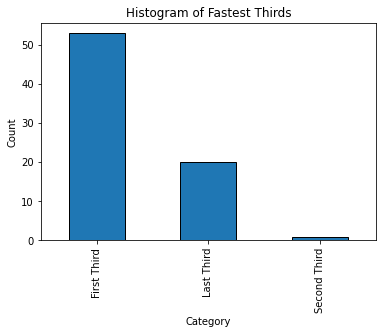

In [240]:
unimprovedLastdI = lastFloatdI[lastFloatdI['Improvement'] < 0]
unimprovedLastdI = unimprovedLastdI.reset_index(drop=True)
unimprovedLastdI['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [241]:
unimprovedLastdI.shape[0]

74

**DII**

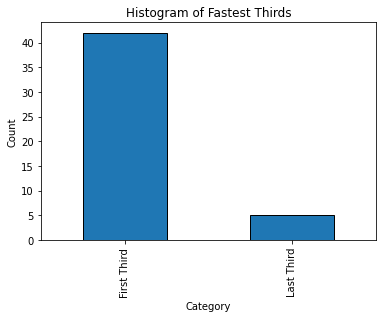

In [242]:
unimprovedLastdII = lastFloatdII[lastFloatdII['Improvement'] < 0]
unimprovedLastdII = unimprovedLastdII.reset_index(drop=True)
unimprovedLastdII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [243]:
unimprovedLastdII.shape[0]

47

**DIII**

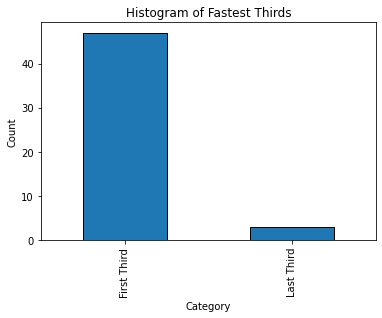

In [244]:
unimprovedLastdIII = lastFloatdIII[lastFloatdIII['Improvement'] < 0]
unimprovedLastdIII = unimprovedLastdIII.reset_index(drop=True)
unimprovedLastdIII['Fastest'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [245]:
unimprovedLastdIII.shape[0]

50

# No Improvement Non-16 Percentages

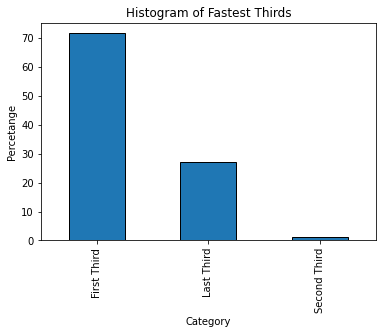

In [246]:
(unimprovedLastdI['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [247]:
unimprovedLastdI_fastest = pd.DataFrame({'Count': unimprovedLastdI['Fastest'].value_counts(), 
                           'Percentage': (unimprovedLastdI['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
unimprovedLastdI_fastest

,Count,Percentage,Division
First Third,53,71.621622,DI
Last Third,20,27.027027,DI
Second Third,1,1.351351,DI


**DII**

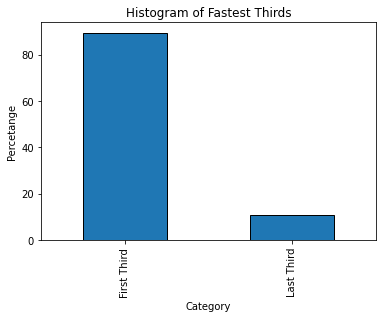

In [248]:
(unimprovedLastdII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [249]:
unimprovedLastdII_fastest = pd.DataFrame({'Count': unimprovedLastdII['Fastest'].value_counts(), 
                           'Percentage': (unimprovedLastdII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
unimprovedLastdII_fastest

,Count,Percentage,Division
First Third,42,89.361702,DII
Last Third,5,10.638298,DII


**DIII**

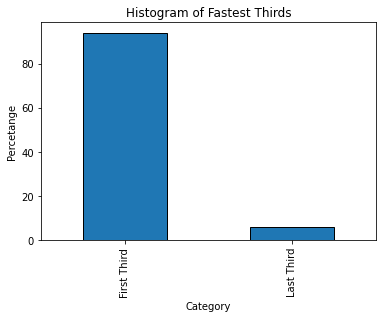

In [250]:
(unimprovedLastdIII['Fastest'].value_counts(normalize=True)*100).plot(kind='bar', edgecolor='black')
plt.xlabel('Category')
plt.ylabel('Percetange')
plt.title('Histogram of Fastest Thirds')
plt.show()

In [251]:
unimprovedLastdIII_fastest = pd.DataFrame({'Count': unimprovedLastdIII['Fastest'].value_counts(), 
                           'Percentage': (unimprovedLastdIII['Fastest'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
unimprovedLastdIII_fastest

,Count,Percentage,Division
First Third,47,94.0,DIII
Last Third,3,6.0,DIII


# Unimproved Non-16 How do they swim their race by thirds?

**DI**

In [252]:
unimprovedLastdI = swimming_order(unimprovedLastdI)
unimprovedLastdI_swimming_order = pd.DataFrame({'Count': unimprovedLastdI['swimming_order'].value_counts(), 
                           'Percentage': (unimprovedLastdI['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DI'})
unimprovedLastdI_swimming_order

,Count,Percentage,Division
fsl,34,45.945946,DI
fls,19,25.675676,DI
lsf,17,22.972973,DI
lfs,3,4.054054,DI
slf,1,1.351351,DI


**DII**

In [253]:
unimprovedLastdII = swimming_order(unimprovedLastdII)
unimprovedLastdII_swimming_order = pd.DataFrame({'Count': unimprovedLastdII['swimming_order'].value_counts(), 
                           'Percentage': (unimprovedLastdII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DII'})
unimprovedLastdII_swimming_order

,Count,Percentage,Division
fsl,26,55.319149,DII
fls,16,34.042553,DII
lsf,4,8.510638,DII
lfs,1,2.127660,DII


**DIII**

In [254]:
unimprovedLastdIII = swimming_order(unimprovedLastdIII)
unimprovedLastdIII_swimming_order = pd.DataFrame({'Count': unimprovedLastdIII['swimming_order'].value_counts(), 
                           'Percentage': (unimprovedLastdIII['swimming_order'].value_counts(normalize=True)*100),
                          'Division': 'DIII'})
unimprovedLastdIII_swimming_order

,Count,Percentage,Division
fsl,26,52.0,DIII
fls,21,42.0,DIII
lsf,3,6.0,DIII


# Regressions

In [255]:
# Convert the column values to 'Division I'
dICop = dI.copy()
dIICop = dII.copy()
dIIICop = dIII.copy()
dICop['School'] = 'Division I'
dIICop['School'] = 'Division II'
dIIICop['School'] = 'Division III'
allD = pd.concat([dICop, dIICop, dIIICop], axis=0)
# Rename the column from 'School' to 'Division'
allD = allD.rename(columns={'School': 'Division'})
allD = improvementFloat(allD)
allD = pd.get_dummies(allD, columns = ['Division','Fastest'],drop_first = True)
allD = allD.rename(columns={'Division_Division II': 'Division_Division_II', 'Division_Division III': 'Division_Division_III',
                           'Fastest_Last Third': 'Fastest_Last_Third', 'Fastest_Second Third': 'Fastest_Second_Third',
                           '50':'fifty','100':'hundred','150':'one_f','200':'two_h','250':'two_f','300':'three_h',
                            '350':'three_f','400':'four_h','450':'four_f','500':'five_h'})
allD.head()

,Name,Time,Improvement,Best,fifty,hundred,one_f,two_h,two_f,three_h,...,four_f,five_h,First Third,Second Third,Last Third,swimming_order,Division_Division_II,Division_Division_III,Fastest_Last_Third,Fastest_Second_Third
0,David Johnston,4:10.02,0.4,PB,22.95,24.90,25.11,25.27,25.26,25.28,...,25.56,25.00,75.28,75.84,75.95,fsl,0,0,0,0
1,Luke Hobson,4:10.51,1.3,SB,22.58,24.88,25.23,25.40,25.48,25.66,...,25.76,24.38,75.51,76.85,75.57,fls,0,0,0,0
2,Gabriel Jett,4:10.62,-0.4,,22.68,24.86,25.33,25.49,25.75,24.98,...,25.12,24.95,75.68,76.26,76.00,fls,0,0,0,0
3,Alfonso Mestre,4:10.78,-0.3,,22.78,24.89,25.28,25.64,25.58,25.34,...,25.46,25.54,75.81,76.54,76.65,fsl,0,0,0,0
4,Jake Newmark,4:10.80,0.9,PB,23.12,24.83,25.47,25.41,25.34,25.24,...,25.29,25.08,75.71,76.05,75.92,fls,0,0,0,0


**Division and Fastest Third**

In [256]:
model = smf.ols(formula='Improvement ~ Division_Division_II + Division_Division_III + Fastest_Last_Third + Fastest_Second_Third', data=allD)
result = model.fit()  # Fit the model to the data

# Print the summary of the regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     8.366
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.88e-06
Time:                        12:01:49   Log-Likelihood:                -525.62
No. Observations:                 351   AIC:                             1061.
Df Residuals:                     346   BIC:                             1081.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.72

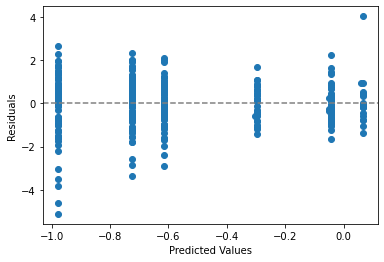

In [257]:
# Plot residuals against predicted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [258]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test on the residuals
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(result.resid, allD[['Division_Division_II', 'Division_Division_III', 'Fastest_Last_Third', 'Fastest_Second_Third']])
print(f"LM Statistic: {lm}")
print(f"LM p-value: {lm_pvalue}")
print(f"F-Statistic: {fvalue}")
print(f"F p-value: {f_pvalue}")

if lm_pvalue < 0.05:
    print("Reject the null hypothesis: Heteroskedasticity may be present.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")


LM Statistic: 53.286156683559184
LM p-value: 1.5930802180639186e-11
F-Statistic: 15.52690342109961
F p-value: 1.0718566308084195e-11
Reject the null hypothesis: Heteroskedasticity may be present.


**Splits**

In [259]:
model = smf.ols(formula='Improvement ~ fifty + hundred + one_f + two_h + two_f + three_h + three_f + four_h + four_f + five_h', data=allD)
result = model.fit()  # Fit the model to the data

# Print the summary of the regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     16.63
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.81e-24
Time:                        12:01:49   Log-Likelihood:                -471.95
No. Observations:                 351   AIC:                             965.9
Df Residuals:                     340   BIC:                             1008.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7964      1.958      2.960      0.0

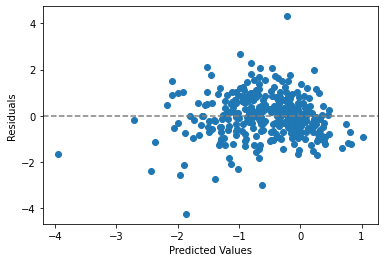

In [260]:
# Plot residuals against predicted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [261]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test on the residuals
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(result.resid, allD[['Division_Division_II', 'Division_Division_III', 'Fastest_Last_Third', 'Fastest_Second_Third']])
print(f"LM Statistic: {lm}")
print(f"LM p-value: {lm_pvalue}")
print(f"F-Statistic: {fvalue}")
print(f"F p-value: {f_pvalue}")

if lm_pvalue < 0.05:
    print("Reject the null hypothesis: Heteroskedasticity may be present.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")


LM Statistic: 50.9609630556482
LM p-value: 4.986670786224933e-11
F-Statistic: 14.734294544137656
F p-value: 3.9599927526957756e-11
Reject the null hypothesis: Heteroskedasticity may be present.


**Division, Fastest Third and Splits**

In [262]:
model = smf.ols(formula='Improvement ~ fifty + hundred + one_f + two_h + two_f + three_h + three_f + four_h + four_f + five_h + Division_Division_II + Division_Division_III + Fastest_Last_Third + Fastest_Second_Third', data=allD)
result = model.fit()  # Fit the model to the data

# Print the summary of the regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            Improvement   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     24.96
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           6.14e-44
Time:                        12:01:49   Log-Likelihood:                -416.70
No. Observations:                 351   AIC:                             863.4
Df Residuals:                     336   BIC:                             921.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                34.24

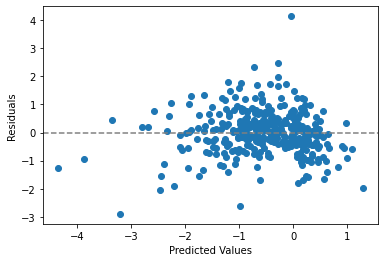

In [263]:
# Plot residuals against predicted values
plt.scatter(result.fittedvalues, result.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

In [264]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Perform the Breusch-Pagan test on the residuals
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(result.resid, allD[['Division_Division_II', 'Division_Division_III', 'Fastest_Last_Third', 'Fastest_Second_Third']])
print(f"LM Statistic: {lm}")
print(f"LM p-value: {lm_pvalue}")
print(f"F-Statistic: {fvalue}")
print(f"F p-value: {f_pvalue}")

if lm_pvalue < 0.05:
    print("Reject the null hypothesis: Heteroskedasticity may be present.")
else:
    print("Fail to reject the null hypothesis: No evidence of heteroscedasticity.")


LM Statistic: 57.09435417340499
LM p-value: 2.4534166750274342e-12
F-Statistic: 16.852126847080466
F p-value: 1.2274355393762162e-12
Reject the null hypothesis: Heteroskedasticity may be present.


# K Means

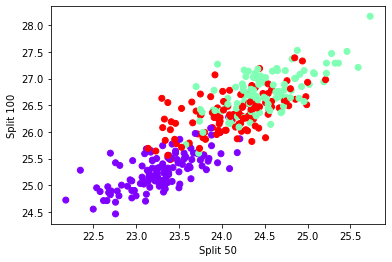

In [265]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(allD[['Improvement','fifty', 'hundred', 'one_f', 'two_h', 'two_f', 
                                         'three_h', 'three_f', 'four_h', 'four_f', 'five_h']])
kmeans = KMeans(n_clusters=3)  # Replace 3 with your chosen number of clusters (K)
kmeans.fit(data_scaled)
allD['Cluster'] = kmeans.labels_
plt.scatter(allD['fifty'], allD['hundred'], c=allD['Cluster'], cmap='rainbow')
plt.xlabel('Split 50')
plt.ylabel('Split 100')
plt.show()

In [266]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(data_scaled, allD['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3492630953227059


In [267]:
# Unscale the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame to store cluster center information
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Improvement', 'fifty', 'hundred', 'one_f', 'two_h', 'two_f', 'three_h', 'three_f', 'four_h', 'four_f', 'five_h'])


In [268]:
cluster_centers_df

,Improvement,fifty,hundred,one_f,two_h,two_f,three_h,three_f,four_h,four_f,five_h
0,-0.359524,23.309603,25.297857,25.635000,25.817540,25.908968,25.938016,25.962302,26.024048,25.993492,25.425397
1,-1.250926,24.491296,26.740093,27.264537,27.579722,27.760000,27.887593,28.030370,28.240926,28.187130,27.470926
2,-0.141880,24.126325,26.342231,26.769658,26.997094,27.083504,27.093248,27.127863,27.190256,27.088803,26.368376


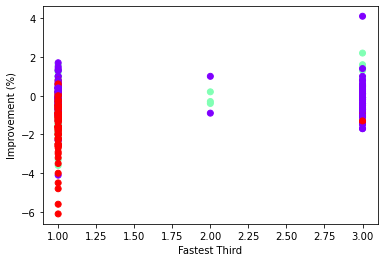

In [269]:
allDummies = pd.concat([dI, dII, dIII], axis=0)
allDummies = improvementFloat(allDummies)
allDummies['Fastest'] = allDummies['Fastest'].replace({'First Third': 1, 'Second Third': 2, 'Last Third': 3})
data_scaled_dum = scaler.fit_transform(allDummies[['Improvement','50', '100', '150', '200', '250', 
                                         '300', '350', '400', '450', '500', 'Fastest']])
kmeans_dum = KMeans(n_clusters=3)  # Replace 3 with your chosen number of clusters (K)
kmeans_dum.fit(data_scaled_dum)
allDummies['Cluster'] = kmeans_dum.labels_
plt.scatter(allDummies['Fastest'], allDummies['Improvement'], c=allDummies['Cluster'], cmap='rainbow')
plt.xlabel('Fastest Third')
plt.ylabel('Improvement (%)')
plt.show()

# Ridge

247 unimproved and 97 improved so going to use oversample the minority class, improvement

**Oversampling of Minority Class**

In [270]:
X = allD[['fifty', 'hundred', 'one_f', 'two_h', 'two_f', 'three_h', 'three_f', 'four_h', 'four_f', 'five_h', 'Division_Division_II', 'Division_Division_III', 'Fastest_Last_Third', 'Fastest_Second_Third']]
y = allD['Improvement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Separate the minority class (Improvement > 0)
X_train_minority = X_train[y_train > 0]
y_train_minority = y_train[y_train > 0]

# Oversample the minority class
X_train_minority_upsampled = resample(X_train_minority, replace=True, n_samples=len(X_train), random_state=42)
y_train_minority_upsampled = resample(y_train_minority, replace=True, n_samples=len(X_train), random_state=42)

# Combine the upsampled minority class with the majority class
X_train_upsampled = pd.concat([X_train, X_train_minority_upsampled])
y_train_upsampled = pd.concat([y_train, y_train_minority_upsampled])

# Train ridge regression model on the upsampled data
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate model on the test set
predictions = ridge_model.predict(X_test)

# Prediction Tests
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': ridge_model.coef_})

print('MSE: ', mse)
print('R^2: ', r2)
print('K-Fold Score: ', scores)
print('Ridge Coefficients: ', ridge_coefficients)

MSE:  0.7843130887003211
R^2:  0.34983008223265055
K-Fold Score:  [-0.52600754 -0.68269391 -0.81594629 -0.70648291 -0.69452987]
Ridge Coefficients:                   Variable  Coefficient
0                   fifty    -0.202477
1                 hundred     0.368941
2                   one_f     0.277292
3                   two_h    -0.147289
4                   two_f    -0.327295
5                 three_h    -0.367584
6                 three_f     0.156521
7                  four_h    -0.639774
8                  four_f    -0.127568
9                  five_h    -0.267131
10   Division_Division_II     1.466008
11  Division_Division_III     1.936897
12     Fastest_Last_Third    -0.052873
13   Fastest_Second_Third    -0.294414


**No Oversampling of Minority Class**

In [271]:
X = allD[['fifty', 'hundred', 'one_f', 'two_h', 'two_f', 'three_h', 'three_f', 'four_h', 'four_f', 'five_h', 'Division_Division_II', 'Division_Division_III', 'Fastest_Last_Third', 'Fastest_Second_Third']]
y = allD['Improvement']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train ridge regression model on the upsampled data
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Evaluate model on the test set
predictions = ridge_model.predict(X_test)

# Prediction Tests
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': ridge_model.coef_})

print('MSE: ', mse)
print('R^2: ', r2)
print('K-Fold Score: ', scores)
print('Ridge Coefficients: ', ridge_coefficients)

MSE:  0.7289099057565808
R^2:  0.3957575102171459
K-Fold Score:  [-0.52600754 -0.68269391 -0.81594629 -0.70648291 -0.69452987]
Ridge Coefficients:                   Variable  Coefficient
0                   fifty    -0.084238
1                 hundred     0.207394
2                   one_f     0.350262
3                   two_h    -0.194129
4                   two_f    -0.096521
5                 three_h    -0.303671
6                 three_f     0.062079
7                  four_h    -0.567627
8                  four_f    -0.321045
9                  five_h    -0.261653
10   Division_Division_II     1.473243
11  Division_Division_III     1.990401
12     Fastest_Last_Third    -0.181843
13   Fastest_Second_Third     0.003897


# Lasso

**Oversampling of Minority Class**

In [272]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate model on the test set
predictions = lasso_model.predict(X_test)

# Prediction Tests
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_model.coef_})

print('MSE: ', mse)
print('R^2: ', r2)
print('K-Fold Score: ', scores)
print('Lasso Coefficients: ', lasso_coefficients)

MSE:  1.501918596848951
R^2:  -0.24504143138129852
K-Fold Score:  [-1.02911163 -0.94047335 -1.66433403 -1.72010773 -1.11921184]
Lasso Coefficients:                   Variable  Coefficient
0                   fifty         -0.0
1                 hundred         -0.0
2                   one_f         -0.0
3                   two_h         -0.0
4                   two_f         -0.0
5                 three_h         -0.0
6                 three_f         -0.0
7                  four_h         -0.0
8                  four_f         -0.0
9                  five_h         -0.0
10   Division_Division_II         -0.0
11  Division_Division_III          0.0
12     Fastest_Last_Third          0.0
13   Fastest_Second_Third         -0.0


**No Oversampling of Minority Class**

In [273]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Evaluate model on the test set
predictions = lasso_model.predict(X_test)

# Prediction Tests
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso_model.coef_})

print('MSE: ', mse)
print('R^2: ', r2)
print('K-Fold Score: ', scores)
print('Lasso Coefficients: ', lasso_coefficients)

MSE:  1.2114308421960331
R^2:  -0.0042365764373648584
K-Fold Score:  [-1.02911163 -0.94047335 -1.66433403 -1.72010773 -1.11921184]
Lasso Coefficients:                   Variable  Coefficient
0                   fifty         -0.0
1                 hundred         -0.0
2                   one_f         -0.0
3                   two_h         -0.0
4                   two_f         -0.0
5                 three_h         -0.0
6                 three_f         -0.0
7                  four_h         -0.0
8                  four_f         -0.0
9                  five_h         -0.0
10   Division_Division_II         -0.0
11  Division_Division_III          0.0
12     Fastest_Last_Third          0.0
13   Fastest_Second_Third          0.0


# Elastic Net

**Oversampling of Minority Class**

In [274]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate model on the test set
predictions = elastic_net_model.predict(X_test)

# Prediction Tests
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
scores = cross_val_score(elastic_net_model, X, y, cv=5, scoring='neg_mean_squared_error')
elastic_net_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': elastic_net_model.coef_})

print('MSE: ', mse)
print('R^2: ', r2)
print('K-Fold Score: ', scores)
print('Elastic Net Coefficients: ', elastic_net_coefficients)

MSE:  1.501918596848951
R^2:  -0.24504143138129852
K-Fold Score:  [-0.96349228 -0.88827799 -1.62730522 -1.69122306 -1.0607512 ]
Elastic Net Coefficients:                   Variable  Coefficient
0                   fifty         -0.0
1                 hundred         -0.0
2                   one_f         -0.0
3                   two_h         -0.0
4                   two_f         -0.0
5                 three_h         -0.0
6                 three_f         -0.0
7                  four_h         -0.0
8                  four_f         -0.0
9                  five_h         -0.0
10   Division_Division_II         -0.0
11  Division_Division_III          0.0
12     Fastest_Last_Third          0.0
13   Fastest_Second_Third         -0.0


**No Oversampling of Minority Class**

In [275]:
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

# Evaluate model on the test set
predictions = elastic_net_model.predict(X_test)

# Prediction Tests
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
scores = cross_val_score(elastic_net_model, X, y, cv=5, scoring='neg_mean_squared_error')
elastic_net_coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': elastic_net_model.coef_})

print('MSE: ', mse)
print('R^2: ', r2)
print('K-Fold Score: ', scores)
print('Elastic Net Coefficients: ', elastic_net_coefficients)

MSE:  1.1480224329674706
R^2:  0.04832692251202608
K-Fold Score:  [-0.96349228 -0.88827799 -1.62730522 -1.69122306 -1.0607512 ]
Elastic Net Coefficients:                   Variable  Coefficient
0                   fifty    -0.000000
1                 hundred    -0.000000
2                   one_f    -0.000000
3                   two_h    -0.000000
4                   two_f    -0.000000
5                 three_h    -0.000000
6                 three_f    -0.000000
7                  four_h    -0.000000
8                  four_f    -0.041736
9                  five_h    -0.017058
10   Division_Division_II    -0.000000
11  Division_Division_III     0.000000
12     Fastest_Last_Third     0.000000
13   Fastest_Second_Third     0.000000


# Random Forest

In [276]:
# Train random forest model on the upsampled data
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate model on the test set
predictions_forest = forest_model.predict(X_test)

# Prediction Tests
mse_forest = mean_squared_error(y_test, predictions_forest)
r2_forest = r2_score(y_test, predictions_forest)

# Feature importance
feature_importance = pd.DataFrame({'Variable': X.columns, 'Importance': forest_model.feature_importances_})

print('MSE (Random Forest): ', mse_forest)
print('R^2 (Random Forest): ', r2_forest)
print('Feature Importance (Random Forest): \n', feature_importance)


MSE (Random Forest):  0.6858041830985913
R^2 (Random Forest):  0.4314907455279182
Feature Importance (Random Forest): 
                  Variable  Importance
0                   fifty    0.123063
1                 hundred    0.148952
2                   one_f    0.045881
3                   two_h    0.053289
4                   two_f    0.032304
5                 three_h    0.041659
6                 three_f    0.042860
7                  four_h    0.151990
8                  four_f    0.293369
9                  five_h    0.053556
10   Division_Division_II    0.002815
11  Division_Division_III    0.009014
12     Fastest_Last_Third    0.001178
13   Fastest_Second_Third    0.000069


# Stop Program Here and Below Is Extra Code that Could Be Helpful Later

In [277]:
error['Potato'] = error.potatoFuture use possibly

SyntaxError: invalid syntax (1821428062.py, line 1)

In [ ]:
dI

Future use possibly

In [ ]:
#data['Improvement'] = data['Improvement'].str.replace('[+%]', '', regex=True).astype(float)
# Function to convert time to seconds
#def time_to_seconds(time_str):
 #   minutes, seconds = map(float, time_str.split(':'))
  #  return minutes * 60 + seconds

#data['Time'] = data['Time'].apply(time_to_seconds)

#data.head()

In [ ]:
#data.to_excel("HaydenJohnsonCapstone.xlsx",
 #            sheet_name='SwimData')  

In [ ]:
# Use pd.get_dummies() to convert the 'Category' column
#dataDummies = pd.get_dummies(data, columns=['Meet', 'Best'])
#dataDummies.rename(columns={'Best_': 'No Best'}, inplace=True)
dataDummies = data
dataDummies = dataDummies.iloc[:, 4:14].astype(float)
dataDummies.head()

In [ ]:
# Standardize the data (optional but recommended)
scaler = StandardScaler()
scaledData = scaler.fit_transform(dataDummies)

# Calculate the Within-Cluster-Sum-of-Squares (WCSS) for different values of K
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaledData)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
# Create a K-Means model with the chosen number of clusters (e.g., K=3)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to your data
kmeans.fit(dataDummies)


In [ ]:
dataDummies.dtypes

In [ ]:
# Get the cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

In [ ]:
# Visualize the clustering results
plt.scatter(dataDummies['Time'], dataDummies['Meet_NCAA23'], c=cluster_assignments, cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='X', s=100, c='black')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('K-Means Clustering')
plt.show()